# Step Zero

-  First let us import all the necessary libraries that we would like to use during our analysis.
-  The libraries we would like to use for our analysis is as follows,
    -  Pandas -  Pandas is a library in python that is used for data analysis of large data. It has many built-in functions that can make it easier for us to review,clean and analyse the data.
    -  numpy - numpy stands for numeric python. This library is specifically used to do work with numeric. It has also many functions that can help us filter out numeric data, perform different arithmetic and logical operations on numeric data etc. Pandas has also some functionalities of numpy to make it easier for us if there is any numerical column present in out data set.
    -  matplotlib - This library is used to plot different visualization on our data set like boxplots, barcharts, histograms etc.
    -  seaborn - This libraty is also like matplotlib but, in addition it uses fascinating themes, it helps in compiling whole data into a single plot, it also provides the distribution of data. sns.set(color_codes =True) , we have used this to make our plots more asthetically pleasing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes =True)

# First Steps 

First let us read the application_data file in to a dataframe. This dataset is most relevant to us as we will do most of our analysis and draw most of our insights from this data set as it contains the data for the client has actually payment difficulties. Based on this we can derive insights that can help us whether to sanction loan to a particular person or not or may be do some other action like increasing the intrest percentage for a person who can be a defaulter by our analysis etc.

In [2]:
application_train = pd.read_csv("application_data.csv")
application_train.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
application_train.shape 

(307511, 122)

In [4]:
application_train.columns #Looking at the columns of application_data

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
application_train.describe() #looking at summary statistics of the data set to get a brief idea about the overall data.

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [6]:
application_train.columns.values #looking at the columns of our dataset

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
application_train.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [8]:
len(application_train)

307511

In [9]:
#Find the missing values in each column of the dataset
application_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application_train.isna().sum().sort_values(ascending = False).head(60) #looking at the columns which has the most missing values in our dataset.

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

### Removing columns with huge amount of missing data(which we think are not impacting our analysis)

In the next step, we are looking at how many rows we have for our data set.We can see that we have 122 columns in our dataset which makes it a huge data set to work upon and it can contain many missing values which we do not want so , our next steps will be reduce the dataset to only those columns which has not many missing values(say less that 45%). We will do sure to make our jobs easier to analyse and derive meaningful insights from the data.

In [11]:
application_train.shape

(307511, 122)

In [12]:
x = len(application_train)*0.45 # Finding out the 45% of our total rows in the dataset.
x

138379.95

In [13]:
#Looking at all the columns that has more than 45% of the data blank
application_train.columns[application_train.isnull().sum()<138380] 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [14]:
#Looking at the number of columns that has more than 45% missing values
len(application_train.columns[application_train.isnull().sum()<138380])

73

In [15]:
#Deleting all the columns that has more that 45% of the values missing
application_train = application_train[application_train.columns[application_train.isnull().sum() < 138380]]

In [16]:
application_train.shape

(307511, 73)

In [17]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [18]:
#Displaying the missing values in all the columns 
application_train.isna().sum().sort_values(ascending = False).head(60)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_21                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_16            

In [19]:
#Selecting the categorical columns
list(set(application_train.columns) - set(application_train.describe().columns))

['NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_TYPE_SUITE']

In [20]:
application_train.shape

(307511, 73)

When, I was trying to work on this data set I realised that, the number of rows are too high for my analysis. Hence, I decided to take 20000 rows for my analysis

In [21]:
application_train = application_train.sample(20000)
application_train.shape

(20000, 73)

In [22]:
#Displaying the columns of the new dataset
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [23]:
#Creating a pandas series that contains the total null values in each column
nulls = application_train.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                      1
AMT_GOODS_PRICE                 17
NAME_TYPE_SUITE                 83
OCCUPATION_TYPE               6310
CNT_FAM_MEMBERS                  1
EXT_SOURCE_2                    48
EXT_SOURCE_3                  3966
OBS_30_CNT_SOCIAL_CIRCLE        71
DEF_30_CNT_SOCIAL_CIRCLE        71
OBS_60_CNT_SOCIAL_CIRCLE        71
DEF_60_CNT_SOCIAL_CIRCLE        71
AMT_REQ_CREDIT_BUREAU_HOUR    2679
AMT_REQ_CREDIT_BUREAU_DAY     2679
AMT_REQ_CREDIT_BUREAU_WEEK    2679
AMT_REQ_CREDIT_BUREAU_MON     2679
AMT_REQ_CREDIT_BUREAU_QRT     2679
AMT_REQ_CREDIT_BUREAU_YEAR    2679
dtype: int64

In [24]:
#Looking at which columns have missing data(less than 20000 values)
application_train.count()

SK_ID_CURR                    20000
TARGET                        20000
NAME_CONTRACT_TYPE            20000
CODE_GENDER                   20000
FLAG_OWN_CAR                  20000
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     17321
AMT_REQ_CREDIT_BUREAU_WEEK    17321
AMT_REQ_CREDIT_BUREAU_MON     17321
AMT_REQ_CREDIT_BUREAU_QRT     17321
AMT_REQ_CREDIT_BUREAU_YEAR    17321
Length: 73, dtype: int64

In [25]:
len(application_train)

20000

In [26]:
#Calculating the missing data percentage for each column
train_missing = application_train.count()/len(application_train)
train_missing

SK_ID_CURR                    1.00000
TARGET                        1.00000
NAME_CONTRACT_TYPE            1.00000
CODE_GENDER                   1.00000
FLAG_OWN_CAR                  1.00000
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.86605
AMT_REQ_CREDIT_BUREAU_WEEK    0.86605
AMT_REQ_CREDIT_BUREAU_MON     0.86605
AMT_REQ_CREDIT_BUREAU_QRT     0.86605
AMT_REQ_CREDIT_BUREAU_YEAR    0.86605
Length: 73, dtype: float64

In [27]:
train_missing = (1-train_missing) * 100
train_missing

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.395
AMT_REQ_CREDIT_BUREAU_WEEK    13.395
AMT_REQ_CREDIT_BUREAU_MON     13.395
AMT_REQ_CREDIT_BUREAU_QRT     13.395
AMT_REQ_CREDIT_BUREAU_YEAR    13.395
Length: 73, dtype: float64

### Missing value treatment

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 65%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 65%% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns.

In [28]:
train_missing.sort_values(ascending = True).head(73)


SK_ID_CURR                      0.000
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_NOT_WORK_REGION      0.000
LIVE_REGION_NOT_WORK_REGION     0.000
REG_CITY_NOT_WORK_CITY          0.000
                                ...  
AMT_REQ_CREDIT_BUREAU_MON      13.395
AMT_REQ_CREDIT_BUREAU_QRT      13.395
AMT_REQ_CREDIT_BUREAU_YEAR     13.395
EXT_SOURCE_3                   19.830
OCCUPATION_TYPE                31.550
Length: 73, dtype: float64

## Starting data analysis by looking at the columns

Now that we have reduced our dataset to a much more managable and effective data set that has fewer rows to analyse and columns that don't have more than 65% missing values, let's go forward with looking at each columns and calculating the corlation between different columns to generate meaningful insights.

Here, we are taking 6 variables which I think are most important for our analysis .Those are as follows,
-  AMT_INCOME_TOTAL - Income of the client . This is the most important column to determine wheather or not to give a loan to the client.
-  OCCUPATION_TYPE - This can give us an insight about what kind of specific working clients we should target.
-  NAME_EDUCATION_TYPE - Level of highest education the client achieved. This is important because we can determine using this that if education level interferes with the client's ability to repay the loan
-  NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave,…). This is also important because by using this we can determine if type of income plays a role of a clients ability to pay the loan.
-  FLAG_OWN_REALTY - Flag if client owns a house or flat. It can also play a huge impact in client's ability to repay the loan
-  AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given .  this can help us detemine wheather to give the client loan or not because, we can see even if the clients fails to pay the loan what is the value of goods on which the loan is given.

### 1)AMT_INCOME_TOTAL

In [29]:
application_train['AMT_INCOME_TOTAL'].head()

49193      90000.0
136179    135000.0
38976     135000.0
303397    103500.0
114714    202500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
application_train['AMT_INCOME_TOTAL'].mean()

168330.2226525

In [31]:
application_train['AMT_INCOME_TOTAL'].mode()

0    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
application_train['AMT_INCOME_TOTAL'].describe()

count    2.000000e+04
mean     1.683302e+05
std      9.845497e+04
min      2.700000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      2.250000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\2549531055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train['AMT_INCOME_TOTAL'])


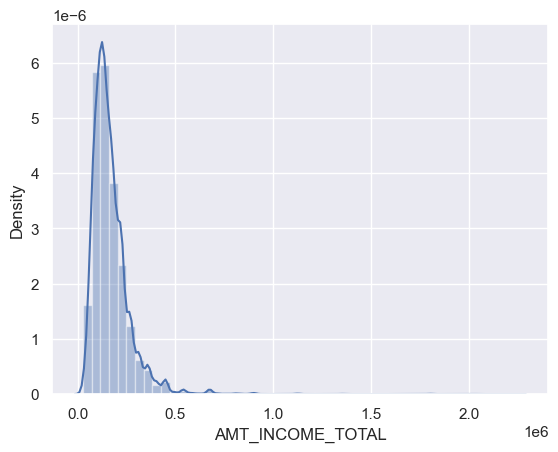

In [33]:
sns.distplot(application_train['AMT_INCOME_TOTAL'])
plt.show()

### 2) OCCUPATION_TYPE

As you can see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. So, it would be approprite to remove this column, but if you go through this column, this seems to look important. So, we will go forward and analyse this column. We will fill in the missing values of all the categorical columns by their mode at a later stage,so at this time it is not required.

In [34]:
application_train['OCCUPATION_TYPE'].head()

49193                  Managers
136179                      NaN
38976               Sales staff
303397            Cooking staff
114714    High skill tech staff
Name: OCCUPATION_TYPE, dtype: object

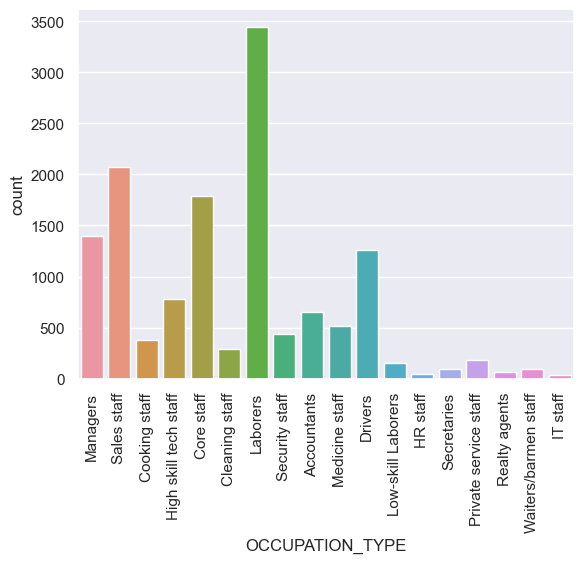

In [35]:
#plotting a count plot to see the clients with different occupations.
sns.countplot(x="OCCUPATION_TYPE",data=application_train)
plt.xticks(rotation=90)
plt.show()

-  We can see in the above diagram that most of the clients are laboreres.

### 3) NAME_EDUCATION_TYPE

In [36]:
application_train['NAME_EDUCATION_TYPE'].head(10)

49193                  Higher education
136179    Secondary / secondary special
38976     Secondary / secondary special
303397    Secondary / secondary special
114714    Secondary / secondary special
162503                 Higher education
92247                  Higher education
288925                Incomplete higher
5948                   Higher education
79260     Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

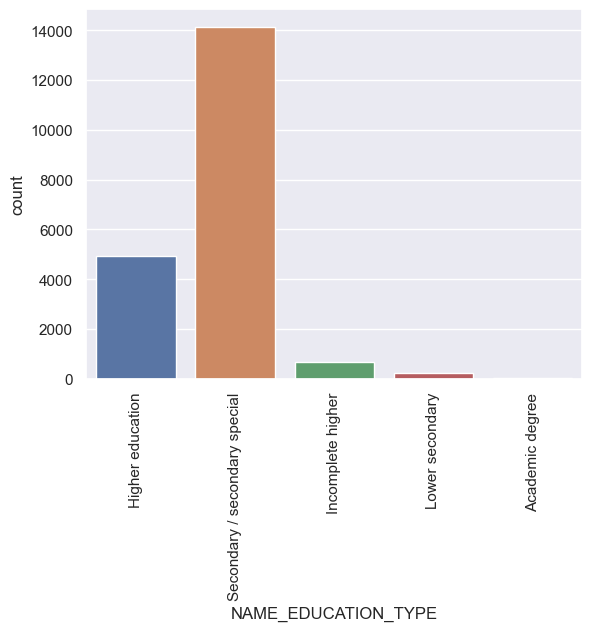

In [37]:
#plotting the distribution
sns.countplot(x="NAME_EDUCATION_TYPE",data=application_train)
plt.xticks(rotation=90)
plt.show()

-  Here ,we can see most of the clients applying for loan are Secondary / secondary special  or Higher education with very few in other categories

In [38]:
application_train['NAME_EDUCATION_TYPE'].mode() # same as we found from the above plot

0    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

### 4) NAME_INCOME_TYPE

In [39]:
application_train['NAME_INCOME_TYPE'].head()

49193                  Working
136179               Pensioner
38976                  Working
303397    Commercial associate
114714                 Working
Name: NAME_INCOME_TYPE, dtype: object

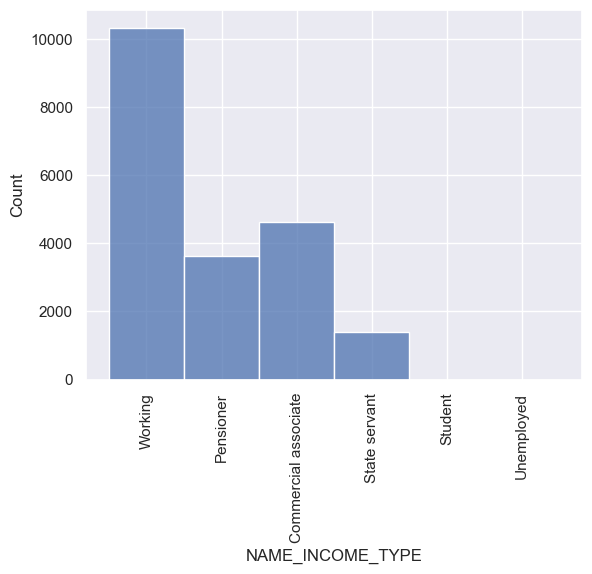

In [40]:
sns.histplot(application_train['NAME_INCOME_TYPE'],bins=10)
plt.xticks(rotation=90)
plt.show()

In [41]:
application_train.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 10337
Commercial associate     4623
Pensioner                3638
State servant            1400
Student                     1
Unemployed                  1
Name: count, dtype: int64

In [42]:
application_train['NAME_INCOME_TYPE'].mode()

0    Working
Name: NAME_INCOME_TYPE, dtype: object

### 5) FLAG_OWN_REALTY

In [43]:
application_train['FLAG_OWN_REALTY'].sample(5)

83952     N
221668    N
26871     N
10612     N
144554    Y
Name: FLAG_OWN_REALTY, dtype: object

In [44]:
application_train['FLAG_OWN_REALTY'].isna().sum() #This column has no empty values which is a good thing.

0

In [45]:
application_train['FLAG_OWN_REALTY'].unique() 

array(['N', 'Y'], dtype=object)

In [46]:
application_train['FLAG_OWN_REALTY'].mode()

0    Y
Name: FLAG_OWN_REALTY, dtype: object

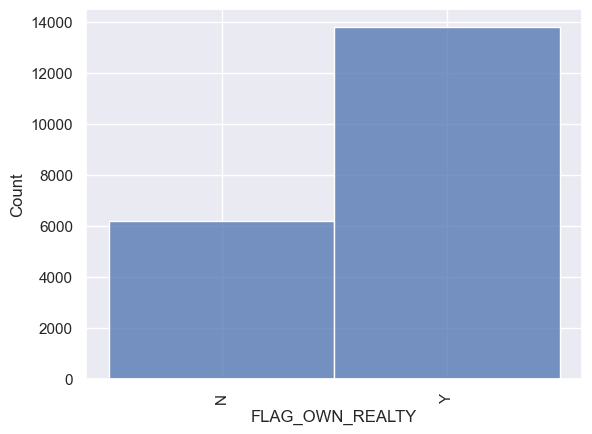

In [47]:
sns.histplot(application_train['FLAG_OWN_REALTY'],bins=10)
plt.xticks(rotation=90)
plt.show() # we can see here most of the clients have a home.

### 6) AMT_GOODS_PRICE

In [48]:
application_train['AMT_GOODS_PRICE'].head()

49193     238500.0
136179    526500.0
38976     940500.0
303397    315000.0
114714    225000.0
Name: AMT_GOODS_PRICE, dtype: float64

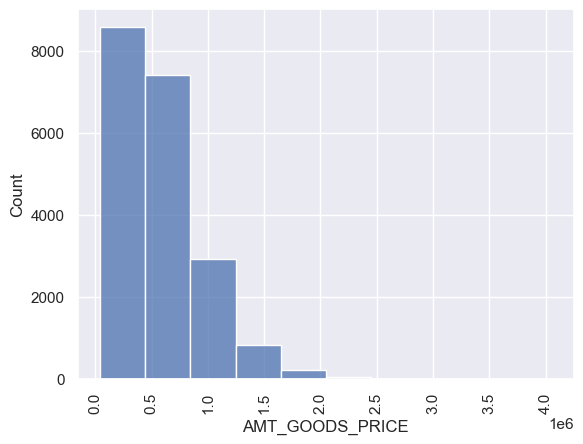

In [49]:
sns.histplot(application_train['AMT_GOODS_PRICE'],bins=10)
plt.xticks(rotation=90)
plt.show()

In [50]:
#Looking at all the categorical columns of the dataset 
list(set(application_train.columns) - set(application_train.describe().columns)) 

['NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_TYPE_SUITE']

In [51]:
#Looking at all the numerical columns of the dat
application_train.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [52]:
# Pandas Fillna of Multiple Columns with Mode of Each: Categorical 
cols = list(set(application_train.columns) - set(application_train.describe().columns)) 

application_train[cols]=application_train[cols].fillna(application_train.mode().iloc[0])

In [53]:
application_train[cols].isna().sum()

NAME_EDUCATION_TYPE           0
NAME_CONTRACT_TYPE            0
FLAG_OWN_REALTY               0
WEEKDAY_APPR_PROCESS_START    0
NAME_HOUSING_TYPE             0
ORGANIZATION_TYPE             0
NAME_FAMILY_STATUS            0
OCCUPATION_TYPE               0
NAME_INCOME_TYPE              0
FLAG_OWN_CAR                  0
CODE_GENDER                   0
NAME_TYPE_SUITE               0
dtype: int64

In [54]:
application_train.describe() #Looking at the summary statistics of all the numeric columns

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   20000.000000  20000.000000  20000.000000      2.000000e+04   
mean   278454.086050      0.082050      0.415700      1.683302e+05   
std    102554.230113      0.274448      0.726374      9.845497e+04   
min    100007.000000      0.000000      0.000000      2.700000e+04   
25%    190757.750000      0.000000      0.000000      1.125000e+05   
50%    278006.500000      0.000000      0.000000      1.485000e+05   
75%    367737.500000      0.000000      1.000000      2.025000e+05   
max    456197.000000      1.000000     14.000000      2.250000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.000000e+04   19999.000000     1.998300e+04   
mean   6.000677e+05   27140.863118     5.394013e+05   
std    4.029195e+05   14415.332529     3.694228e+05   
min    4.500000e+04    1993.500000     4.500000e+04   
25%    2.700000e+05   16546.500000     2.385000e+05   
50%    5.124465e+05   24916.500000     4.500000e+05   
75%    8.131950e+05   34596.000000     6.815025e+05   
max    4.050000e+06  173574.000000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                20000.000000  20000.000000   20000.000000  ...   
mean                     0.020869 -16082.291850   64470.798000  ...   
std                      0.013829   4380.344138  141819.669996  ...   
min                      0.000533 -25192.000000  -17139.000000  ...   
25%                      0.010006 -19746.000000   -2760.250000  ...   
50%                      0.018850 -15827.000000   -1214.000000  ...   
75%                      0.028663 -12428.750000    -307.000000  ...   
max                      0.072508  -7688.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count       20000.00000      20000.000000      20000.000000      20000.000000   
mean            0.00725          0.000800          0.000350          0.000200   
std             0.08484          0.028274          0.018705          0.014141   
min             0.00000          0.000000          0.000000          0.000000   
25%             0.00000          0.000000          0.000000          0.000000   
50%             0.00000          0.000000          0.000000          0.000000   
75%             0.00000          0.000000          0.000000          0.000000   
max             1.00000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                17321.000000               17321.000000   
mean                     0.005658                   0.006697   
std                      0.077283                   0.092821   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   3.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                17321.000000               17321.000000   
mean                     0.033081                   0.260897   
std                      0.196981                   0.907691   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  16.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               17321.000000                17321.000000  
mean                    0.264130                    1.889094  
std                     0.610371                    1.861329  
min                     0.000000                    0.000000  
25%                     0.000000            

In [55]:
nulls = application_train.isnull().sum() # looking at columns that contains missing value
nulls[nulls>0]

AMT_ANNUITY                      1
AMT_GOODS_PRICE                 17
CNT_FAM_MEMBERS                  1
EXT_SOURCE_2                    48
EXT_SOURCE_3                  3966
OBS_30_CNT_SOCIAL_CIRCLE        71
DEF_30_CNT_SOCIAL_CIRCLE        71
OBS_60_CNT_SOCIAL_CIRCLE        71
DEF_60_CNT_SOCIAL_CIRCLE        71
AMT_REQ_CREDIT_BUREAU_HOUR    2679
AMT_REQ_CREDIT_BUREAU_DAY     2679
AMT_REQ_CREDIT_BUREAU_WEEK    2679
AMT_REQ_CREDIT_BUREAU_MON     2679
AMT_REQ_CREDIT_BUREAU_QRT     2679
AMT_REQ_CREDIT_BUREAU_YEAR    2679
dtype: int64

In [56]:
""" The below code is written to find out the means of all the numeric columns in the dataset. 
    Categorical columns are excluded from this by using exception handeling in python.
"""
# First identify all numeric columns
for column in application_train.columns:
    try:
        application_train[column] = pd.to_numeric(application_train[column], errors='raise')
    except ValueError:
        print(f"Column {column} is non-numeric.")

# Get rid of all non-numeric columns or handle them as needed.
numeric_columns = application_train.select_dtypes(include=[np.number])

# Calculate the mean
mean_values = numeric_columns.mean()
print(mean_values)

Column NAME_CONTRACT_TYPE is non-numeric.
Column CODE_GENDER is non-numeric.
Column FLAG_OWN_CAR is non-numeric.
Column FLAG_OWN_REALTY is non-numeric.
Column NAME_TYPE_SUITE is non-numeric.
Column NAME_INCOME_TYPE is non-numeric.
Column NAME_EDUCATION_TYPE is non-numeric.
Column NAME_FAMILY_STATUS is non-numeric.
Column NAME_HOUSING_TYPE is non-numeric.
Column OCCUPATION_TYPE is non-numeric.
Column WEEKDAY_APPR_PROCESS_START is non-numeric.
Column ORGANIZATION_TYPE is non-numeric.
SK_ID_CURR                    278454.086050
TARGET                             0.082050
CNT_CHILDREN                       0.415700
AMT_INCOME_TOTAL              168330.222653
AMT_CREDIT                    600067.713150
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.006697
AMT_REQ_CREDIT_BUREAU_WEEK         0.033081
AMT_REQ_CREDIT_BUREAU_MON          0.260897
AMT_REQ_CREDIT_BUREAU_QRT          0.264130
AMT_REQ_CREDIT_BUREAU_YEAR         1.889094
Length: 61, dtype: float64


In [57]:
cols1 = numeric_columns.columns #storing the numeric in a panda's index
cols1

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [58]:
#fill mean with all these values
application_train[cols1]=application_train[cols1].fillna(numeric_columns.mean())

In [59]:
nulls = application_train.isnull().sum()
nulls[nulls>0]
#We can see we don't have any null values for numeric columns as well now

Series([], dtype: int64)

In [60]:
# Data is now clean

### Target 
-  This is the most important variable in our dataset to actually get info on the clients who have difficulties paying loans.Plotting this with other variable will give on insights on which clients are more likely to be a defaulter.

In [61]:
application_train['TARGET'].head() 

49193     0
136179    0
38976     0
303397    0
114714    0
Name: TARGET, dtype: int64

In [62]:
application_train['TARGET'].isna().sum() 

0

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cas

In [63]:
application_train["TARGET"].unique() 

array([0, 1], dtype=int64)

In [64]:
#CLient with payment difficulty
(application_train["TARGET"]==1).sum()

1641

In [65]:
#other clients
(application_train["TARGET"]==0).sum()

18359

In [66]:
#Check for imbalance

In [67]:
#Ratio

In [68]:
(application_train["TARGET"]==1).sum()/(application_train["TARGET"]==0).sum()

0.08938395337436679

Now , we will analyse numerical and categorical data. Let's start with categorical data

Analysing categorical data
Since due to imbalance ,we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them indivisually and try to find any relationship if it exists.

In [69]:
train_0 = application_train.loc[application_train['TARGET'] == 0] #Dataframe with other clients
train_1 = application_train.loc[application_train['TARGET'] == 1] #Dataframe with clients with payment difficulty

In [70]:
train_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
49193       156950       0         Cash loans           F            N   
136179      257960       0         Cash loans           F            N   
38976       145136       0         Cash loans           F            N   
303397      451514       0    Revolving loans           F            N   
114714      233019       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
49193                N             0           90000.0    288873.0   
136179               Y             0          135000.0    526500.0   
38976                Y             0          135000.0   1077061.5   
303397               Y             0          103500.0    315000.0   
114714               Y             0          202500.0    248760.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
49193       16258.5  ...                 0                0                0   
136179      22437.0  ...                 0                0                0   
38976       31491.0  ...                 0                0                0   
303397      15750.0  ...                 0                0                0   
114714      26248.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
49193                 0                   0.000000                  0.000000   
136179                0                   0.005658                  0.006697   
38976                 0                   0.000000                  0.000000   
303397                0                   0.000000                  0.000000   
114714                0                   0.005658                  0.006697   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
49193                     0.000000                   0.000000   
136179                    0.033081                   0.260897   
38976                     0.000000                   0.000000   
303397                    0.000000                   0.000000   
114714                    0.033081                   0.260897   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
49193                     0.00000                    0.000000  
136179                    0.26413                    1.889094  
38976                     0.00000                    1.000000  
303397                    0.00000                    3.000000  
114714                    0.26413                    1.889094  

[5 rows x 73 columns]

In [71]:
cat_col = list(set(application_train.columns)- set(application_train.describe().columns)) 
#creating a list of only categorical columns
cat_col

['NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_TYPE_SUITE']

Here we have used three plots for analysis

-  Pie plot : Pie plotting all the values present in a column in terms of percentage. So, the sum of those data types will be 100.
-  countplot 1 : Here, plotted the count of the different categories. So, Target=0 will have higher count than target=1.
-  countplot 2 : To plot this dataset, we have to first divide the dataset in to 2 subsets, target = 0 and target = 1. Then again divide the 
    indivisual target = 0 and target = 1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for 
    Target = 0 and Target = 1 are mostly equal. Please go through the code of this plot to understand for further doubts

In [72]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

Let's do univariate analysis for all the 5 columns we have choosen for our analysis to generate insights.

In [73]:
train_dataset = ['AMT_INCOME_TOTAL','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE','AMT_GOODS_PRICE']
#creating a pandas inded to store the categorical data
train_dataset

['AMT_INCOME_TOTAL',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'AMT_GOODS_PRICE']

# Univariate Analysis of the Categorical data

### Plotting the data.

Plotting  AMT_INCOME_TOTAL


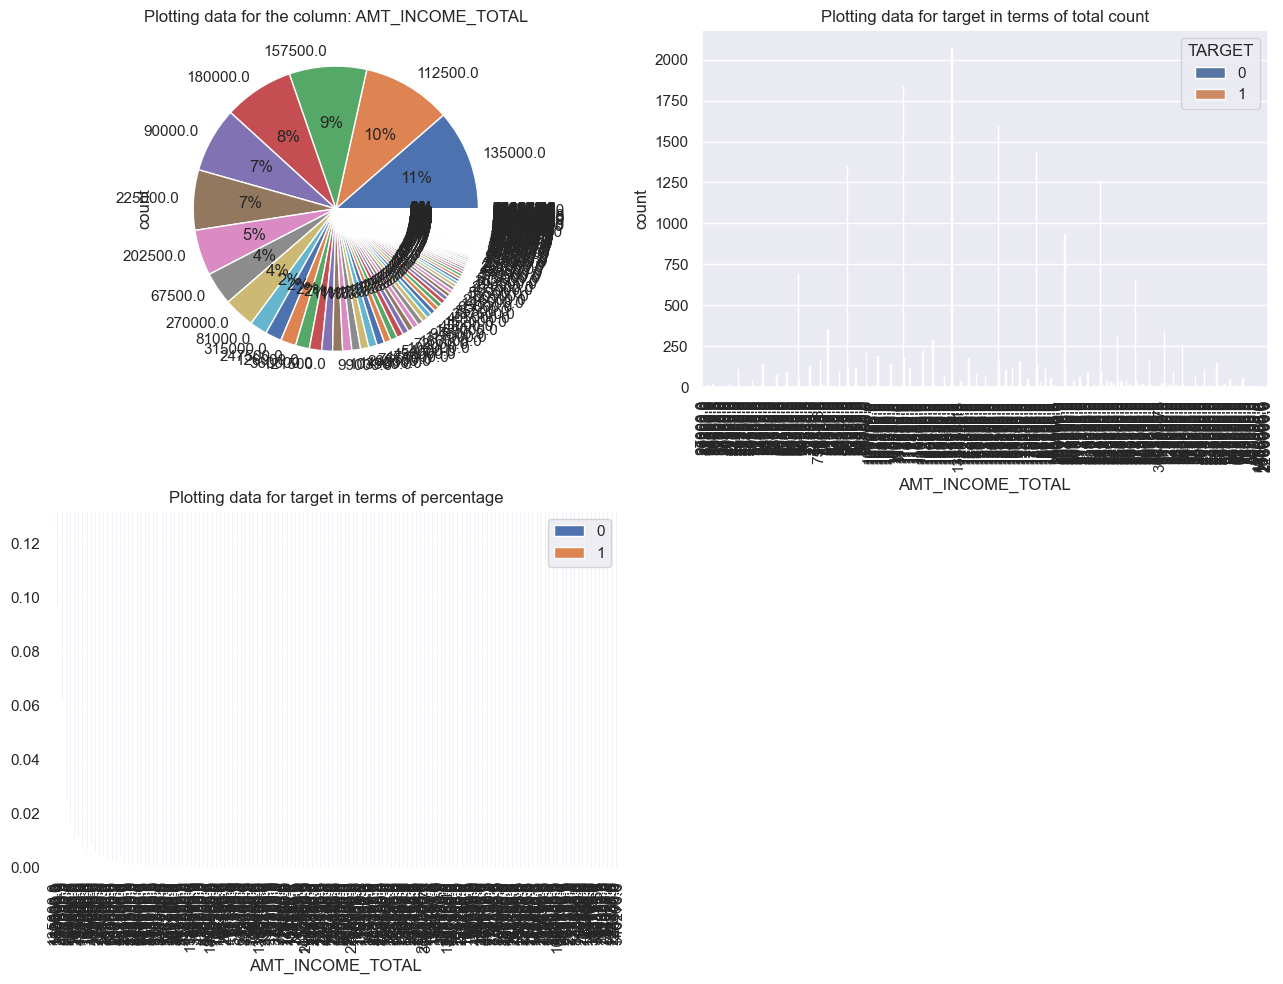

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


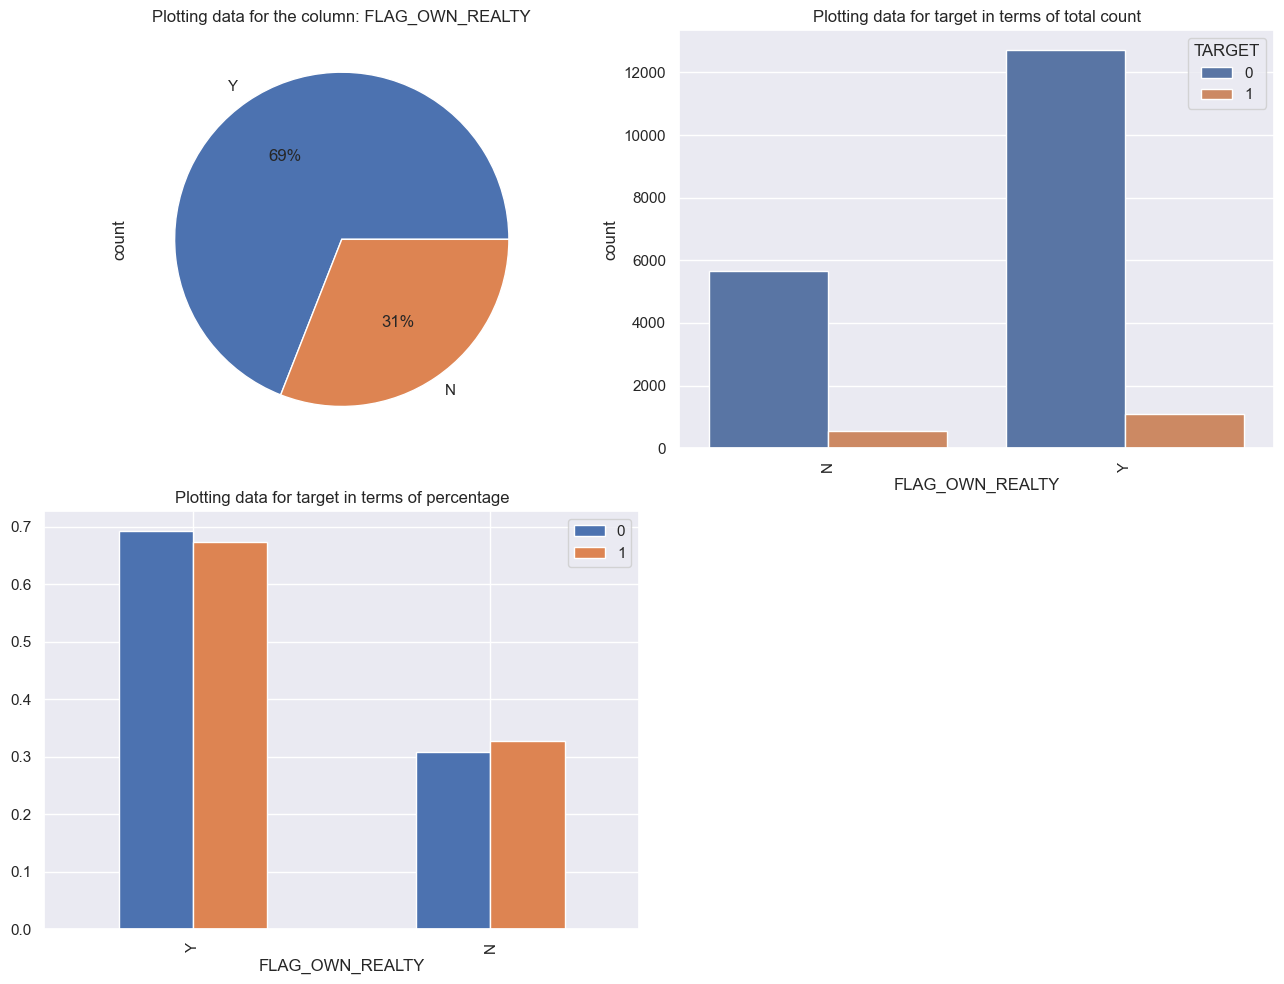

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


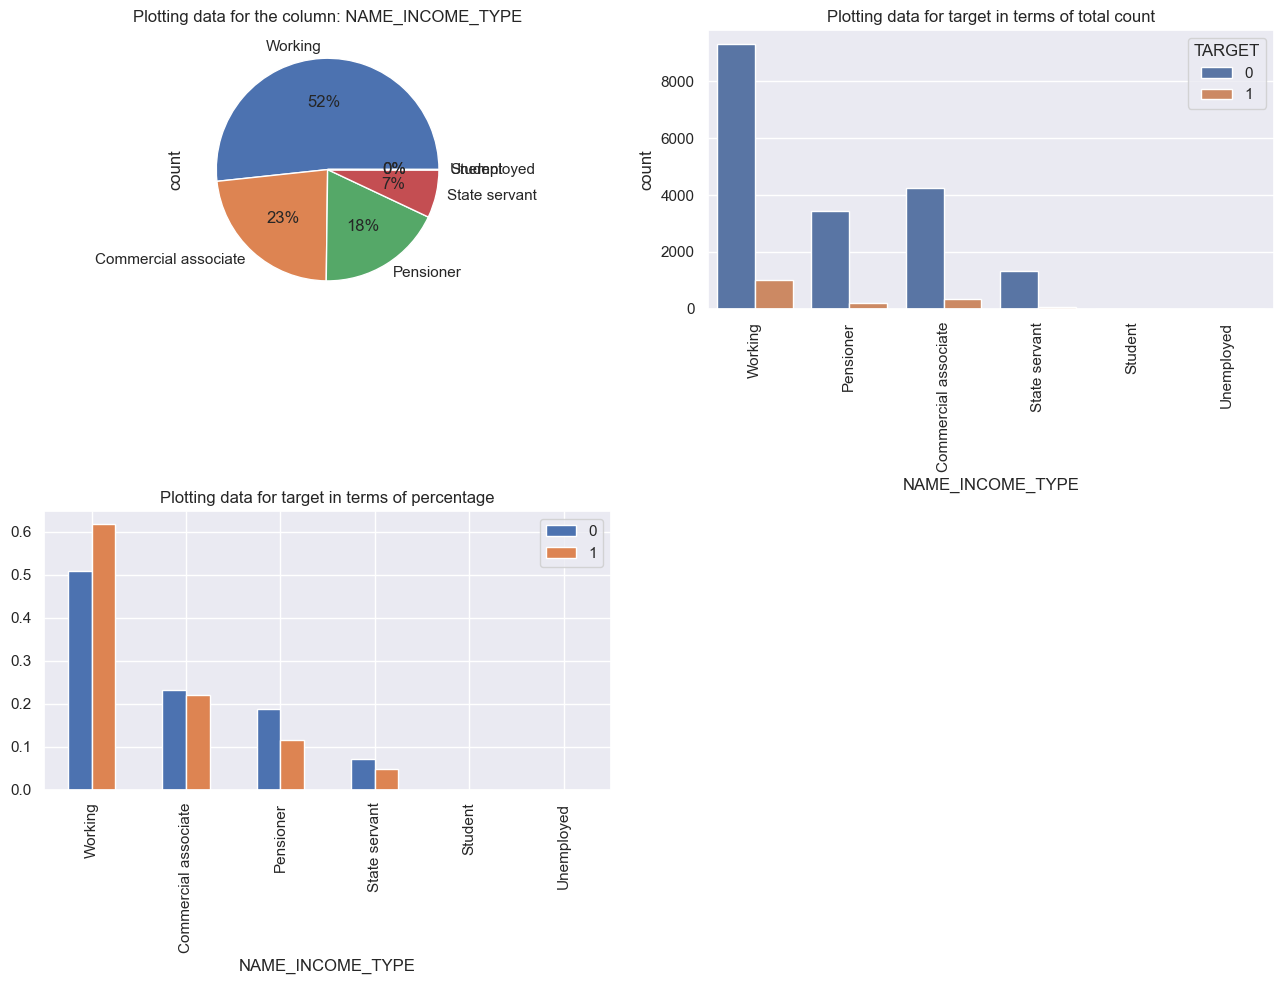

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


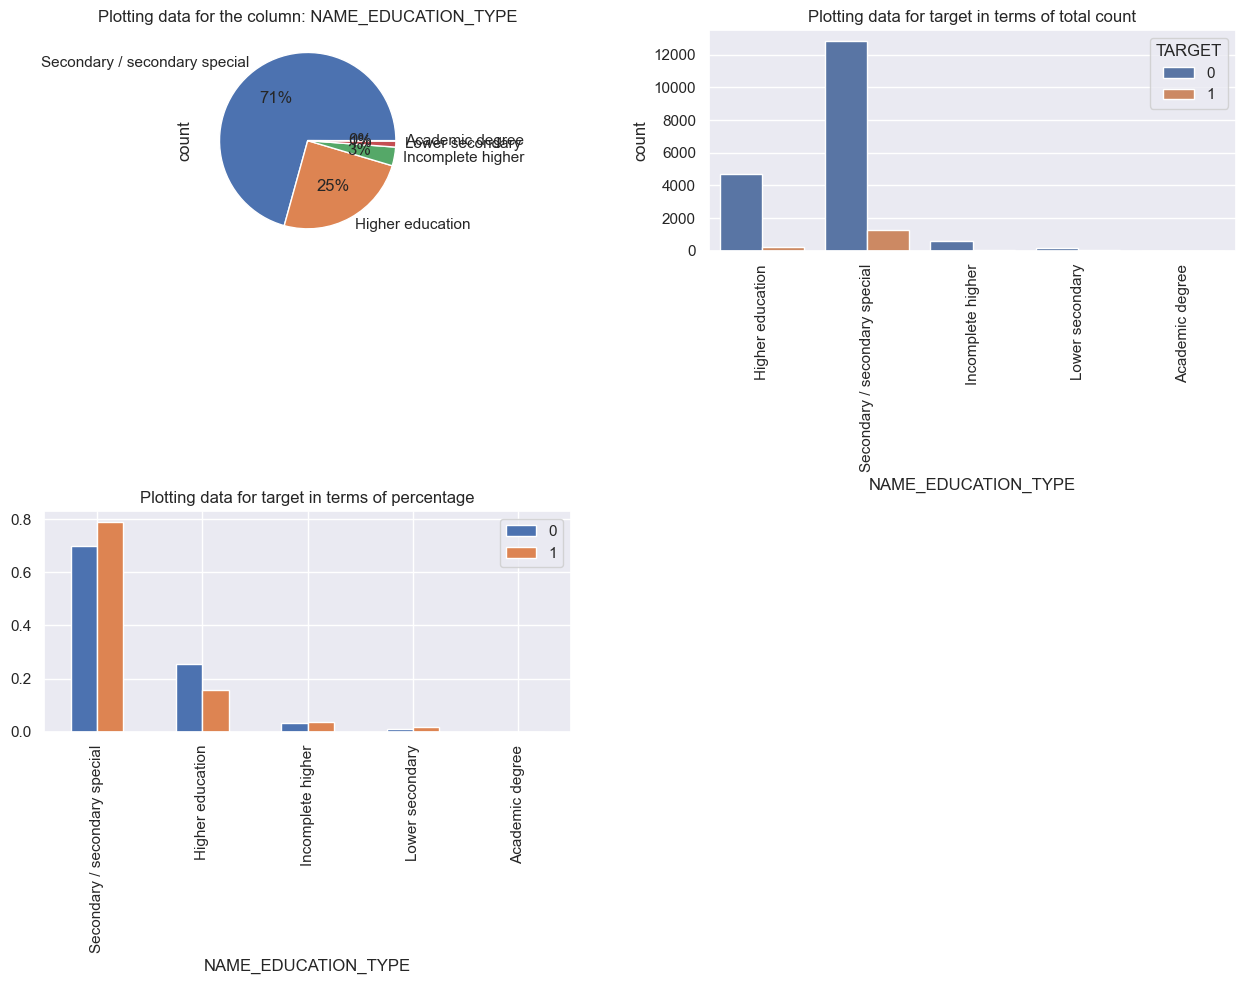

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


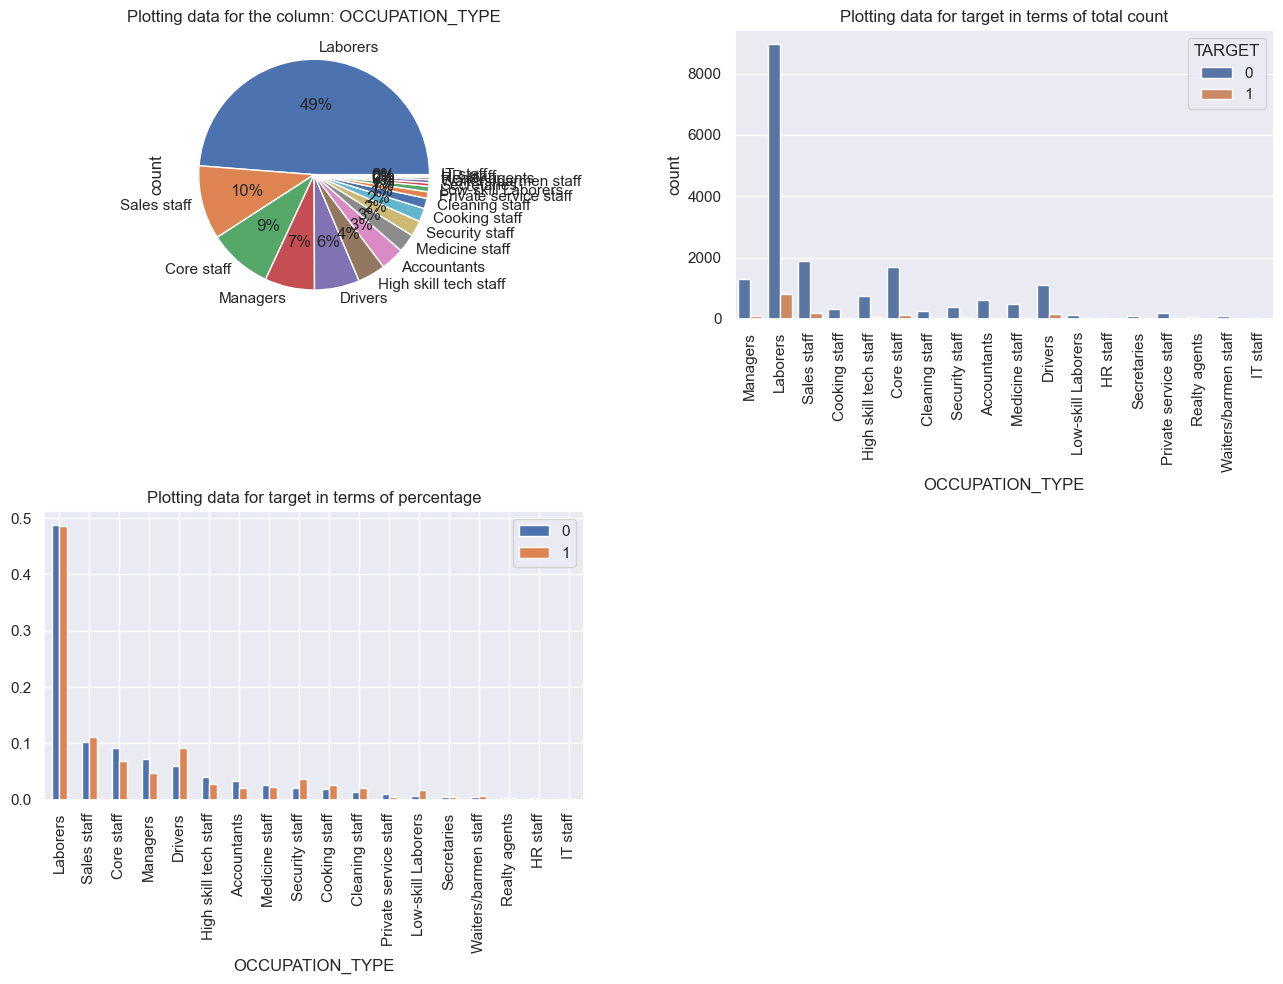

----------------------------------------------------------------------------------------------
Plotting  AMT_GOODS_PRICE


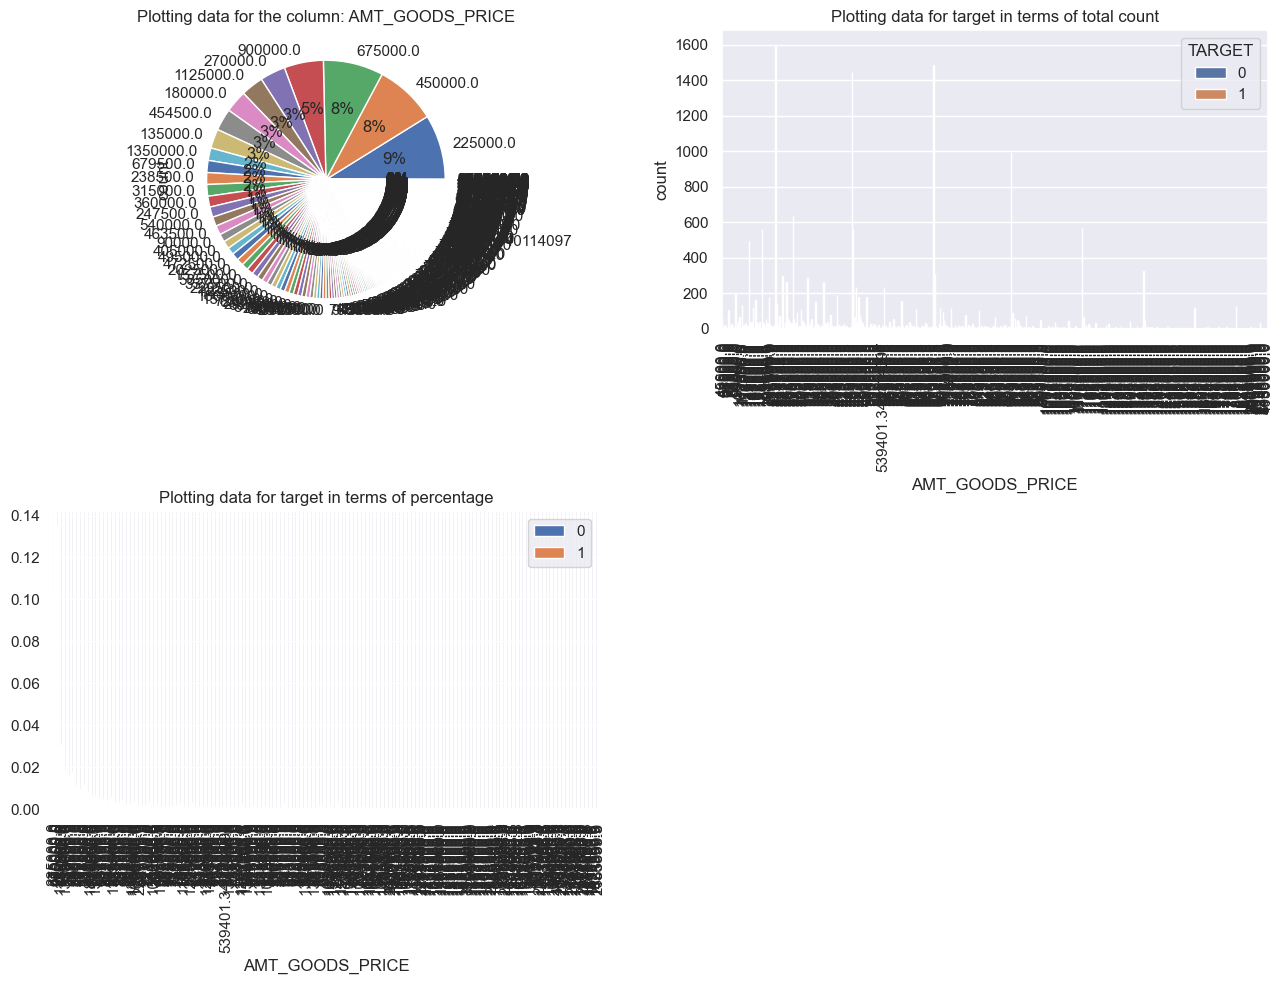

----------------------------------------------------------------------------------------------


In [74]:
for column in train_dataset:
    print("Plotting ", column)
    plotting(application_train, train_0, train_1, column)
    print('----------------------------------------------------------------------------------------------')

## Insights on the above plot

-  AMT_INCOME_TOTAL - Plot is not clear hence not insightful
-  FLAG_OWN_REALTY - By looking at the plots we can get a clear insight that, the client owning his/her own flat doesn't necessarily mean that, they will face problems in paying the loan. By looking at the barplot we can see the percentage of people who have a flat and don't have a flat, both of these groups have almost simmilar percetages in regards to settlement of loans or not settling the loans. Hence, we do no get any clear insight from this.
-  NAME_INCOME_TYPE - Again we are not seeing any clear picture from plotting this column against the TARGET variable.
-  NAME_EDUCATION_TYPE - Again same as the first case we don't get any sense that educaton type affects the client's ability to pay the loan.
-  OCCUPATION_TYPE - Same as the above two we can see their isn't a clear picture we are getting from this as well.
-  AMT_GOODS_PRICE - Plot is not clear hence not insightful

# Numerical columns

Now let's analyse the correlation between different numeric values on the data set. First we separate out the numeric columns in to a different dataframe and make a heat map. 

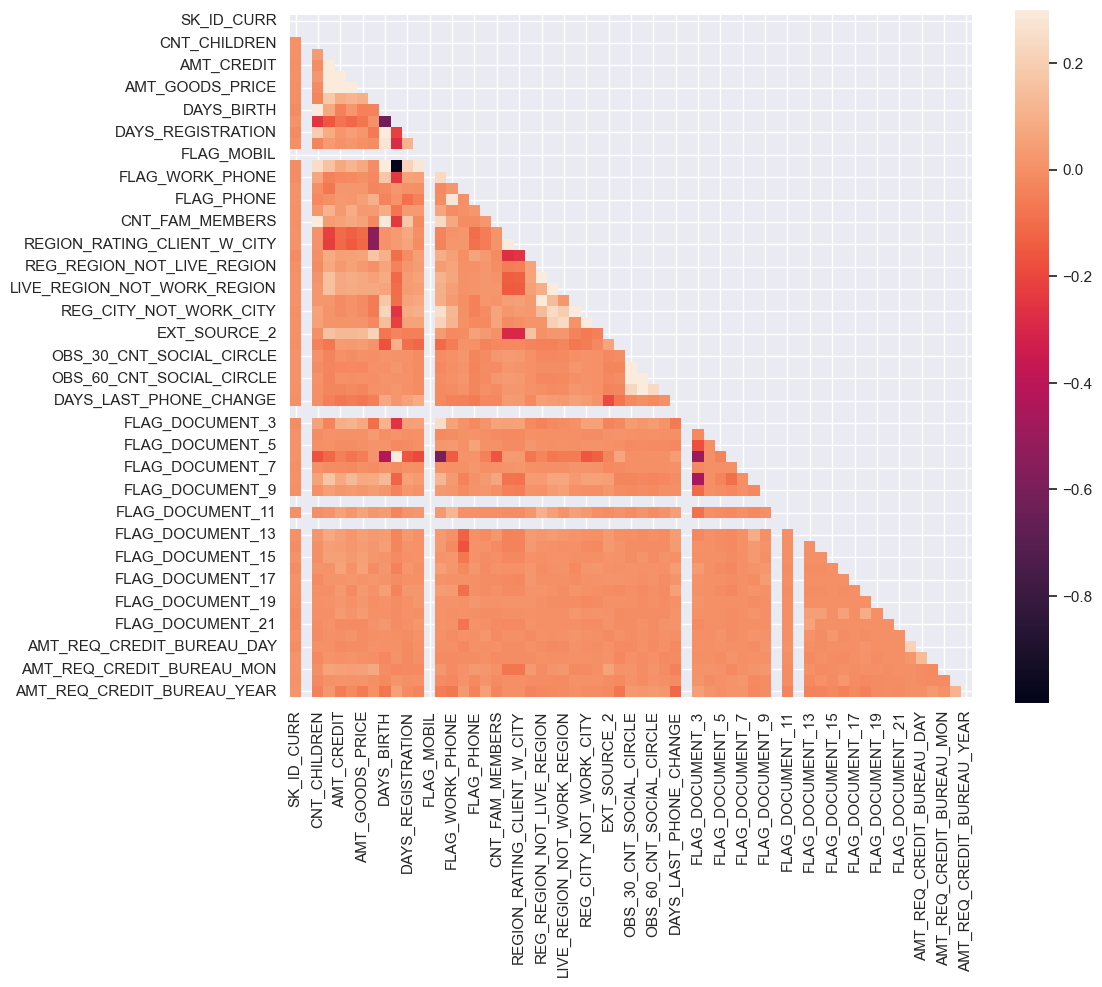

In [75]:
import numpy as np
train_0N = train_0.select_dtypes(include=[np.number])
corr = train_0N.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [76]:
train_0N .corr() #Looking at the correlations of every variable with every other variable

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.004034   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.004034     NaN      1.000000   
AMT_INCOME_TOTAL              0.003286     NaN      0.031386   
AMT_CREDIT                   -0.002899     NaN     -0.005700   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.007443     NaN      0.002764   
AMT_REQ_CREDIT_BUREAU_WEEK    0.010730     NaN     -0.018852   
AMT_REQ_CREDIT_BUREAU_MON     0.010664     NaN     -0.003469   
AMT_REQ_CREDIT_BUREAU_QRT     0.006978     NaN     -0.023104   
AMT_REQ_CREDIT_BUREAU_YEAR    0.010800     NaN     -0.040710   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.003286   -0.002899     0.003090   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.031386   -0.005700     0.020516   
AMT_INCOME_TOTAL                    1.000000    0.375821     0.451599   
AMT_CREDIT                          0.375821    1.000000     0.770652   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001998   -0.010817    -0.008308   
AMT_REQ_CREDIT_BUREAU_WEEK          0.011223    0.004754     0.013853   
AMT_REQ_CREDIT_BUREAU_MON           0.057775    0.047143     0.044613   
AMT_REQ_CREDIT_BUREAU_QRT           0.005379    0.013536     0.009792   
AMT_REQ_CREDIT_BUREAU_YEAR          0.021925   -0.054336    -0.015525   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.002264                   -0.001690   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.010674                   -0.025481   
AMT_INCOME_TOTAL                   0.383146                    0.185898   
AMT_CREDIT                         0.986704                    0.095451   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY         -0.009355                    0.006182   
AMT_REQ_CREDIT_BUREAU_WEEK         0.005520                   -0.000090   
AMT_REQ_CREDIT_BUREAU_MON          0.048720                    0.076262   
AMT_REQ_CREDIT_BUREAU_QRT          0.014094                   -0.001634   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.057202                    0.001678   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.010723       0.005535  ...          0.001628   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.345207      -0.249636  ...         -0.002072   
AMT_INCOME_TOTAL              0.080129      -0.161459  ...         -0.000551   
AMT_CREDIT                   -0.045005      -0.076737  ...          0.030105   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000953       0.001976  ...          0.015389   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.020198       0.009796  ...          0.006655   
AMT_REQ_CREDIT_BUREAU_MON    -0.008331      -0.022012  ...         -0.000345   
AMT_REQ_CREDIT_BUREAU_QRT    -0.017350       0.013372  ...         -0.016016   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.074562       0.050846  ...         -0.043935   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000123         -0.013971   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.004686         -0.003466   
AMT_INCOME_TOTAL                    0.006688         -0.002511   
AMT_CREDIT                          0.021838          0.030944   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.002085         -0.00

In [77]:
train_0N .corr().abs() #making the correlation values absolute as , we want to see strongly correlated variables and plot it in a meaningful heatmap.

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.004034   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.004034     NaN      1.000000   
AMT_INCOME_TOTAL              0.003286     NaN      0.031386   
AMT_CREDIT                    0.002899     NaN      0.005700   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.007443     NaN      0.002764   
AMT_REQ_CREDIT_BUREAU_WEEK    0.010730     NaN      0.018852   
AMT_REQ_CREDIT_BUREAU_MON     0.010664     NaN      0.003469   
AMT_REQ_CREDIT_BUREAU_QRT     0.006978     NaN      0.023104   
AMT_REQ_CREDIT_BUREAU_YEAR    0.010800     NaN      0.040710   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.003286    0.002899     0.003090   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.031386    0.005700     0.020516   
AMT_INCOME_TOTAL                    1.000000    0.375821     0.451599   
AMT_CREDIT                          0.375821    1.000000     0.770652   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001998    0.010817     0.008308   
AMT_REQ_CREDIT_BUREAU_WEEK          0.011223    0.004754     0.013853   
AMT_REQ_CREDIT_BUREAU_MON           0.057775    0.047143     0.044613   
AMT_REQ_CREDIT_BUREAU_QRT           0.005379    0.013536     0.009792   
AMT_REQ_CREDIT_BUREAU_YEAR          0.021925    0.054336     0.015525   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.002264                    0.001690   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                       0.010674                    0.025481   
AMT_INCOME_TOTAL                   0.383146                    0.185898   
AMT_CREDIT                         0.986704                    0.095451   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.009355                    0.006182   
AMT_REQ_CREDIT_BUREAU_WEEK         0.005520                    0.000090   
AMT_REQ_CREDIT_BUREAU_MON          0.048720                    0.076262   
AMT_REQ_CREDIT_BUREAU_QRT          0.014094                    0.001634   
AMT_REQ_CREDIT_BUREAU_YEAR         0.057202                    0.001678   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.010723       0.005535  ...          0.001628   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.345207       0.249636  ...          0.002072   
AMT_INCOME_TOTAL              0.080129       0.161459  ...          0.000551   
AMT_CREDIT                    0.045005       0.076737  ...          0.030105   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000953       0.001976  ...          0.015389   
AMT_REQ_CREDIT_BUREAU_WEEK    0.020198       0.009796  ...          0.006655   
AMT_REQ_CREDIT_BUREAU_MON     0.008331       0.022012  ...          0.000345   
AMT_REQ_CREDIT_BUREAU_QRT     0.017350       0.013372  ...          0.016016   
AMT_REQ_CREDIT_BUREAU_YEAR    0.074562       0.050846  ...          0.043935   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000123          0.013971   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.004686          0.003466   
AMT_INCOME_TOTAL                    0.006688          0.002511   
AMT_CREDIT                          0.021838          0.030944   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002085          0.00

In [78]:
train_0N .corr().abs().unstack() # unstacking the variables row wise to see a much more clearer picture of the correlation
pd.set_option('display.float_format', '{:.6f}'.format)

In [79]:
train_0N .corr().abs().unstack().sort_values()

REGION_RATING_CLIENT        AMT_REQ_CREDIT_BUREAU_YEAR   0.000006
AMT_REQ_CREDIT_BUREAU_YEAR  REGION_RATING_CLIENT         0.000006
REGION_POPULATION_RELATIVE  AMT_REQ_CREDIT_BUREAU_WEEK   0.000090
AMT_REQ_CREDIT_BUREAU_WEEK  REGION_POPULATION_RELATIVE   0.000090
SK_ID_CURR                  FLAG_DOCUMENT_19             0.000123
                                                           ...   
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                            NaN
                            FLAG_MOBIL                        NaN
                            FLAG_DOCUMENT_2                   NaN
                            FLAG_DOCUMENT_10                  NaN
                            FLAG_DOCUMENT_12                  NaN
Length: 3721, dtype: float64

In [80]:
correlation_0 = train_0N .corr().abs().unstack().sort_values().dropna()
# dropping NAN values from the correlation series above
correlation_0

REGION_RATING_CLIENT        AMT_REQ_CREDIT_BUREAU_YEAR   0.000006
AMT_REQ_CREDIT_BUREAU_YEAR  REGION_RATING_CLIENT         0.000006
REGION_POPULATION_RELATIVE  AMT_REQ_CREDIT_BUREAU_WEEK   0.000090
AMT_REQ_CREDIT_BUREAU_WEEK  REGION_POPULATION_RELATIVE   0.000090
SK_ID_CURR                  FLAG_DOCUMENT_19             0.000123
                                                           ...   
DEF_60_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE     1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     1.000000
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     1.000000
FLAG_DOCUMENT_11            FLAG_DOCUMENT_11             1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR   1.000000
Length: 3136, dtype: float64

In [81]:
correlation_0 = correlation_0[correlation_0 != 1.0] 
# removing the self -correlation with a variable with itself 
# becaus it is always 1 and it is meaningless
print(correlation_0)

REGION_RATING_CLIENT        AMT_REQ_CREDIT_BUREAU_YEAR   0.000006
AMT_REQ_CREDIT_BUREAU_YEAR  REGION_RATING_CLIENT         0.000006
REGION_POPULATION_RELATIVE  AMT_REQ_CREDIT_BUREAU_WEEK   0.000090
AMT_REQ_CREDIT_BUREAU_WEEK  REGION_POPULATION_RELATIVE   0.000090
SK_ID_CURR                  FLAG_DOCUMENT_19             0.000123
                                                           ...   
AMT_CREDIT                  AMT_GOODS_PRICE              0.986704
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.998426
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998426
FLAG_EMP_PHONE              DAYS_EMPLOYED                0.999713
DAYS_EMPLOYED               FLAG_EMP_PHONE               0.999713
Length: 3080, dtype: float64


### plotting the heat map of top 10 correlations to see the variables that are very strongly correlated with each other to generate insights.

In [82]:
# Findign out top 10 strongest correlations
top_correlations = correlation_0.tail(10) # Using tail for strongest since sorted ascending
# Convertint to DataFrame for easier plotting
top_correlation_df = top_correlations.to_frame('correlation').reset_index()

In [83]:
top_correlation_df

level_0                      level_1  correlation
0                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.881356
1              CNT_FAM_MEMBERS                 CNT_CHILDREN     0.881356
2  REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT     0.956542
3         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.956542
4              AMT_GOODS_PRICE                   AMT_CREDIT     0.986704
5                   AMT_CREDIT              AMT_GOODS_PRICE     0.986704
6     OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.998426
7     OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.998426
8               FLAG_EMP_PHONE                DAYS_EMPLOYED     0.999713
9                DAYS_EMPLOYED               FLAG_EMP_PHONE     0.999713

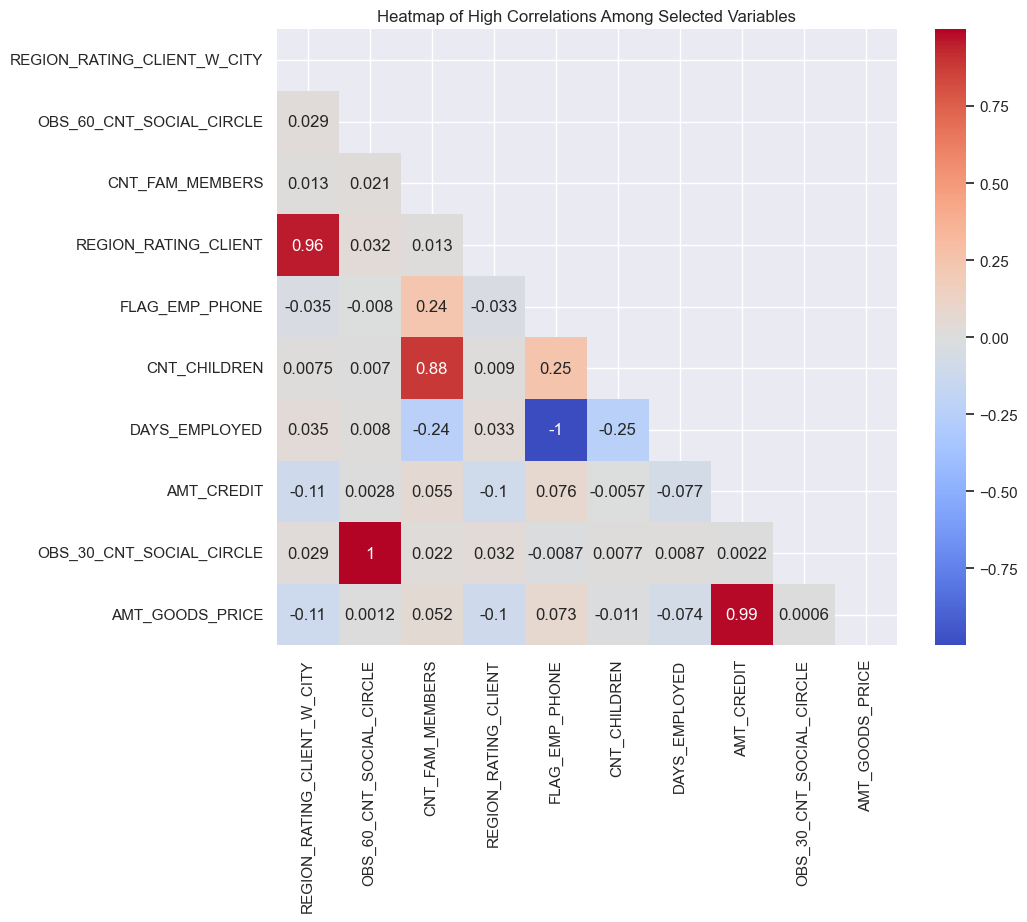

In [86]:

# List of interesting variables, ensuring to include all variables involved in top correlations
interesting_vars = list(set(top_correlation_df['level_0'].tolist() + top_correlation_df['level_1'].tolist()))

# Subset the original DataFrame
subset_matrix = train_0N[interesting_vars].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(subset_matrix, dtype=bool))

# Heatmap with mask for the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix,mask = mask,annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of High Correlations Among Selected Variables')
plt.show()

-  Here we can see that AMT_CREDIT has strong correlation with OBS_60_CNT_SOCIAL_CIRCLE	but, it doen't say much because here the variables are not necessarily dependept . Meaning here correlation doesn't cause causation.
-  CNT_FAM_MEMBERS with CNT_CHILDREN - This makes sense as if a client has more kids it means he/she has more family members.
-  REGION_RATING_CLIENT with REGION_RATING_CLIENT_W_CITY - This makes sense as both these ratings should be almost simmilar.
-  FLAG_EMP_PHONE with DAYS_EMPLOYED - Here we can see it is a perfect negative correlation. this is becaus the DAYS_EMPLOYED contains info on, how many days before the application the person started current employment and it is a negative numeber.And  FLAG_EMP_PHONE is 1 or 0.
-  OBS_60_CNT_SOCIAL_CIRCLE	with OBS_30_CNT_SOCIAL_CIRCLE - This also makes sense to have a perfect positive correlation as clients who have defaulted the loan fo 60 days has definitely defaulted it for 30 days.

### Defaulter correlation

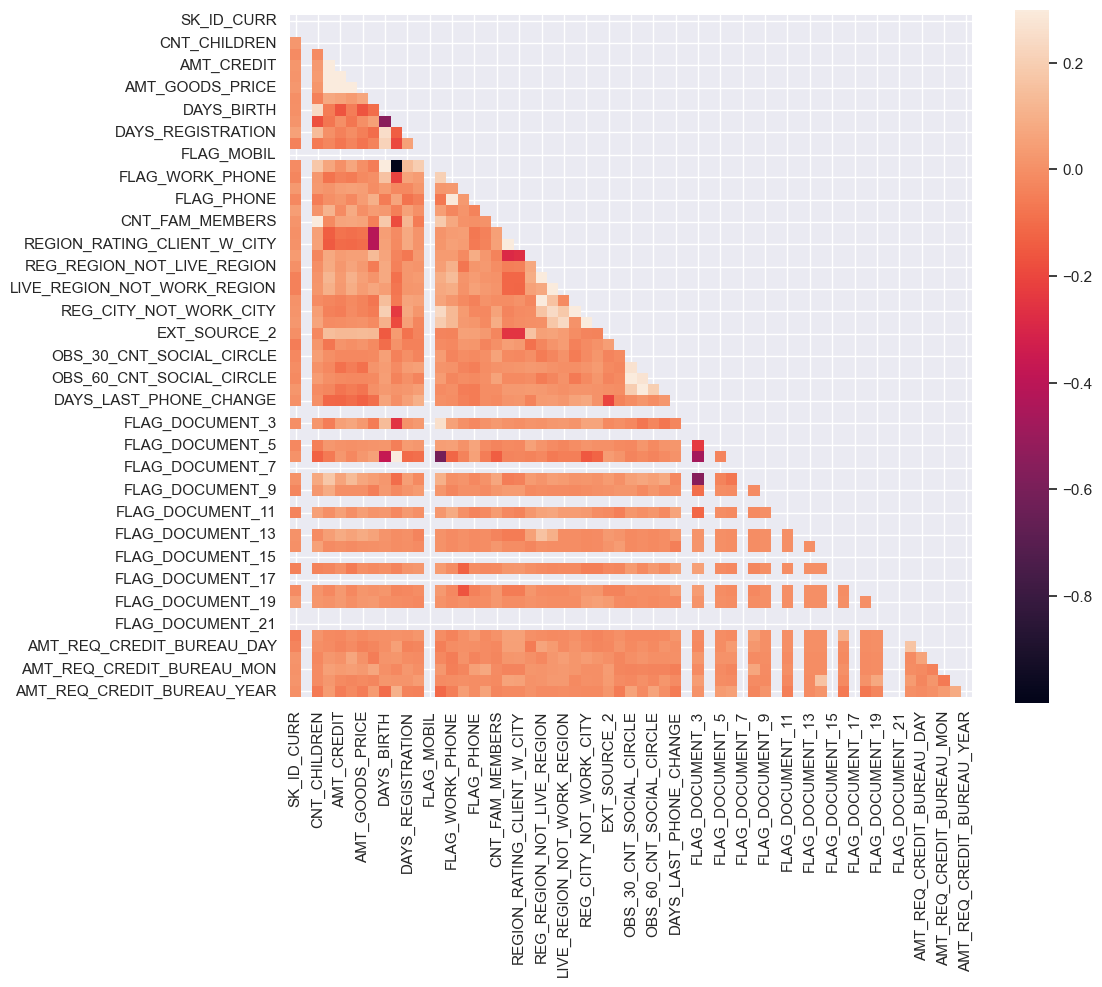

In [87]:
train_1N = train_1.select_dtypes(include=[np.number])
corr = train_1N.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [88]:
train_1N .corr() #Looking at the correlations of every variable with every other variable

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.025343   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.025343     NaN      1.000000   
AMT_INCOME_TOTAL             -0.011119     NaN     -0.009913   
AMT_CREDIT                    0.020277     NaN      0.026749   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.033100     NaN     -0.003086   
AMT_REQ_CREDIT_BUREAU_WEEK    0.011581     NaN     -0.023446   
AMT_REQ_CREDIT_BUREAU_MON     0.005907     NaN     -0.009822   
AMT_REQ_CREDIT_BUREAU_QRT     0.014177     NaN     -0.012324   
AMT_REQ_CREDIT_BUREAU_YEAR    0.000948     NaN     -0.064718   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.011119    0.020277     0.014641   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                       -0.009913    0.026749     0.031372   
AMT_INCOME_TOTAL                    1.000000    0.383179     0.464858   
AMT_CREDIT                          0.383179    1.000000     0.748802   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.014554   -0.032542    -0.014507   
AMT_REQ_CREDIT_BUREAU_WEEK          0.022904    0.009262     0.071268   
AMT_REQ_CREDIT_BUREAU_MON           0.050121    0.034077     0.041962   
AMT_REQ_CREDIT_BUREAU_QRT           0.020897   -0.019190    -0.029050   
AMT_REQ_CREDIT_BUREAU_YEAR          0.032674   -0.055290    -0.019107   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.021577                   -0.004641   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                       0.020306                   -0.041068   
AMT_INCOME_TOTAL                   0.391084                    0.071675   
AMT_CREDIT                         0.984237                    0.059701   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY         -0.041027                   -0.025178   
AMT_REQ_CREDIT_BUREAU_WEEK         0.009624                   -0.051182   
AMT_REQ_CREDIT_BUREAU_MON          0.027482                    0.070288   
AMT_REQ_CREDIT_BUREAU_QRT         -0.018519                   -0.030002   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.053367                    0.034298   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.005119       0.013111  ...         -0.013075   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.241160      -0.176585  ...          0.012684   
AMT_INCOME_TOTAL             -0.060448      -0.071134  ...         -0.021522   
AMT_CREDIT                   -0.162158      -0.003389  ...          0.027386   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.000299       0.048909  ...         -0.004814   
AMT_REQ_CREDIT_BUREAU_WEEK    0.013814       0.020708  ...         -0.013694   
AMT_REQ_CREDIT_BUREAU_MON     0.001937      -0.023319  ...         -0.010682   
AMT_REQ_CREDIT_BUREAU_QRT     0.015861       0.013196  ...          0.010509   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.096346       0.106779  ...         -0.068787   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.039039               NaN   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.019102               NaN   
AMT_INCOME_TOTAL                    0.009173               NaN   
AMT_CREDIT                          0.028998               NaN   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.001934              

In [89]:
train_1N .corr().abs() #making the correlation values absolute as , we want to see strongly correlated variables and plot it in a meaningful heatmap.

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.025343   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.025343     NaN      1.000000   
AMT_INCOME_TOTAL              0.011119     NaN      0.009913   
AMT_CREDIT                    0.020277     NaN      0.026749   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.033100     NaN      0.003086   
AMT_REQ_CREDIT_BUREAU_WEEK    0.011581     NaN      0.023446   
AMT_REQ_CREDIT_BUREAU_MON     0.005907     NaN      0.009822   
AMT_REQ_CREDIT_BUREAU_QRT     0.014177     NaN      0.012324   
AMT_REQ_CREDIT_BUREAU_YEAR    0.000948     NaN      0.064718   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.011119    0.020277     0.014641   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.009913    0.026749     0.031372   
AMT_INCOME_TOTAL                    1.000000    0.383179     0.464858   
AMT_CREDIT                          0.383179    1.000000     0.748802   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.014554    0.032542     0.014507   
AMT_REQ_CREDIT_BUREAU_WEEK          0.022904    0.009262     0.071268   
AMT_REQ_CREDIT_BUREAU_MON           0.050121    0.034077     0.041962   
AMT_REQ_CREDIT_BUREAU_QRT           0.020897    0.019190     0.029050   
AMT_REQ_CREDIT_BUREAU_YEAR          0.032674    0.055290     0.019107   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.021577                    0.004641   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                       0.020306                    0.041068   
AMT_INCOME_TOTAL                   0.391084                    0.071675   
AMT_CREDIT                         0.984237                    0.059701   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.041027                    0.025178   
AMT_REQ_CREDIT_BUREAU_WEEK         0.009624                    0.051182   
AMT_REQ_CREDIT_BUREAU_MON          0.027482                    0.070288   
AMT_REQ_CREDIT_BUREAU_QRT          0.018519                    0.030002   
AMT_REQ_CREDIT_BUREAU_YEAR         0.053367                    0.034298   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.005119       0.013111  ...          0.013075   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.241160       0.176585  ...          0.012684   
AMT_INCOME_TOTAL              0.060448       0.071134  ...          0.021522   
AMT_CREDIT                    0.162158       0.003389  ...          0.027386   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000299       0.048909  ...          0.004814   
AMT_REQ_CREDIT_BUREAU_WEEK    0.013814       0.020708  ...          0.013694   
AMT_REQ_CREDIT_BUREAU_MON     0.001937       0.023319  ...          0.010682   
AMT_REQ_CREDIT_BUREAU_QRT     0.015861       0.013196  ...          0.010509   
AMT_REQ_CREDIT_BUREAU_YEAR    0.096346       0.106779  ...          0.068787   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.039039               NaN   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.019102               NaN   
AMT_INCOME_TOTAL                    0.009173               NaN   
AMT_CREDIT                          0.028998               NaN   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001934              

In [90]:
train_1N .corr().abs().unstack() # unstacking the variables row wise to see a much more clearer picture of the correlation
pd.set_option('display.float_format', '{:.6f}'.format)

In [91]:
train_1N .corr().abs().unstack().sort_values()

DAYS_LAST_PHONE_CHANGE      AMT_REQ_CREDIT_BUREAU_DAY    0.000225
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_LAST_PHONE_CHANGE       0.000225
AMT_GOODS_PRICE             DAYS_EMPLOYED                0.000236
DAYS_EMPLOYED               AMT_GOODS_PRICE              0.000236
DEF_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_WEEK   0.000267
                                                           ...   
AMT_REQ_CREDIT_BUREAU_YEAR  FLAG_DOCUMENT_12                  NaN
                            FLAG_DOCUMENT_15                  NaN
                            FLAG_DOCUMENT_17                  NaN
                            FLAG_DOCUMENT_20                  NaN
                            FLAG_DOCUMENT_21                  NaN
Length: 3721, dtype: float64

In [92]:
correlation_1 = train_1N .corr().abs().unstack().sort_values().dropna()
# dropping NAN values from the correlation series above
correlation_1

DAYS_LAST_PHONE_CHANGE      AMT_REQ_CREDIT_BUREAU_DAY    0.000225
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_LAST_PHONE_CHANGE       0.000225
AMT_GOODS_PRICE             DAYS_EMPLOYED                0.000236
DAYS_EMPLOYED               AMT_GOODS_PRICE              0.000236
DEF_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_WEEK   0.000267
                                                           ...   
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     1.000000
EXT_SOURCE_3                EXT_SOURCE_3                 1.000000
EXT_SOURCE_2                EXT_SOURCE_2                 1.000000
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY       1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR   1.000000
Length: 2500, dtype: float64

In [93]:
correlation_1 = correlation_1[correlation_1 != 1.0] 
# removing the self -correlation with a variable with itself 
# becaus it is always 1 and it is meaningless
print(correlation_1)

DAYS_LAST_PHONE_CHANGE     AMT_REQ_CREDIT_BUREAU_DAY    0.000225
AMT_REQ_CREDIT_BUREAU_DAY  DAYS_LAST_PHONE_CHANGE       0.000225
AMT_GOODS_PRICE            DAYS_EMPLOYED                0.000236
DAYS_EMPLOYED              AMT_GOODS_PRICE              0.000236
DEF_60_CNT_SOCIAL_CIRCLE   AMT_REQ_CREDIT_BUREAU_WEEK   0.000267
                                                          ...   
AMT_GOODS_PRICE            AMT_CREDIT                   0.984237
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE     0.997835
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE     0.997835
DAYS_EMPLOYED              FLAG_EMP_PHONE               0.999890
FLAG_EMP_PHONE             DAYS_EMPLOYED                0.999890
Length: 2450, dtype: float64


### plotting the heat map of top 10 correlations to see the variables that are very strongly correlated with each other to generate insights.

In [94]:
# Findign out top 10 strongest correlations
top_correlations1 = correlation_1.tail(10) # Using tail for strongest since sorted ascending
# Convertint to DataFrame for easier plotting
top_correlation_df1 = top_correlations1.to_frame('correlation').reset_index()

In [95]:
top_correlation_df1

level_0                      level_1  correlation
0              CNT_FAM_MEMBERS                 CNT_CHILDREN     0.880404
1                 CNT_CHILDREN              CNT_FAM_MEMBERS     0.880404
2  REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT     0.953991
3         REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.953991
4                   AMT_CREDIT              AMT_GOODS_PRICE     0.984237
5              AMT_GOODS_PRICE                   AMT_CREDIT     0.984237
6     OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.997835
7     OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.997835
8                DAYS_EMPLOYED               FLAG_EMP_PHONE     0.999890
9               FLAG_EMP_PHONE                DAYS_EMPLOYED     0.999890

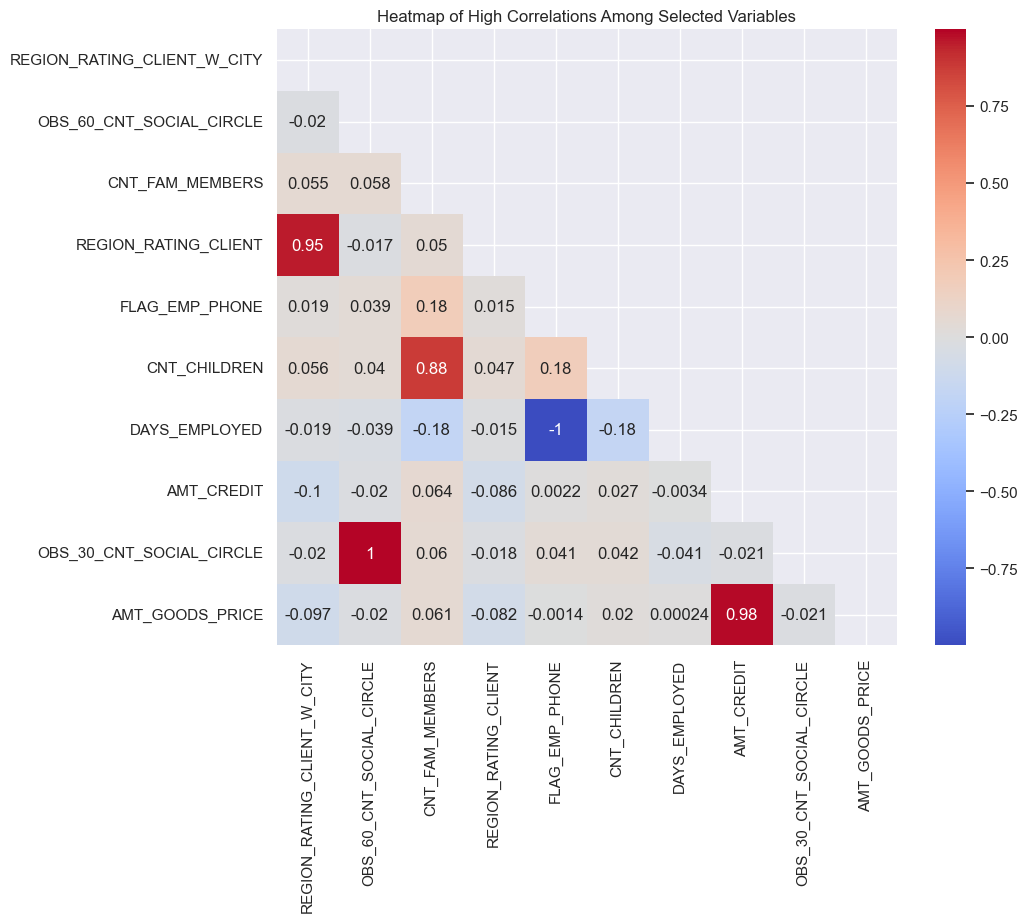

In [96]:
# List of interesting variables, ensuring to include all variables involved in top correlations
interesting_vars = list(set(top_correlation_df1['level_0'].tolist() + top_correlation_df1['level_1'].tolist()))

# Subset the original DataFrame
subset_matrix = train_1N[interesting_vars].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(subset_matrix, dtype=bool))

# Heatmap with mask for the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix,mask = mask,annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of High Correlations Among Selected Variables')
plt.show()

Here also we can see the correlation is like that of target = 0.

### Analysing for outliers

In [97]:
train_categorical = application_train.select_dtypes(include=['int64', 'float64']).columns

In [98]:
train_categorical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

Potting the numerial data based on the index and analysing if there are outliers in any of the column. 

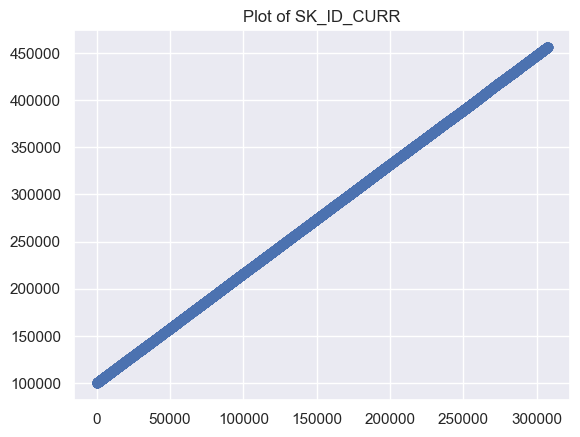

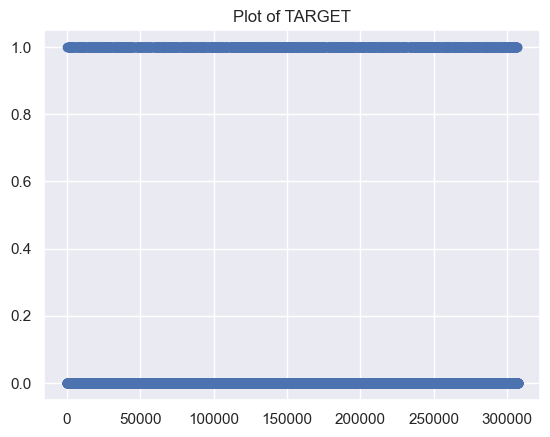

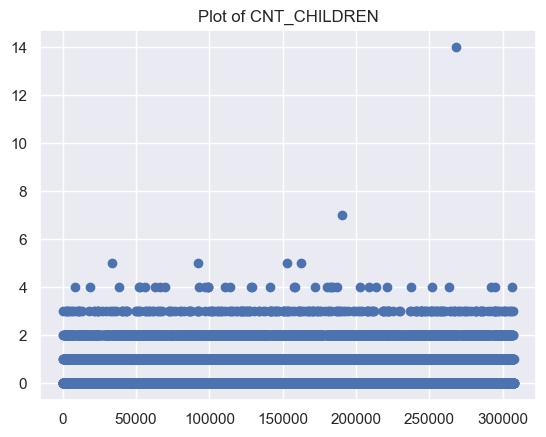

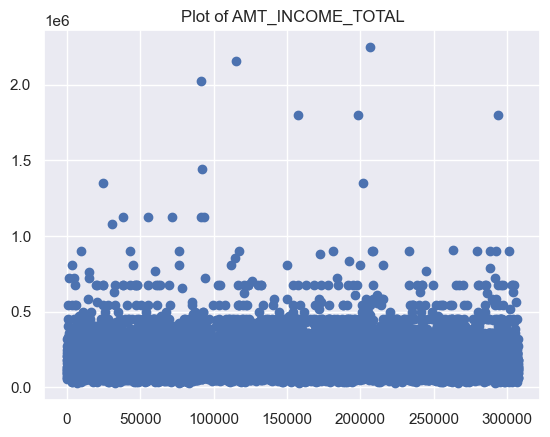

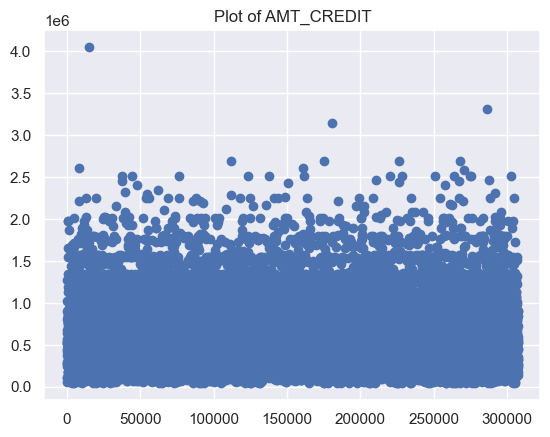

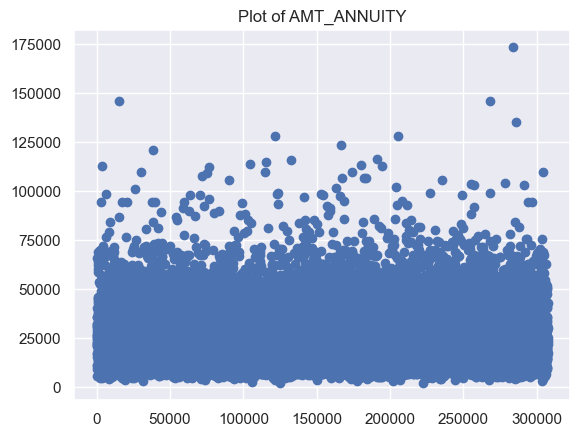

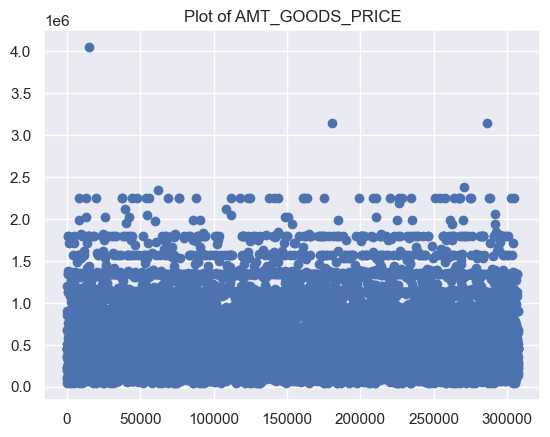

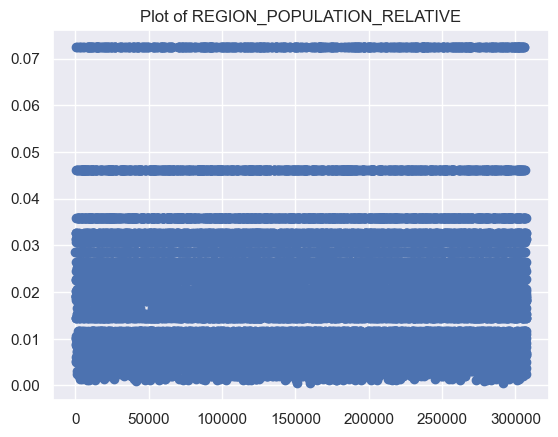

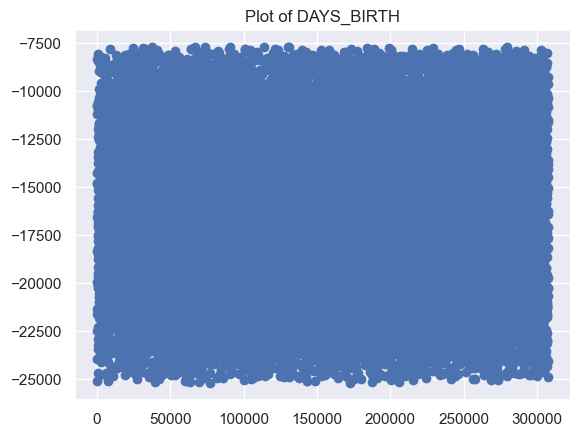

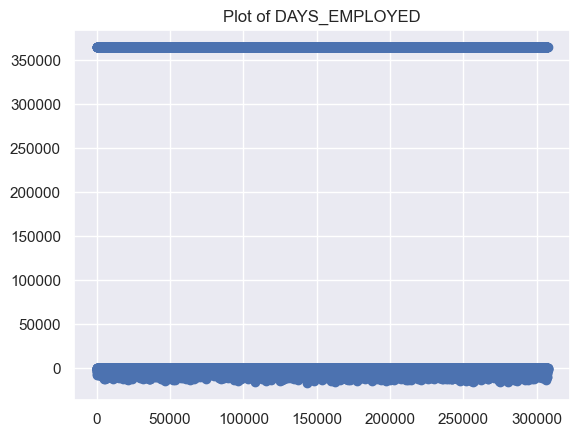

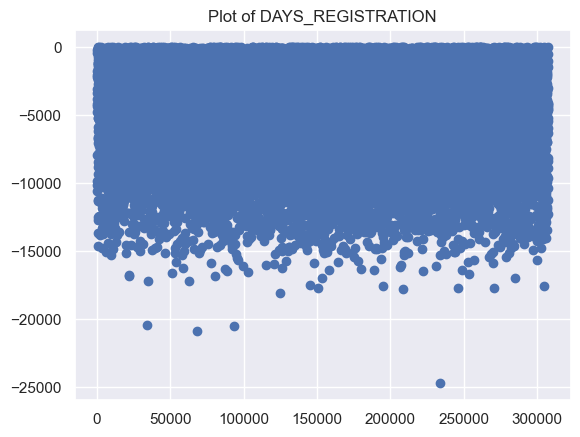

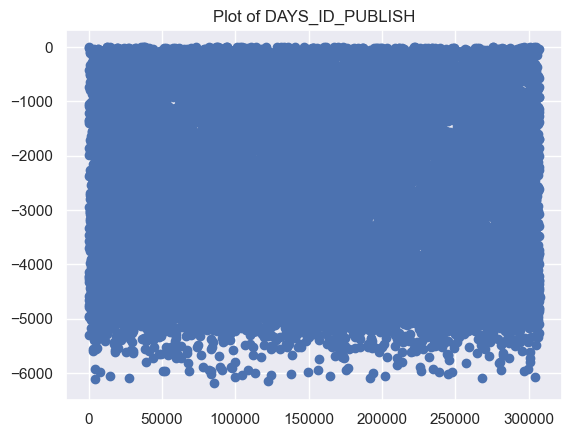

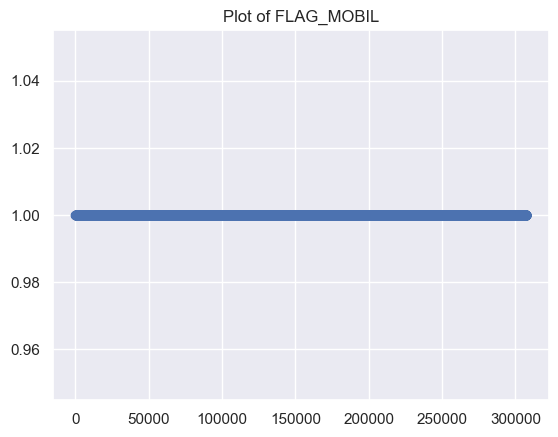

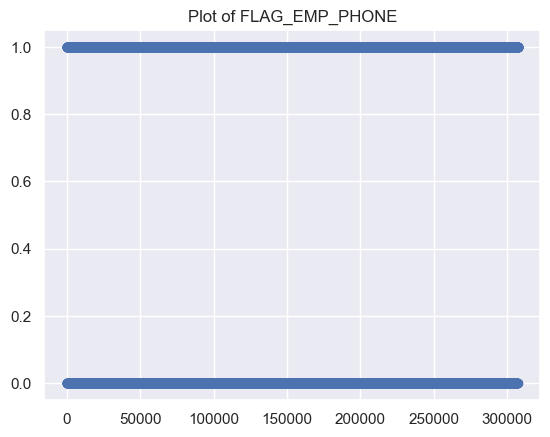

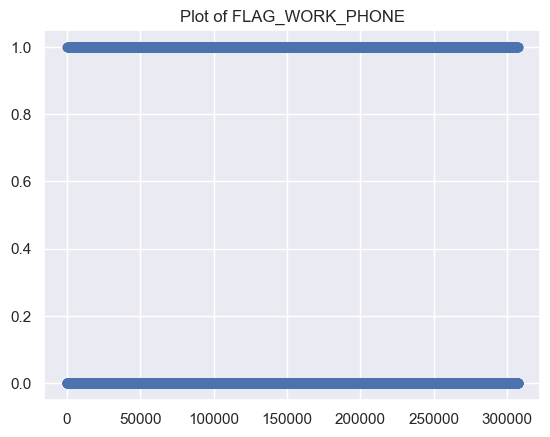

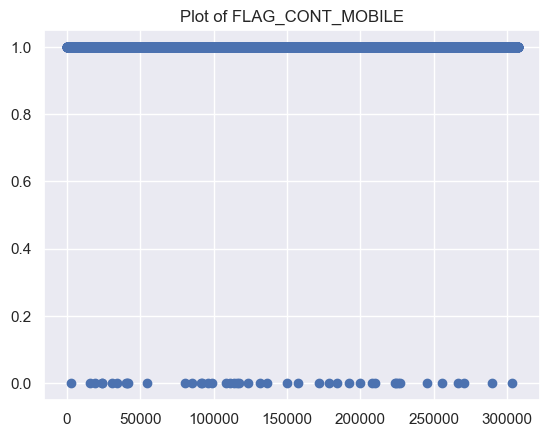

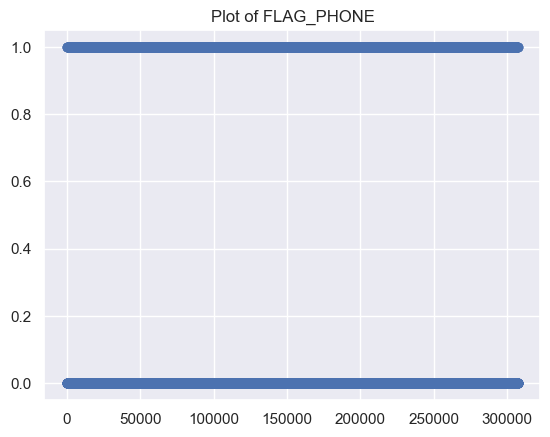

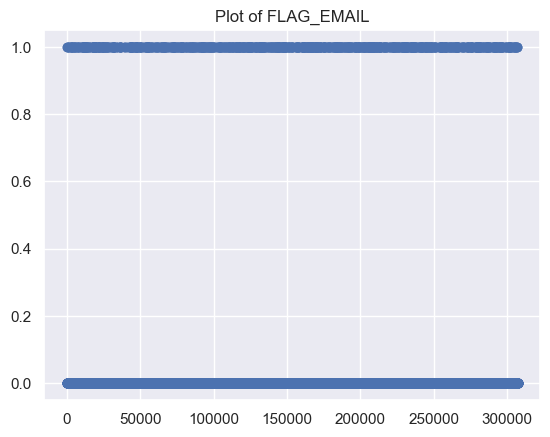

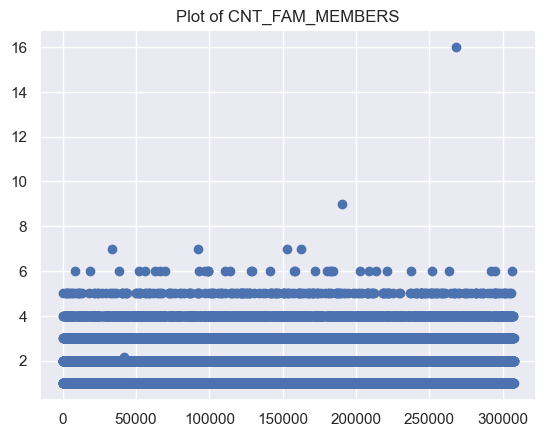

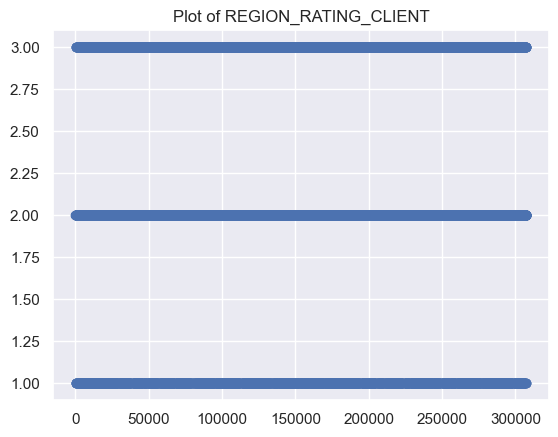

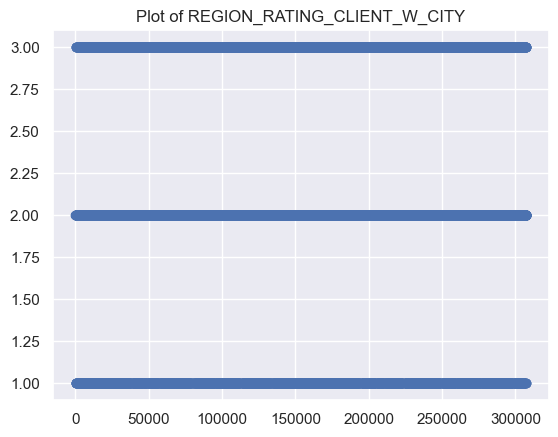

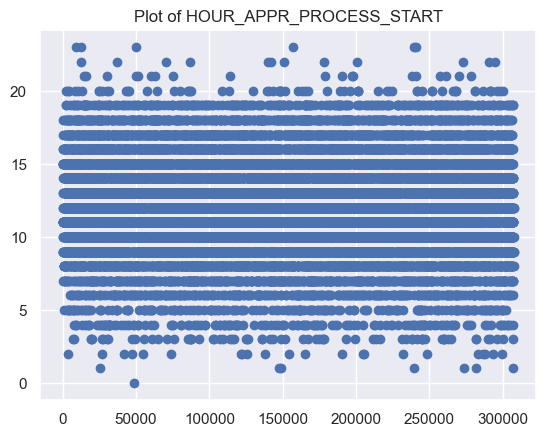

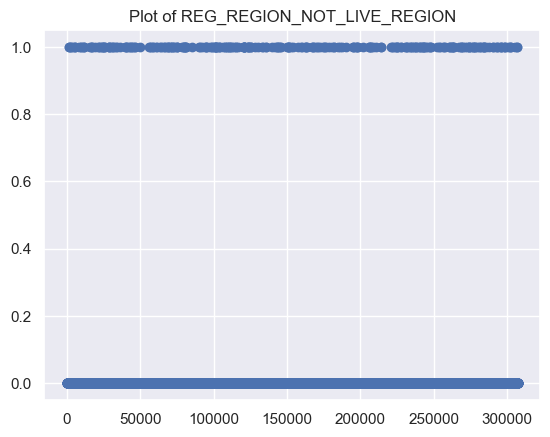

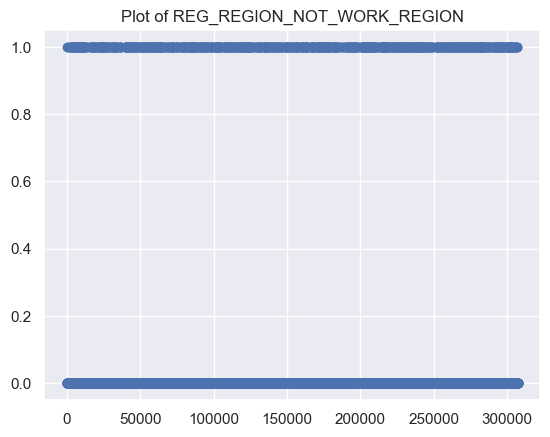

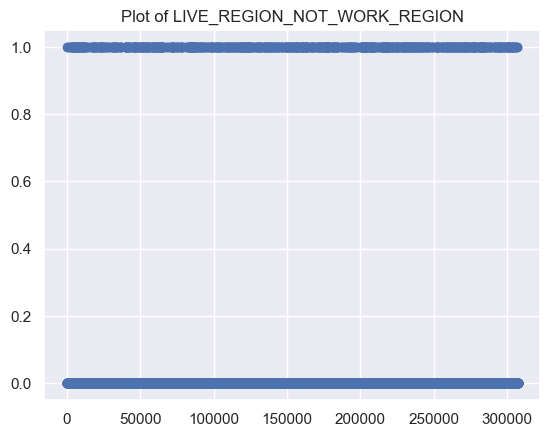

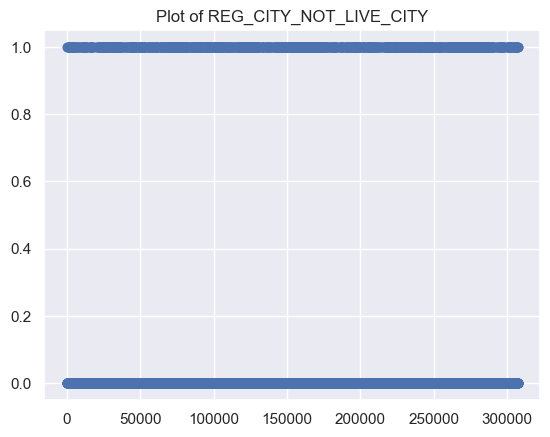

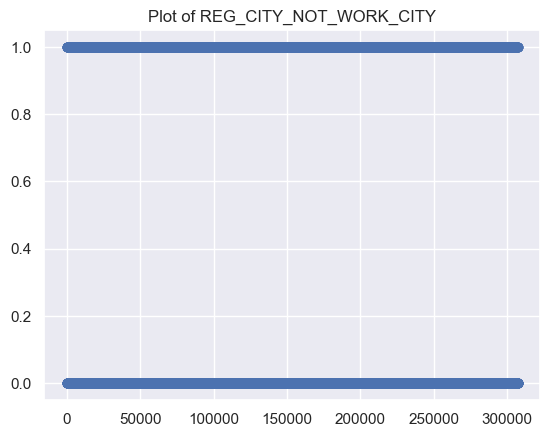

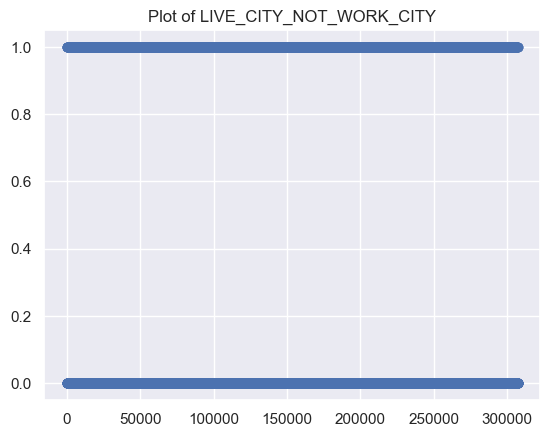

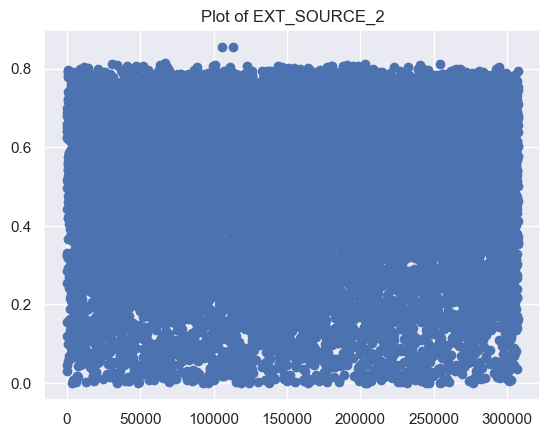

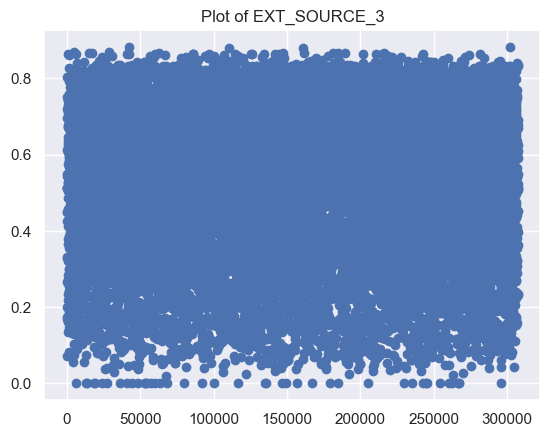

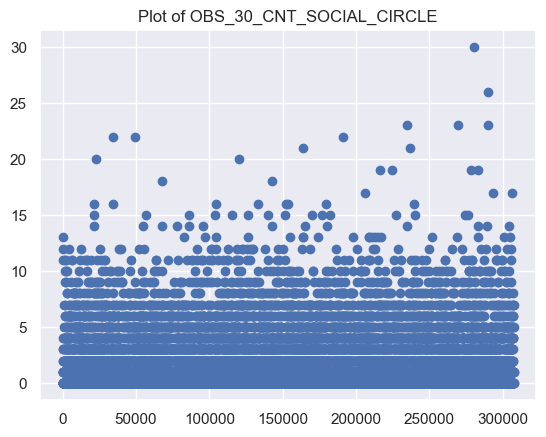

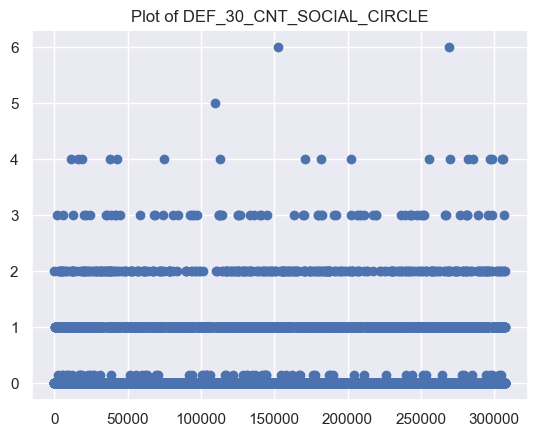

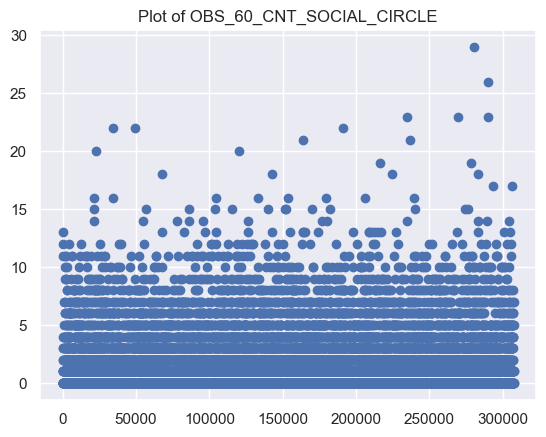

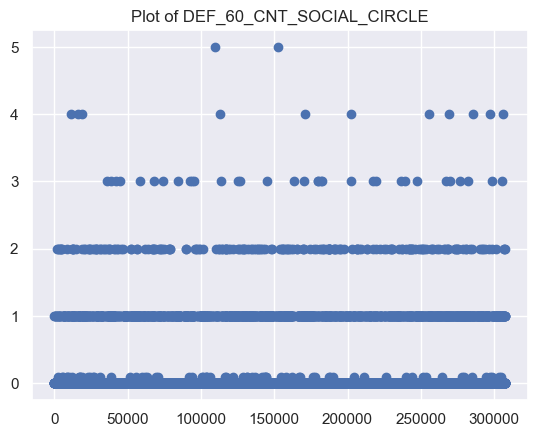

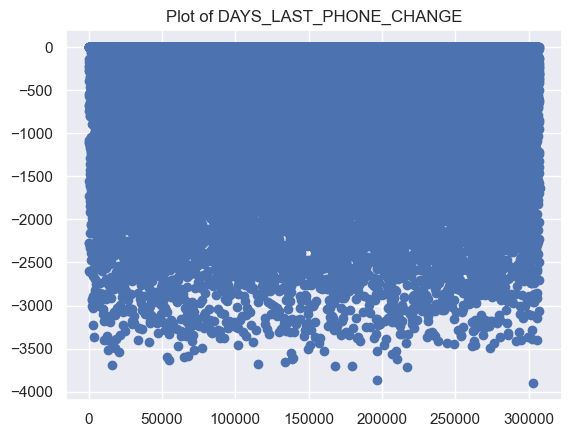

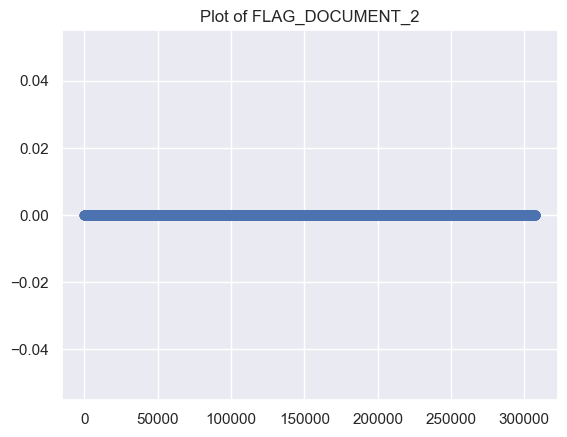

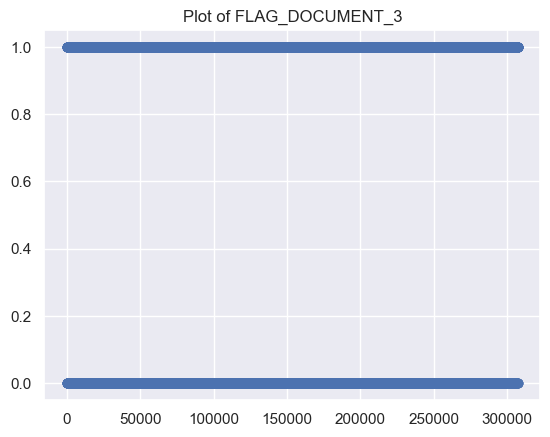

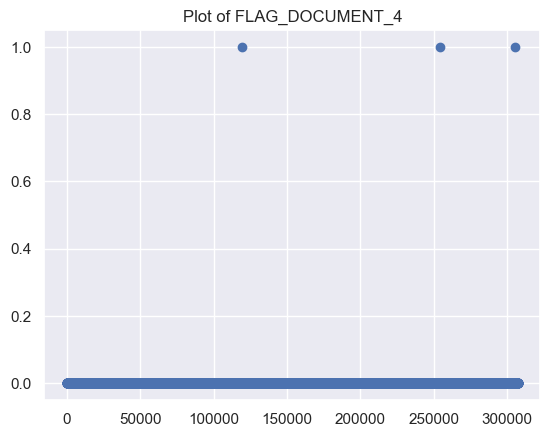

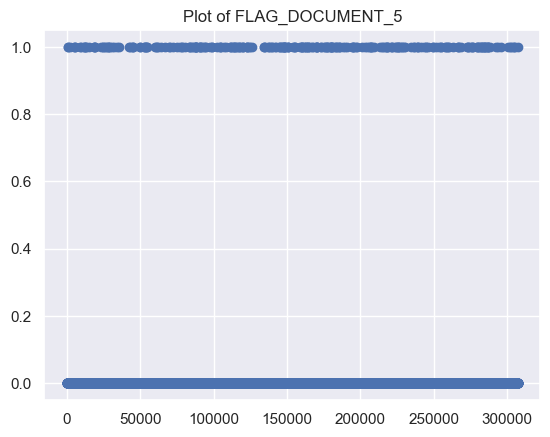

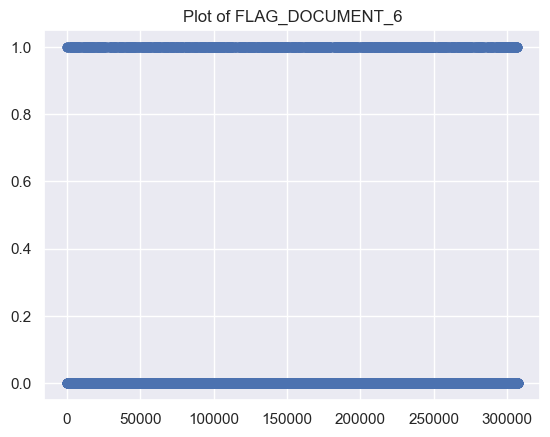

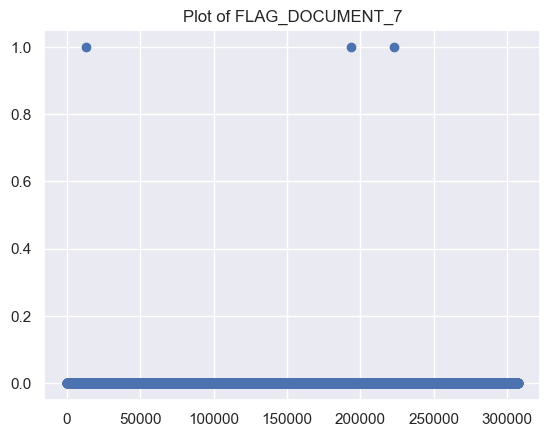

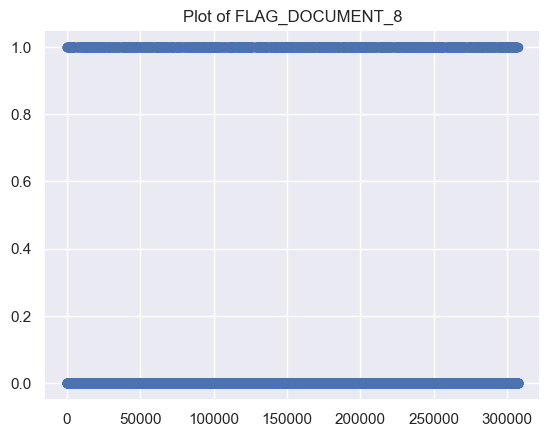

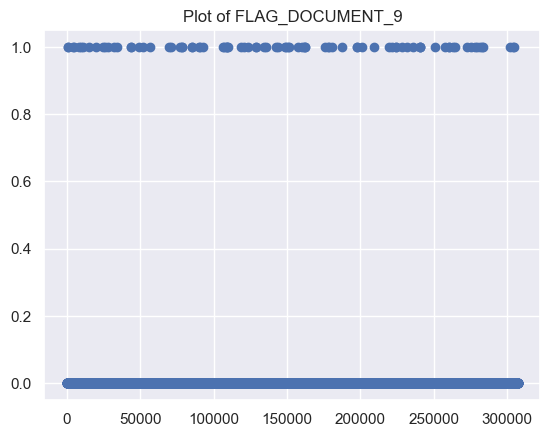

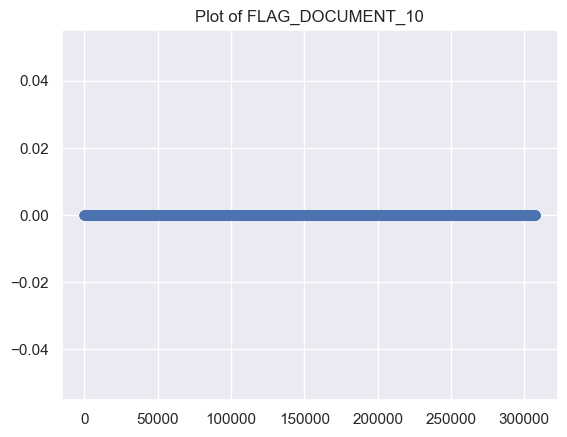

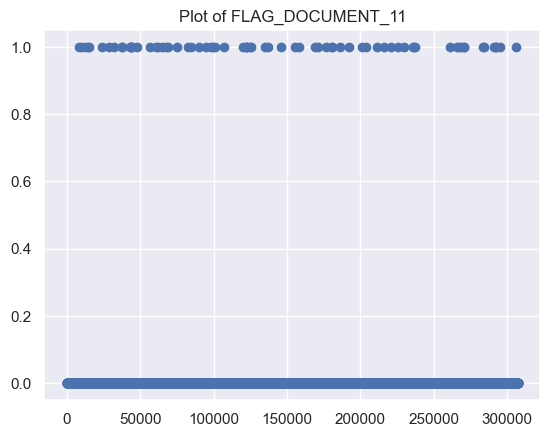

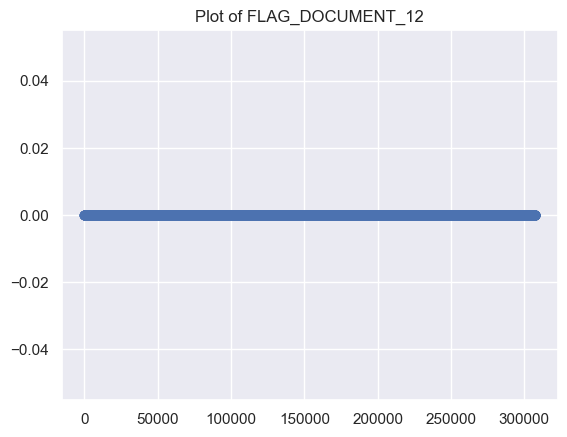

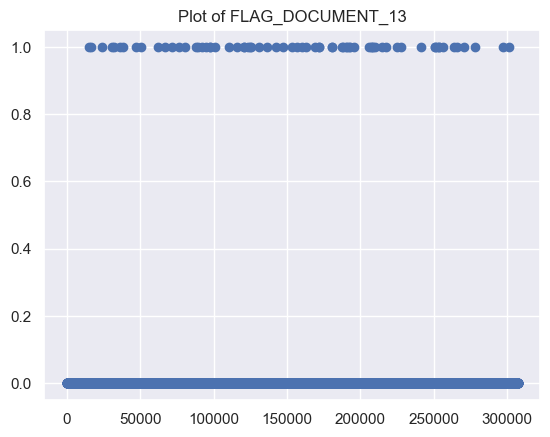

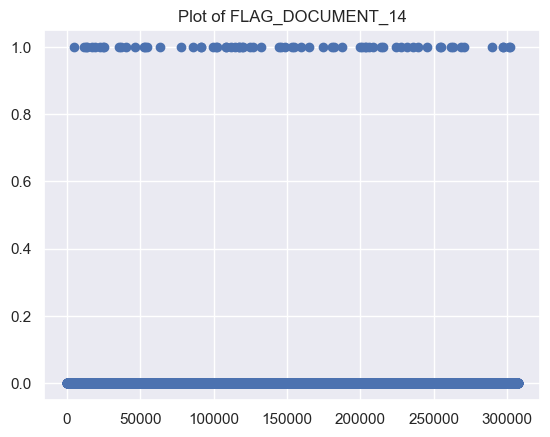

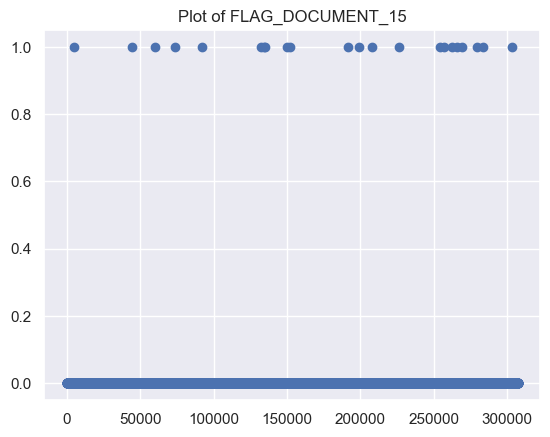

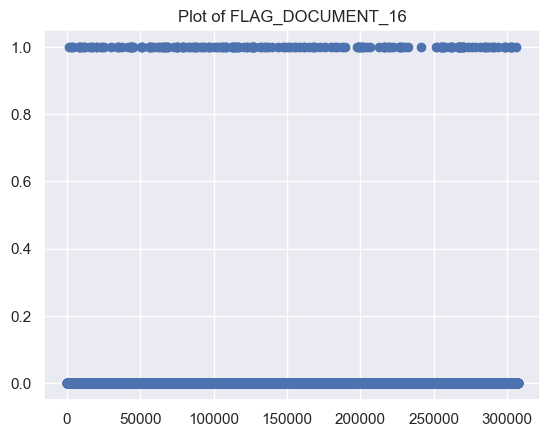

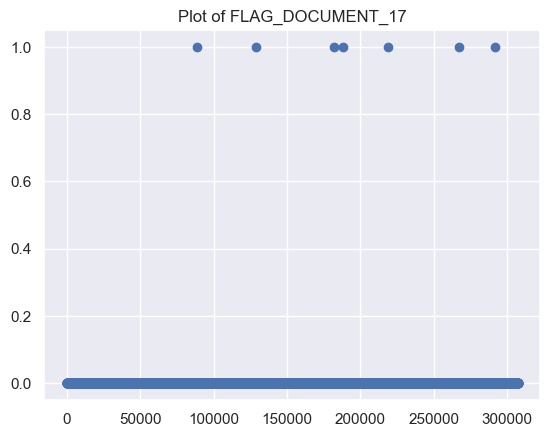

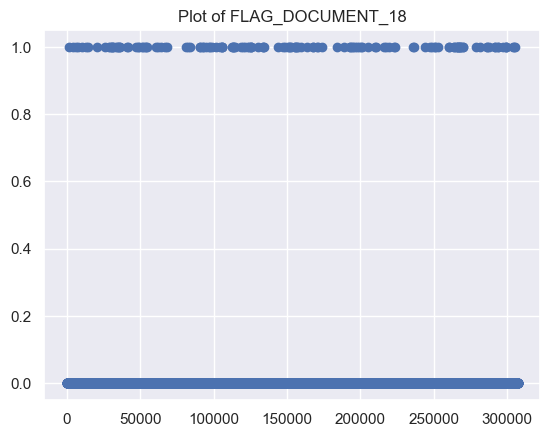

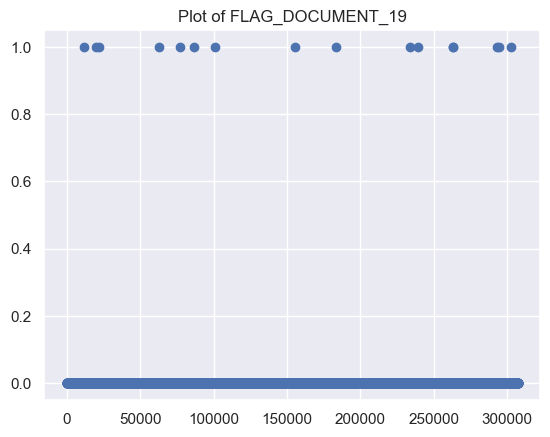

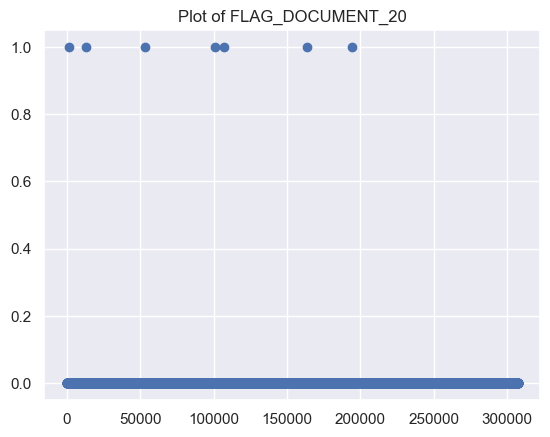

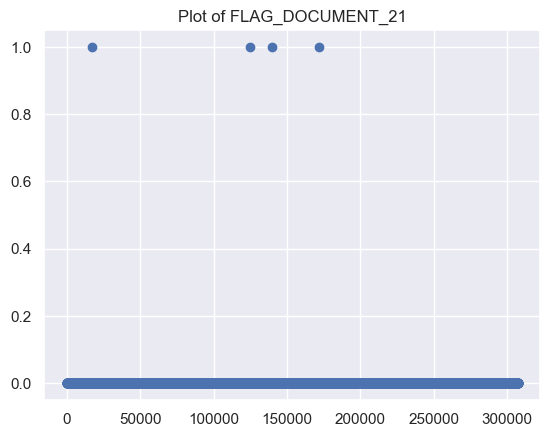

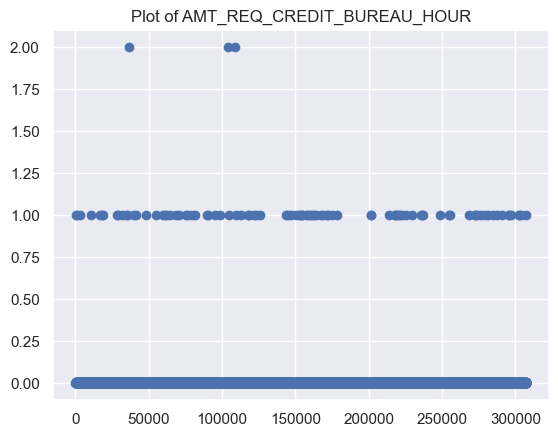

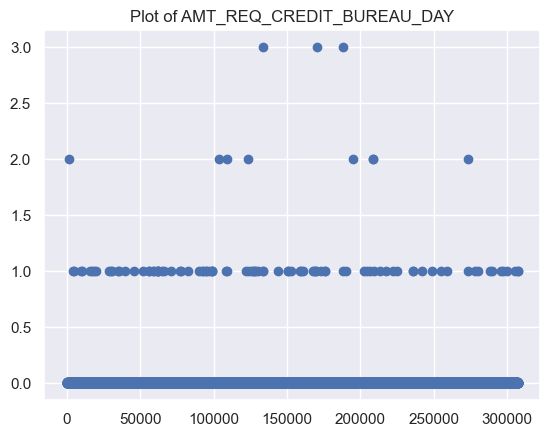

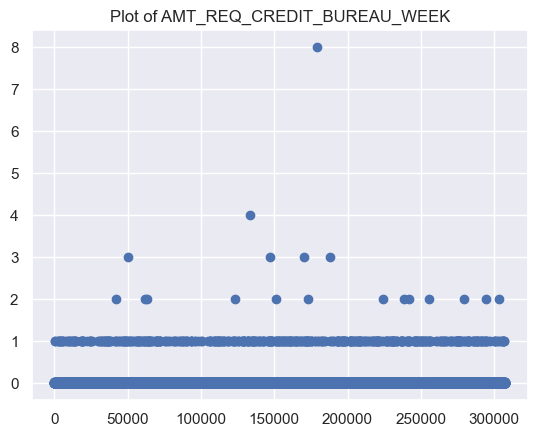

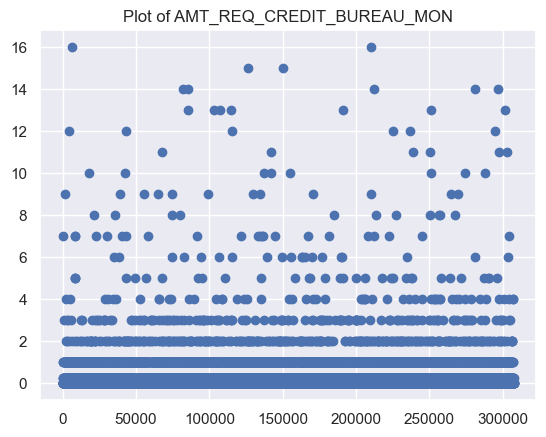

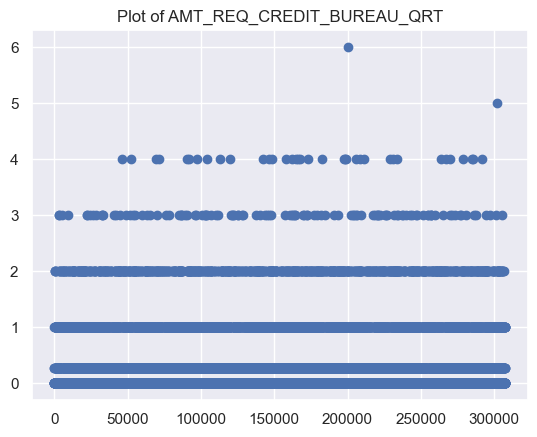

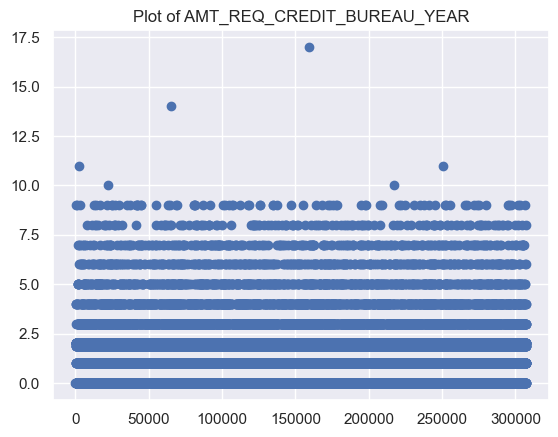

In [99]:
for column in train_categorical:
    title = "Plot of "+column
    plt.scatter(application_train.index, application_train[column])
    plt.title(title)
    plt.show()

Here most of the plots are not insightful we can see as they have either a clear bifurcation or doen't have a strong correlation

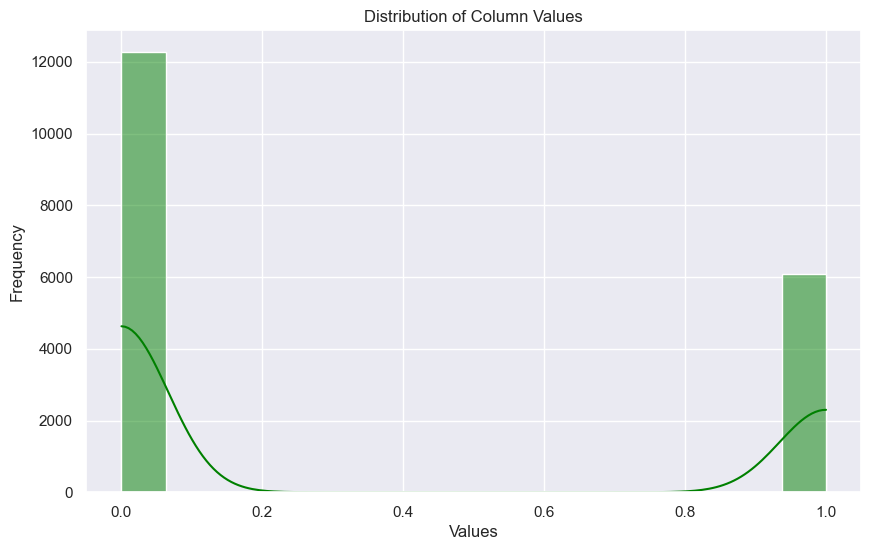

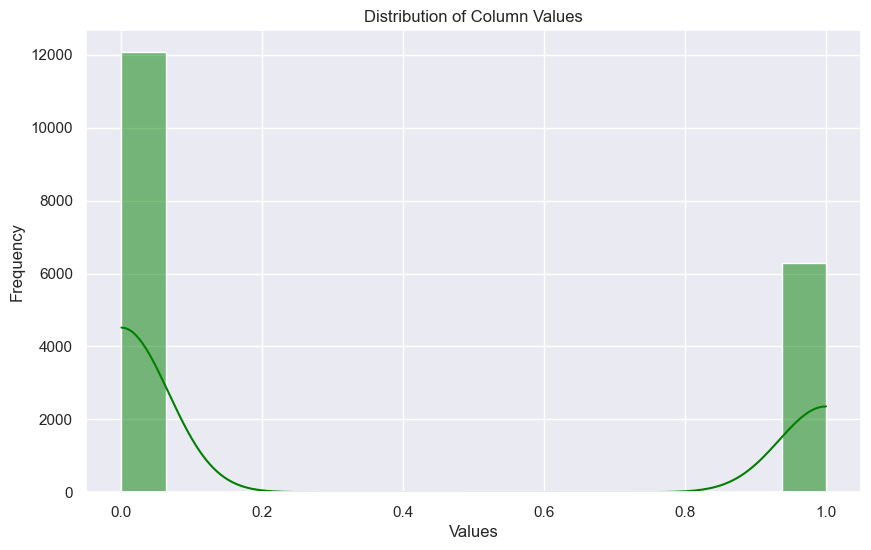

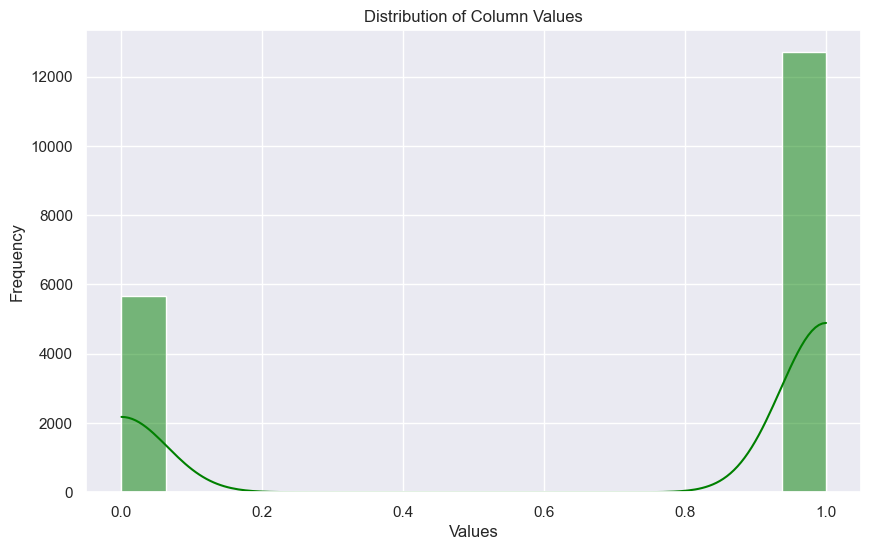

In [100]:
# Assuming train_0 is already loaded
#Creating a shallow copy so the original dataset remains intact
df0 = train_0.copy(deep=False)

# Map categorical values to numeric ones in separate columns
df0['CODE_GENDER_NUM'] = df0['CODE_GENDER'].map({'M': 1, 'F': 0})
df0['FLAG_OWN_CAR_NUM'] = df0['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df0['FLAG_OWN_REALTY_NUM'] = df0['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

l1 = ['CODE_GENDER_NUM','FLAG_OWN_CAR_NUM','FLAG_OWN_REALTY_NUM']
# Select only numeric columns for correlation calculation
numeric_df0 = df0.select_dtypes(include=[np.number])

#plottint he dist plots
def plotting(column_name):
   plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
   sns.histplot(df0[column_name], kde=True, color="green")  # Histogram with KDE
   plt.title('Distribution of Column Values')  # Add a title
   plt.xlabel('Values')  # Label for the x-axis
   plt.ylabel('Frequency')  # Label for the y-axis
   plt.show()  # Display the plot
    
for i in l1:
    plotting(i)

In the above plots also we can see we are having clear bifurcation hence , it is not meaningful

# Univariate Analysis for numerical data

For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot. 

Plot of SK_ID_CURR


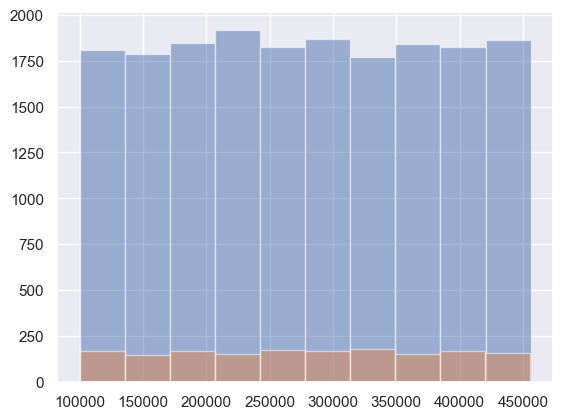

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

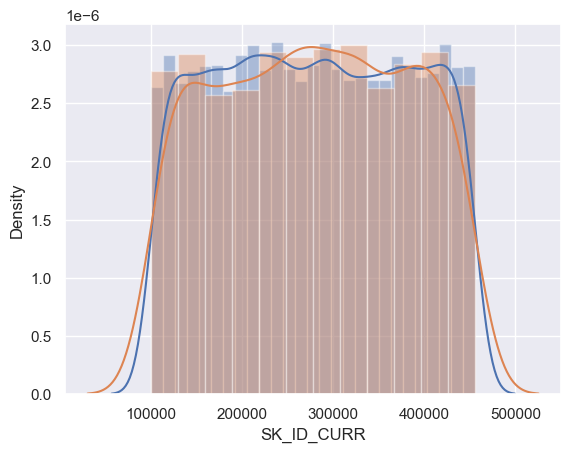

------------------------------------------------------------------------
Plot of TARGET


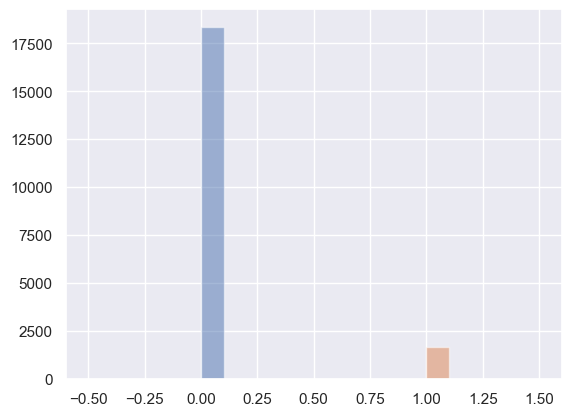

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

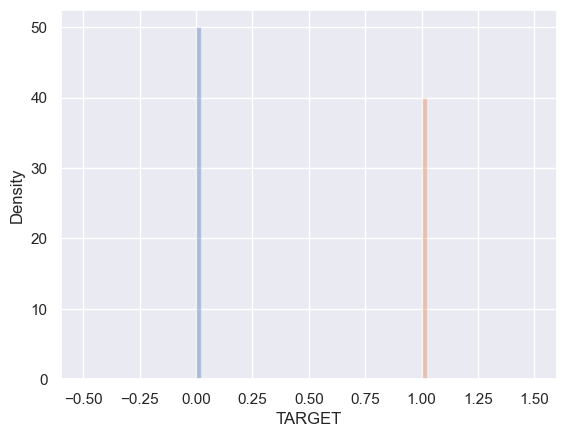

------------------------------------------------------------------------
Plot of CNT_CHILDREN


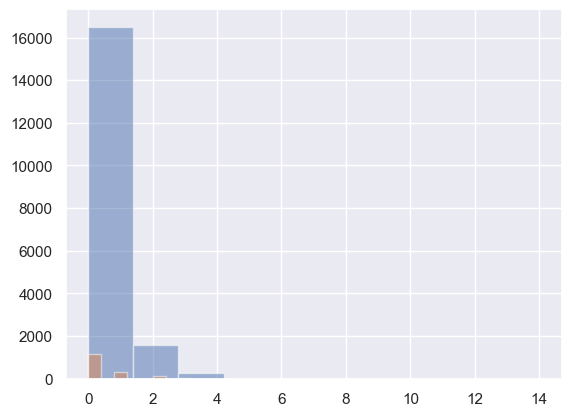

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

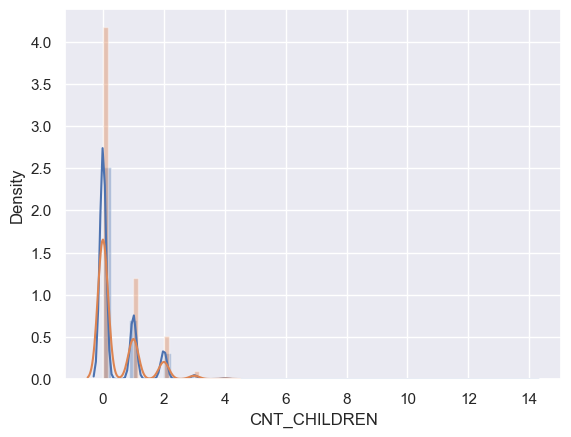

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


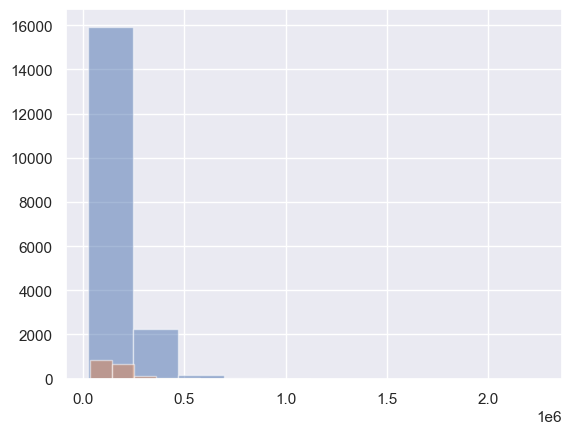

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

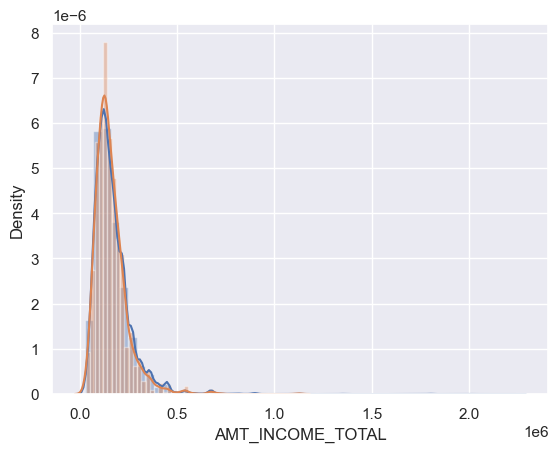

------------------------------------------------------------------------
Plot of AMT_CREDIT


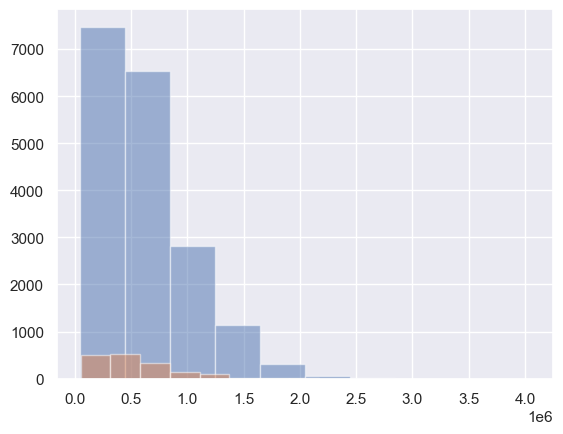

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

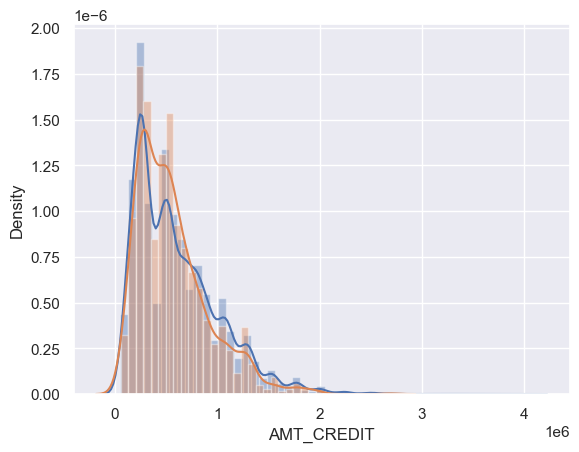

------------------------------------------------------------------------
Plot of AMT_ANNUITY


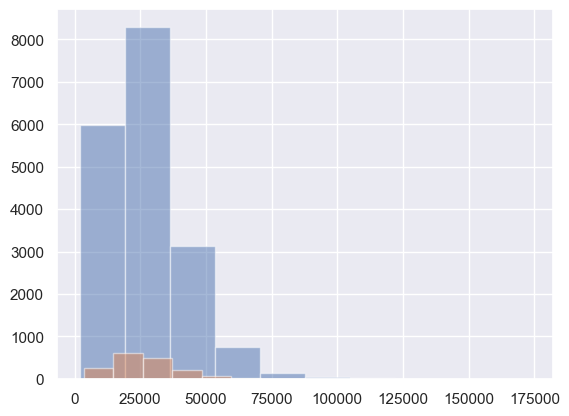

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

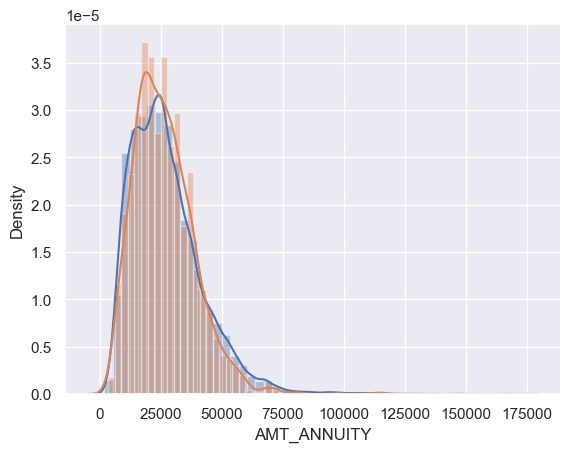

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


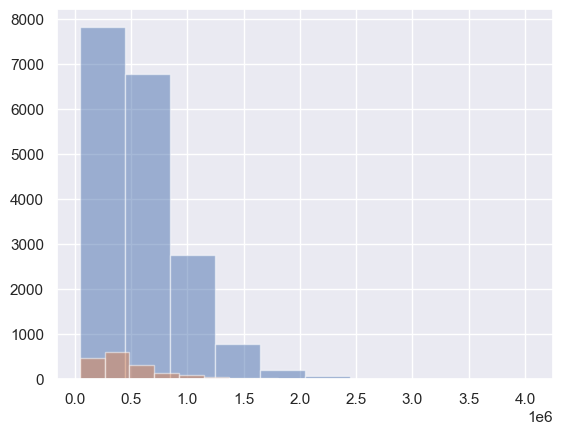

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

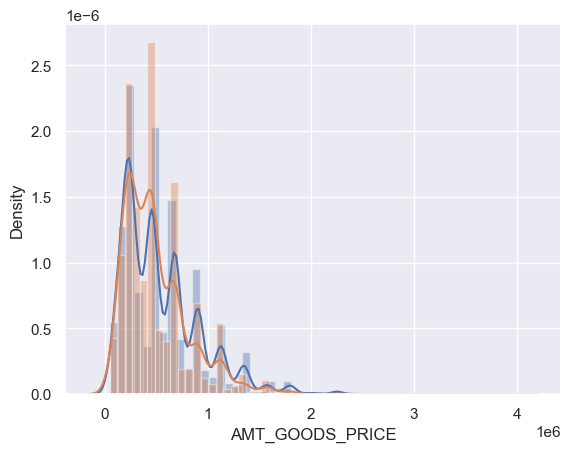

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


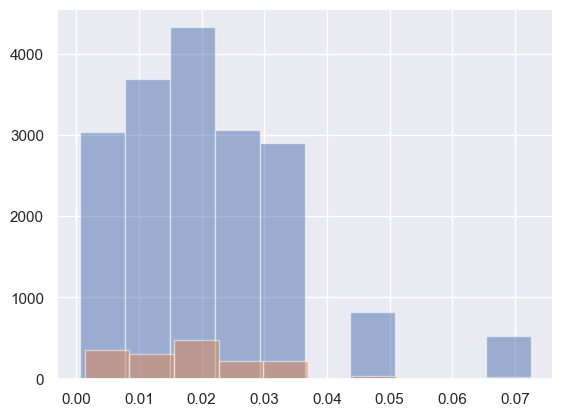

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

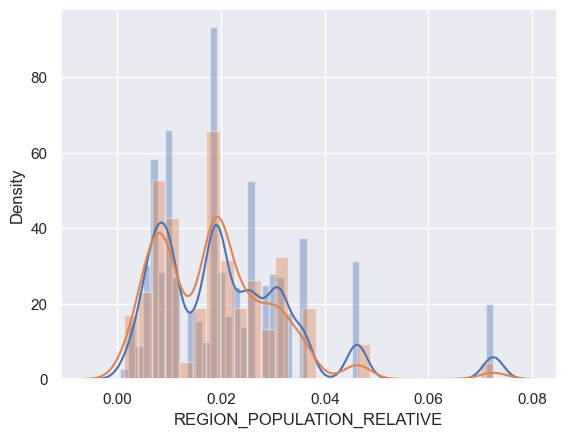

------------------------------------------------------------------------
Plot of DAYS_BIRTH


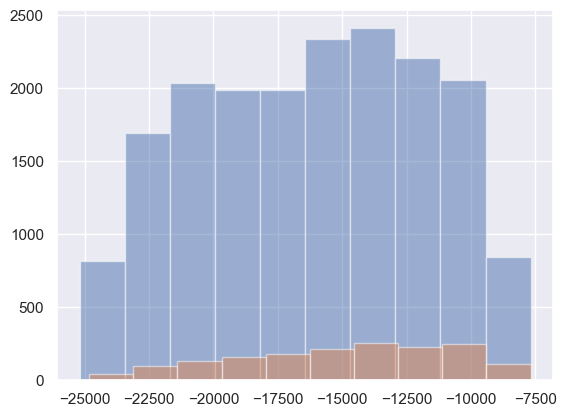

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

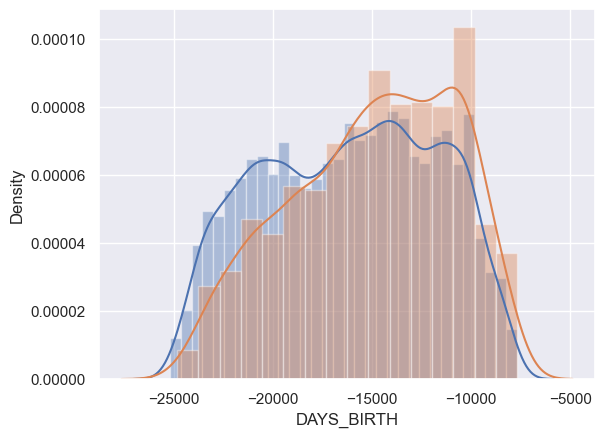

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


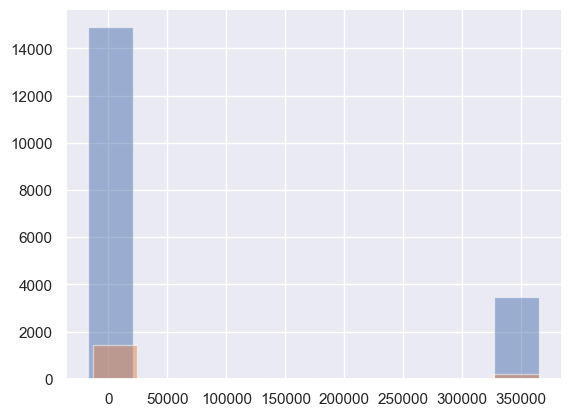

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

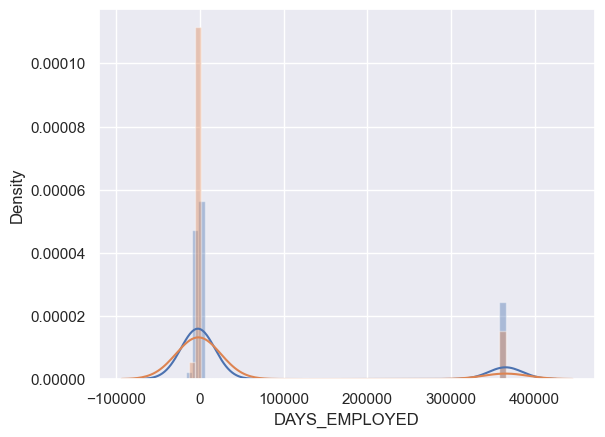

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


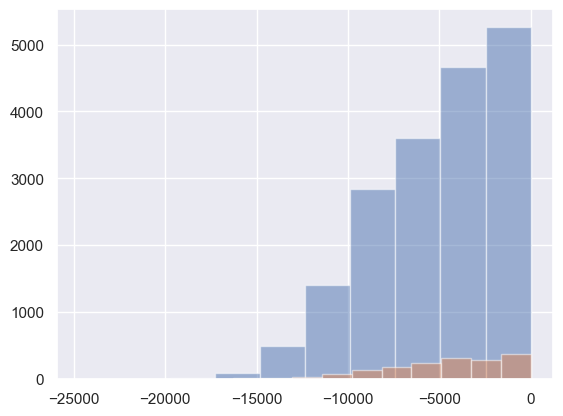

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

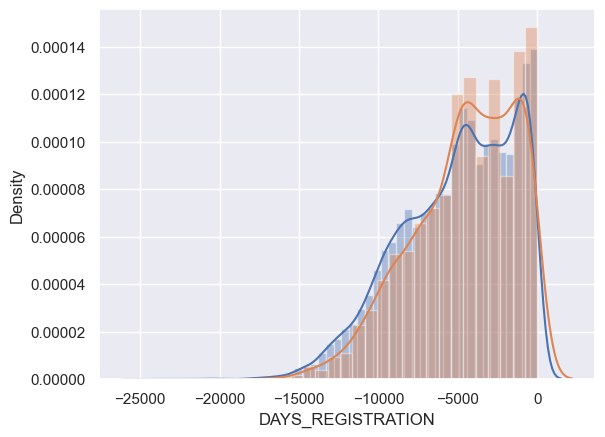

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


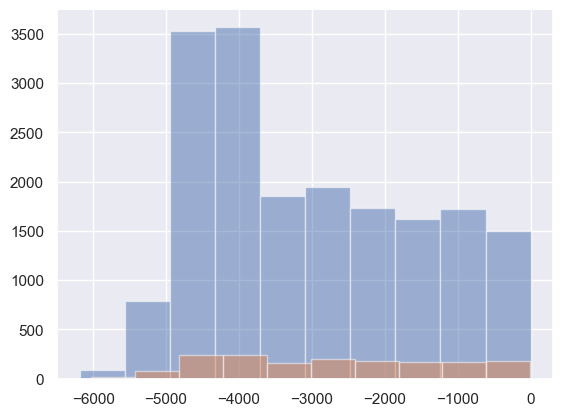

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

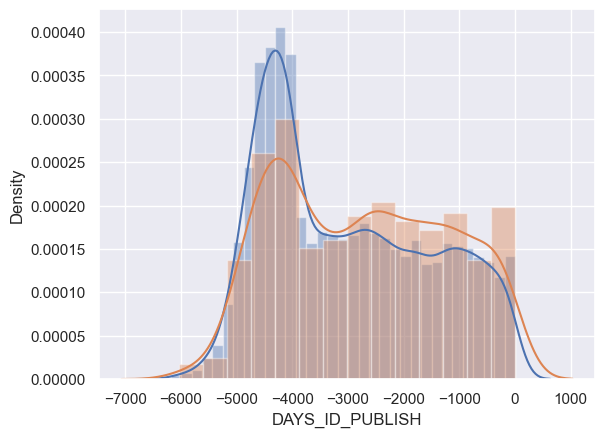

------------------------------------------------------------------------
Plot of FLAG_MOBIL


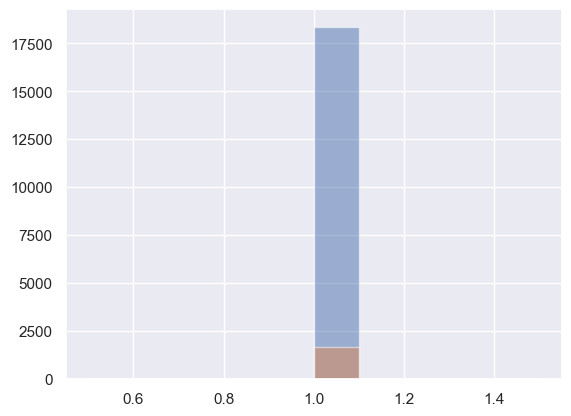

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

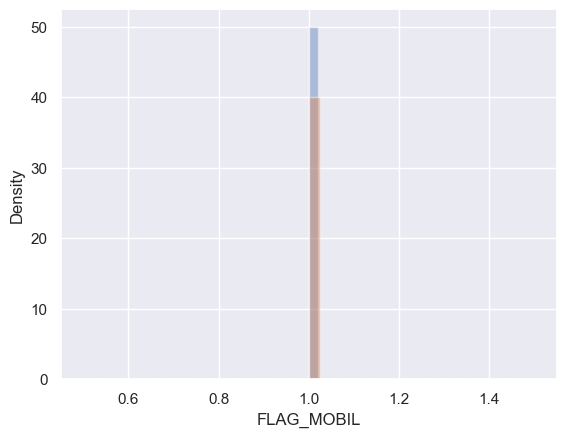

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


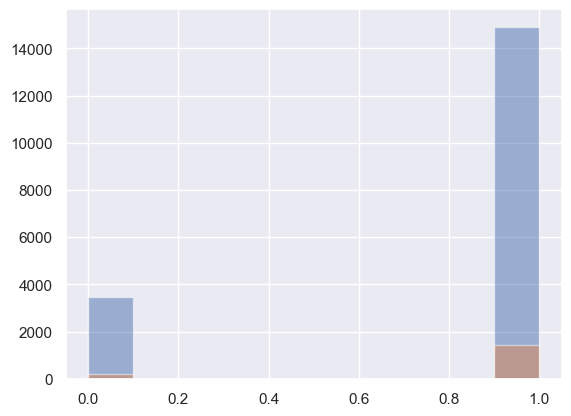

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

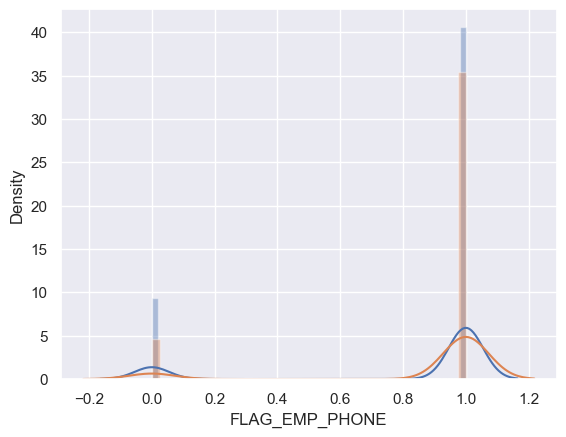

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


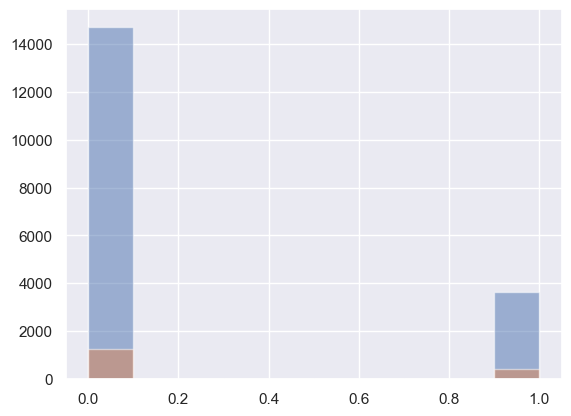

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

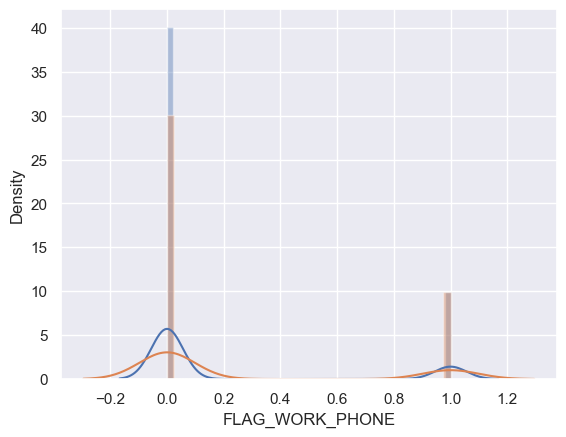

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


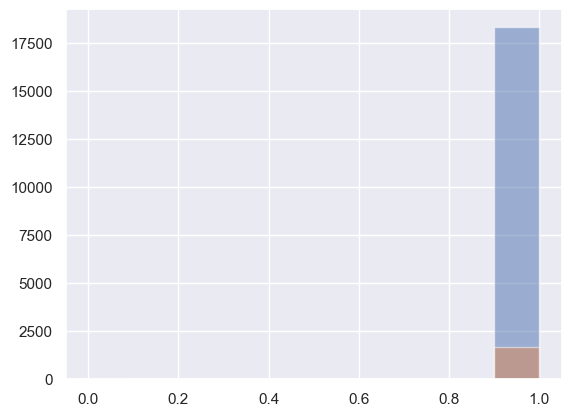

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

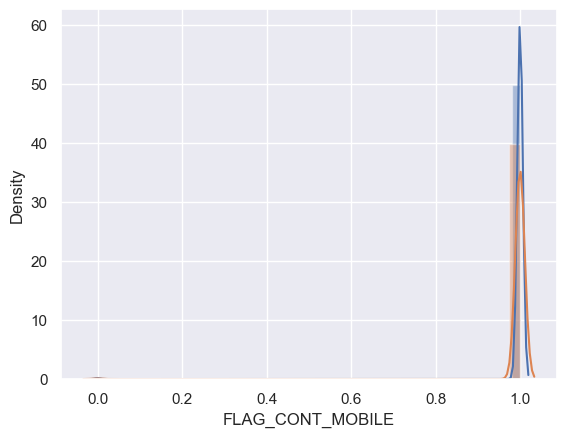

------------------------------------------------------------------------
Plot of FLAG_PHONE


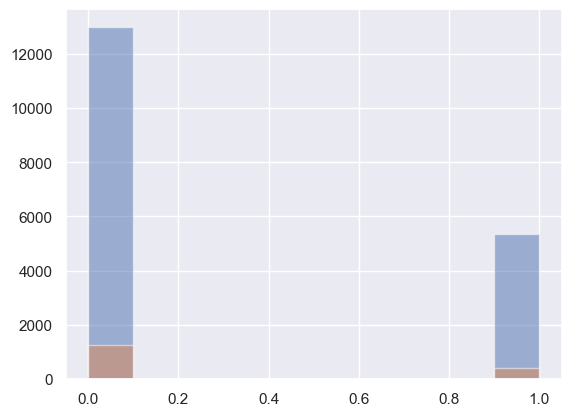

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

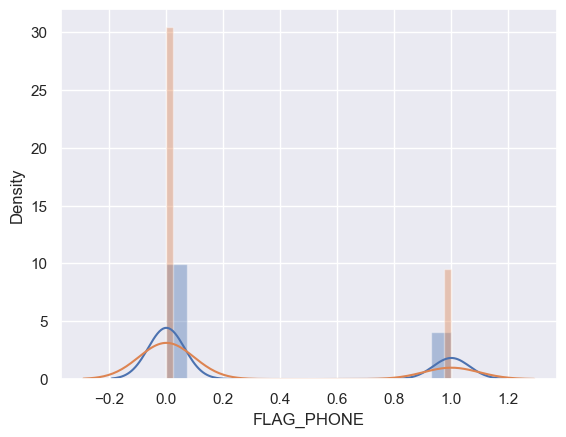

------------------------------------------------------------------------
Plot of FLAG_EMAIL


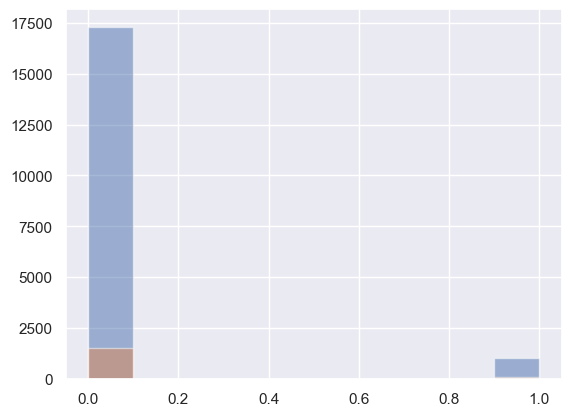

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

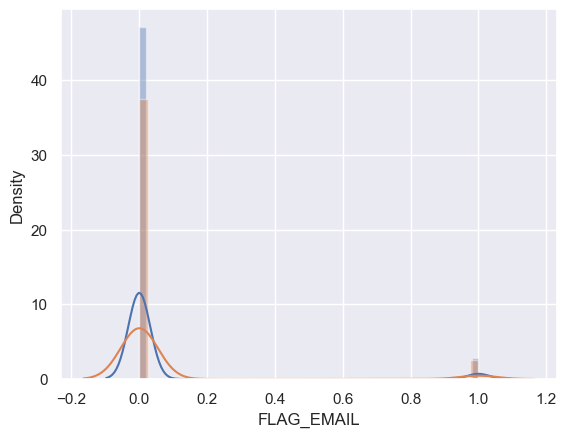

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


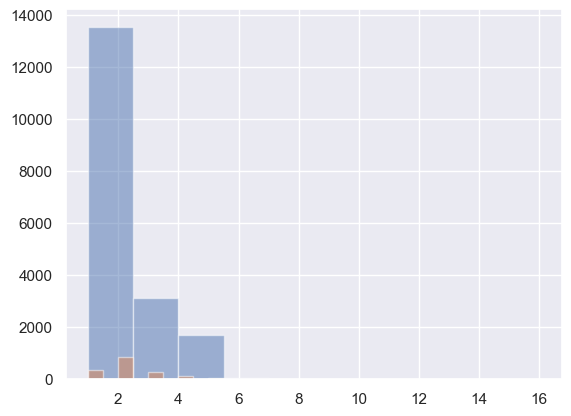

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

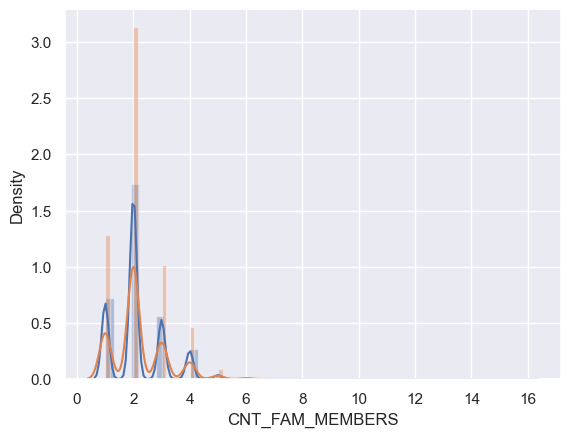

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


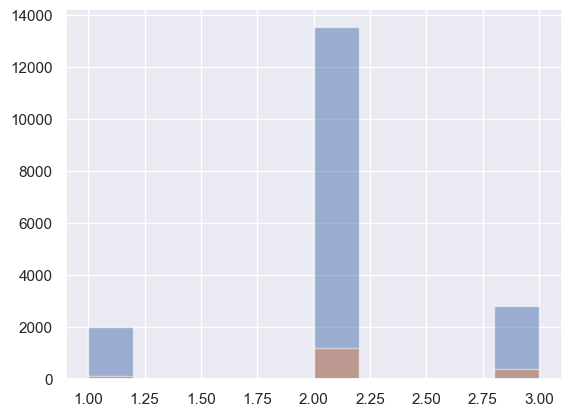

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

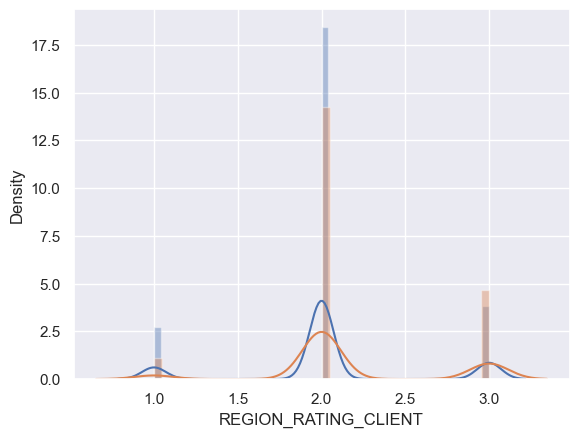

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


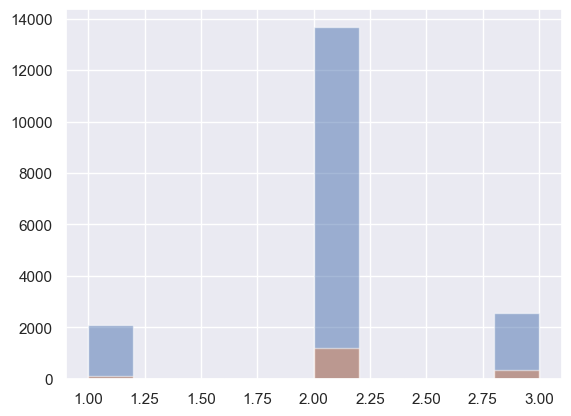

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

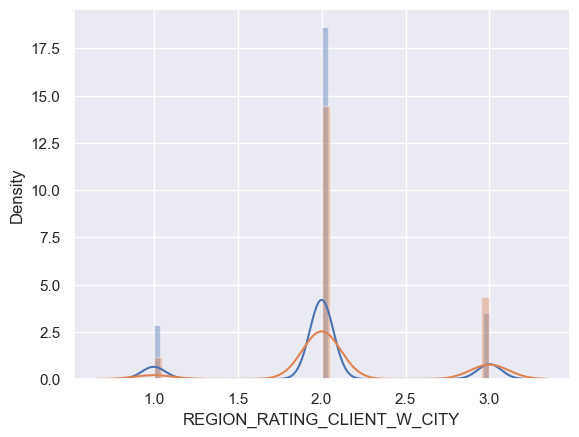

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


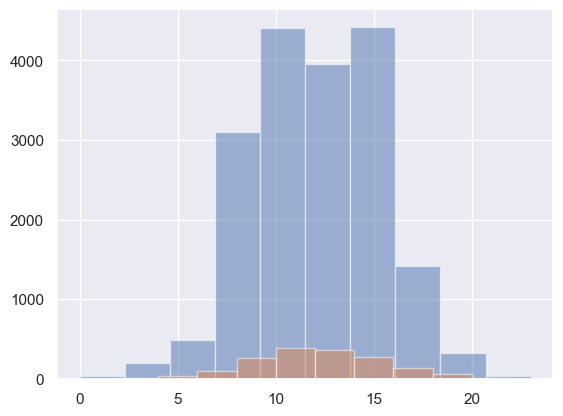

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

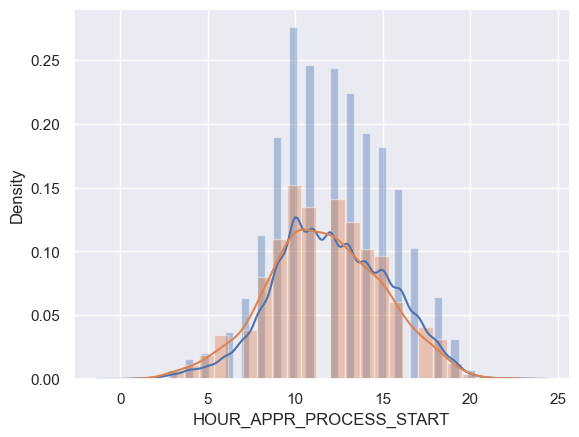

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


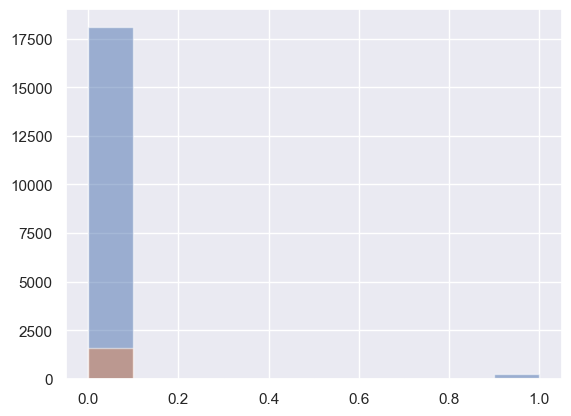

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

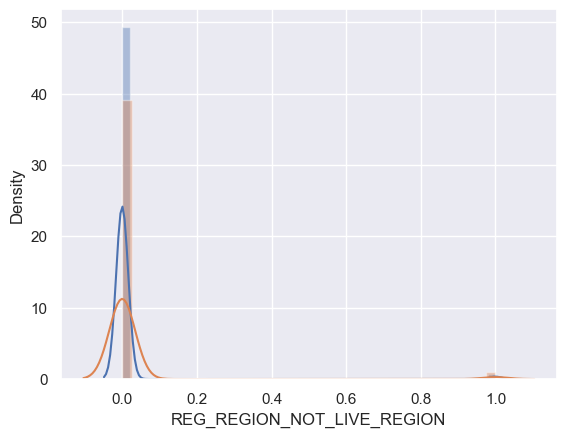

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


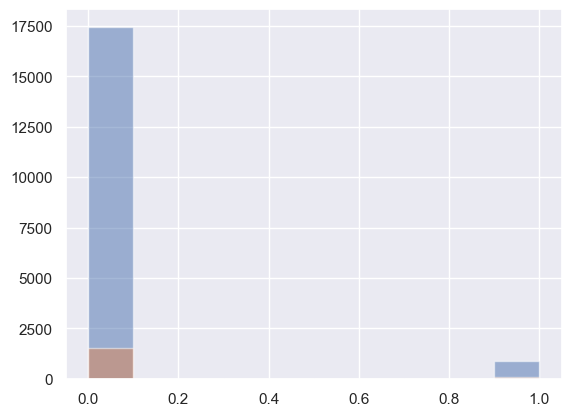

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

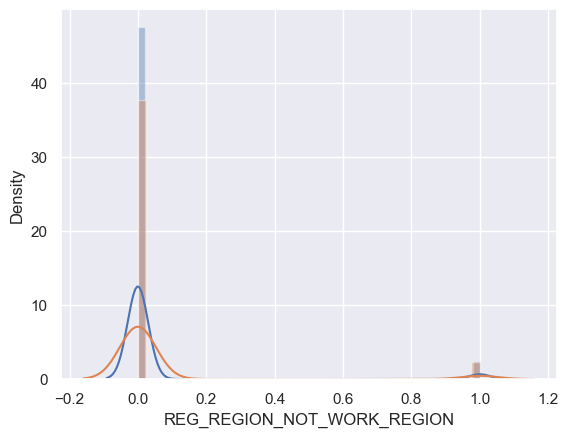

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


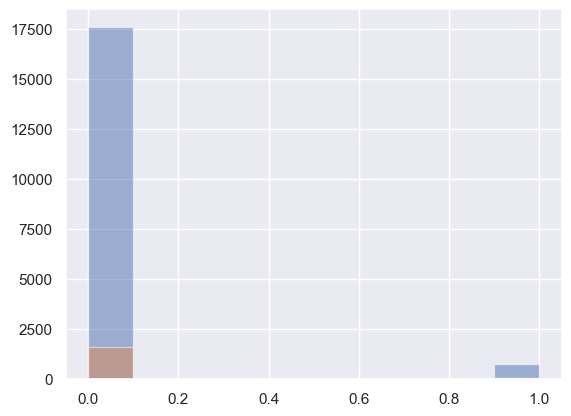

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

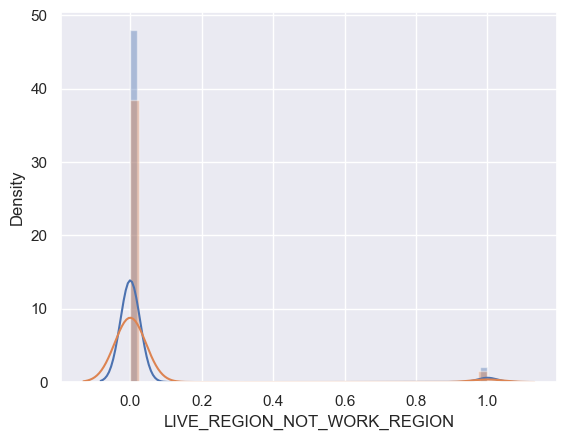

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


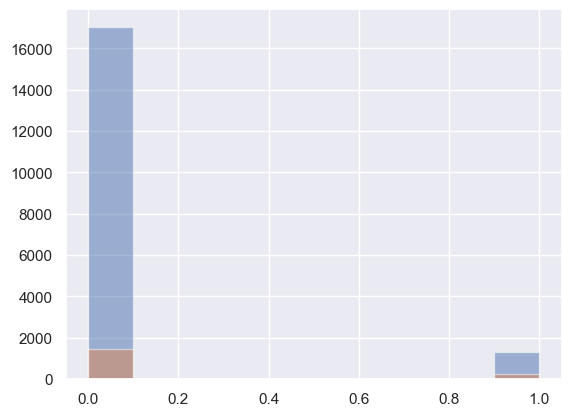

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

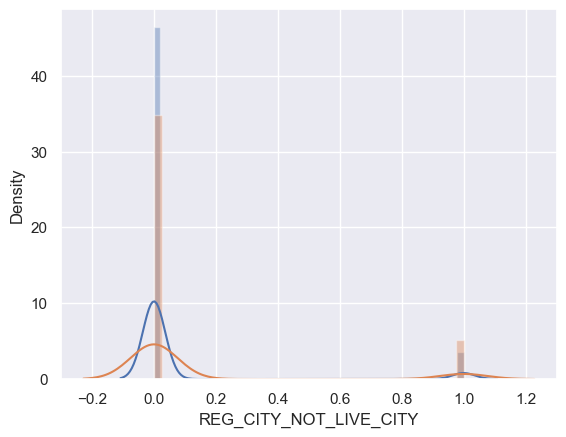

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


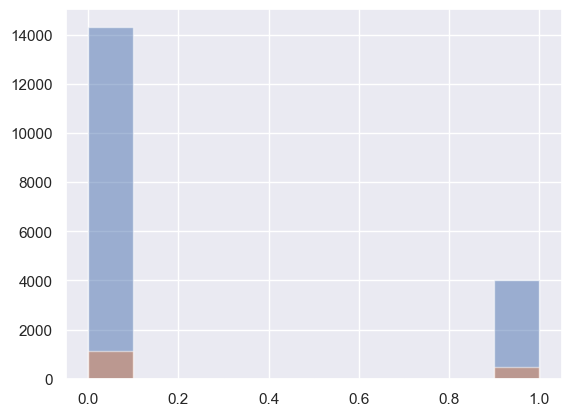

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

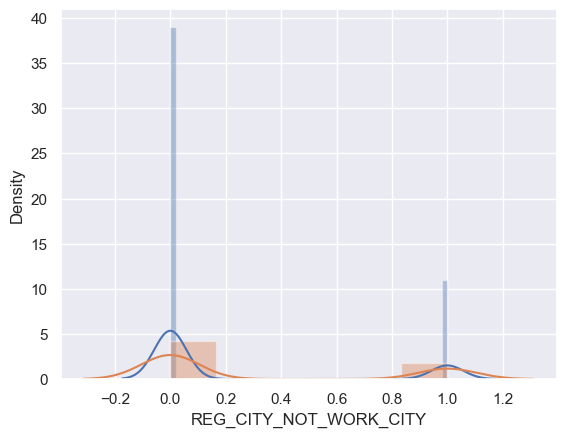

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


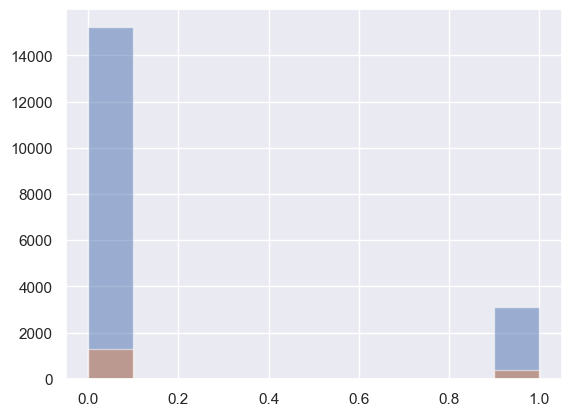

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

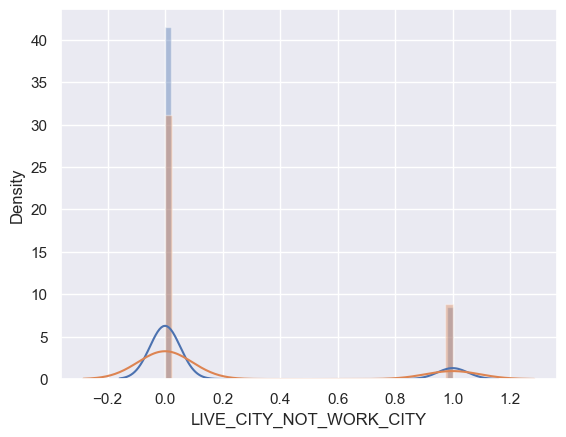

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


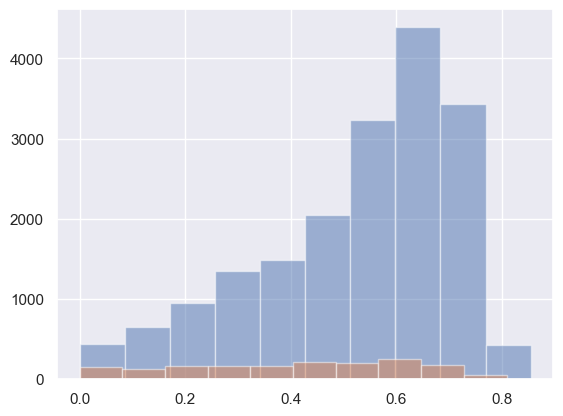

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

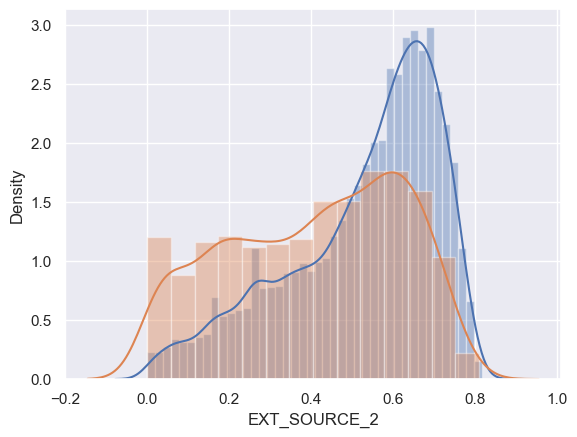

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


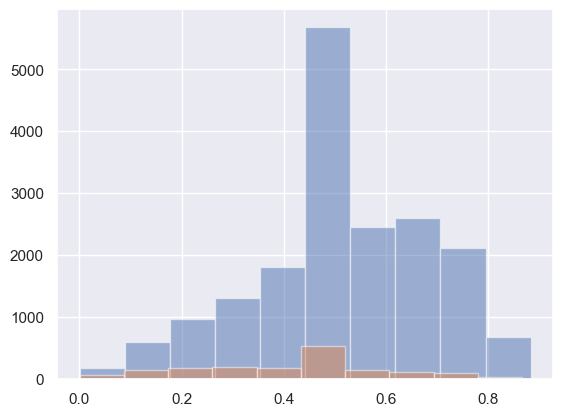

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

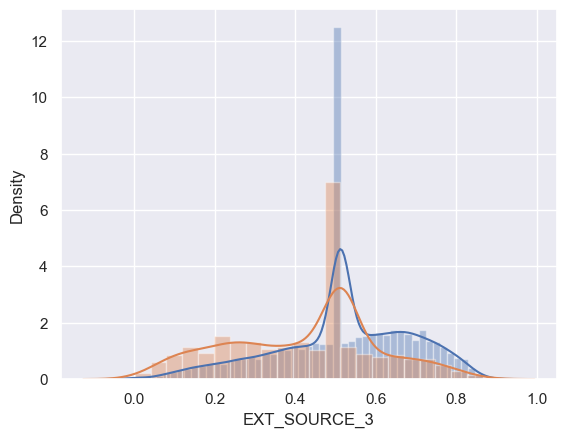

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


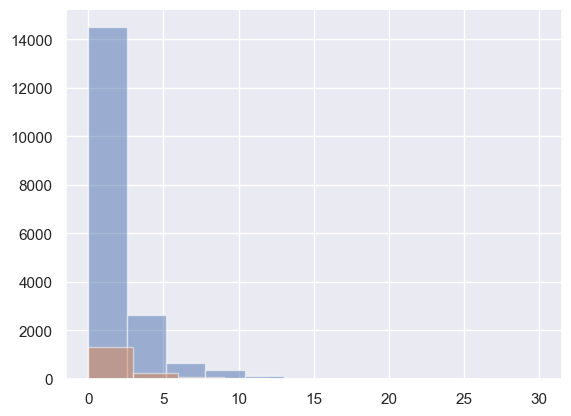

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

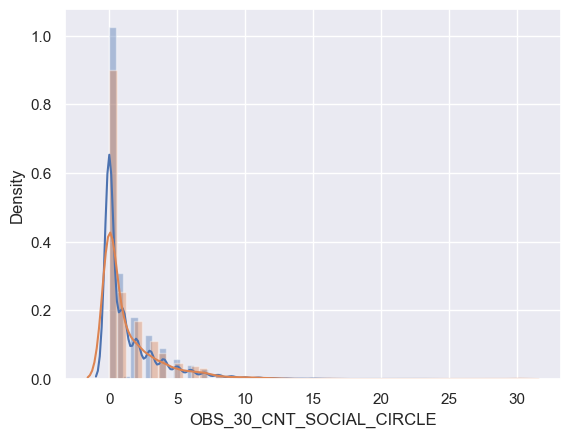

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


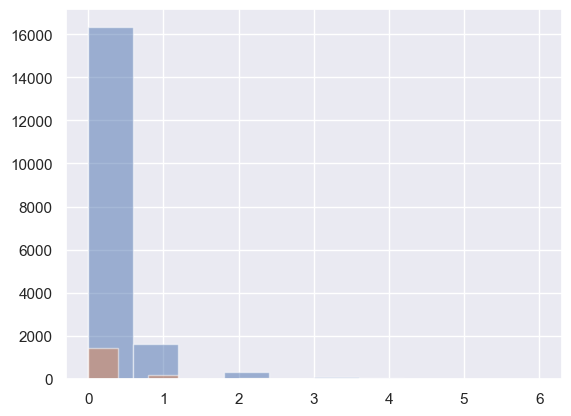

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

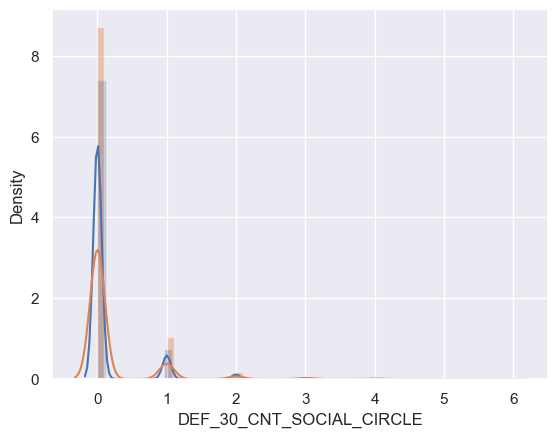

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


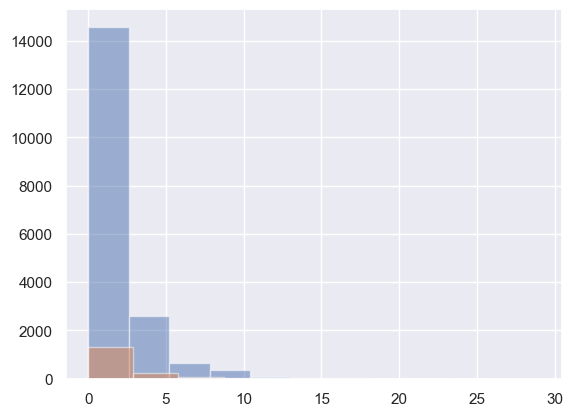

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

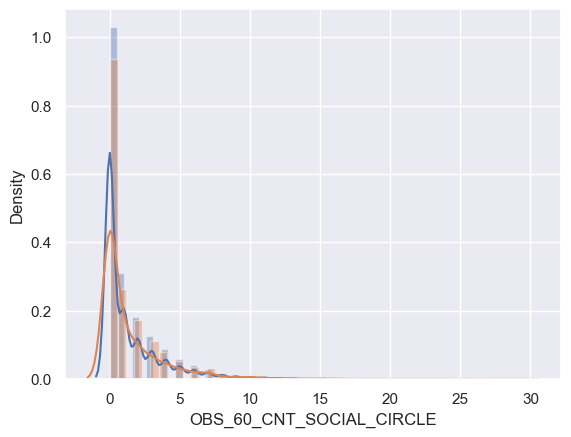

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


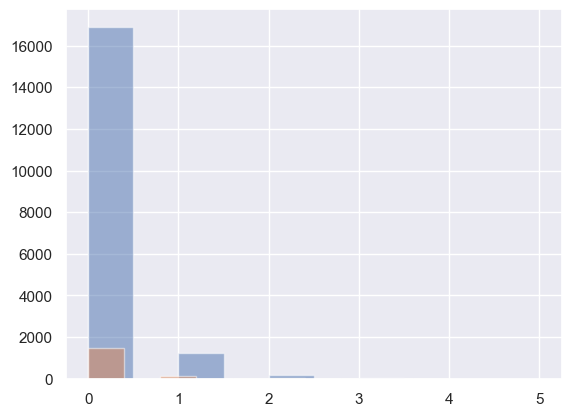

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

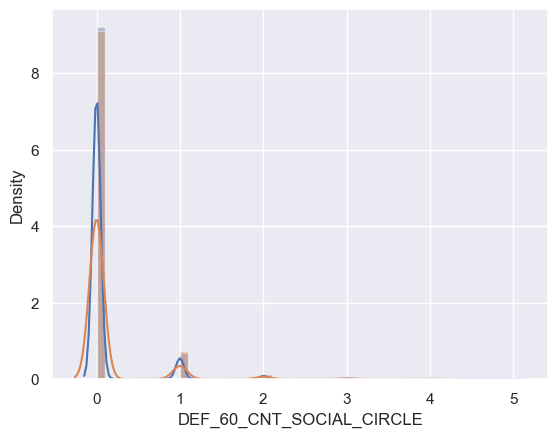

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


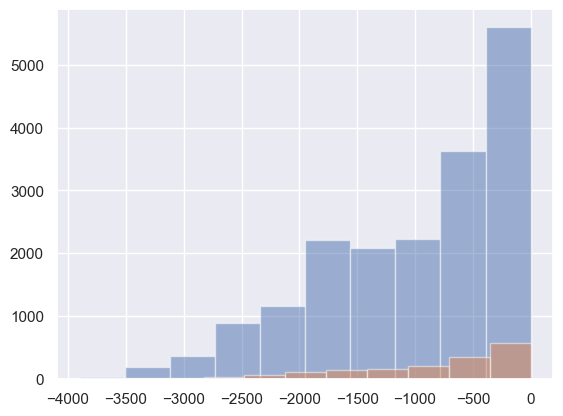

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

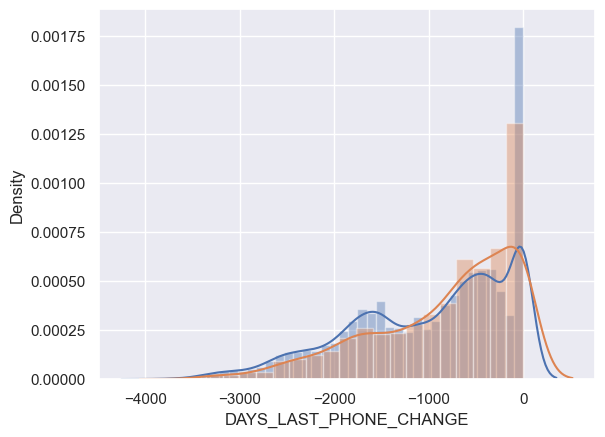

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


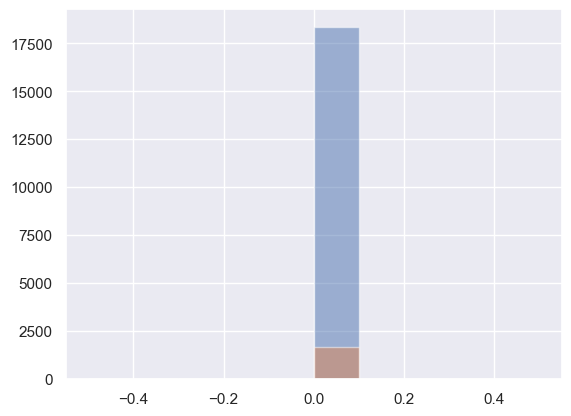

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

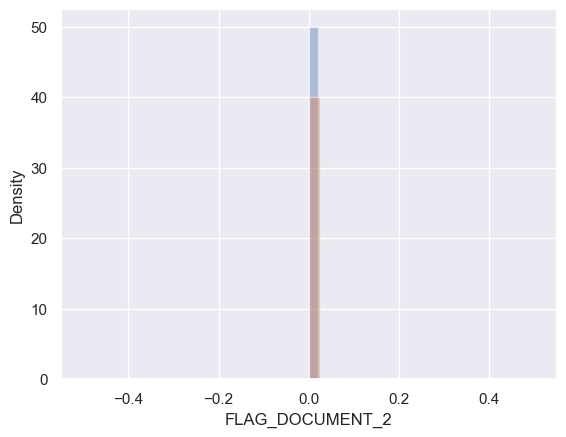

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


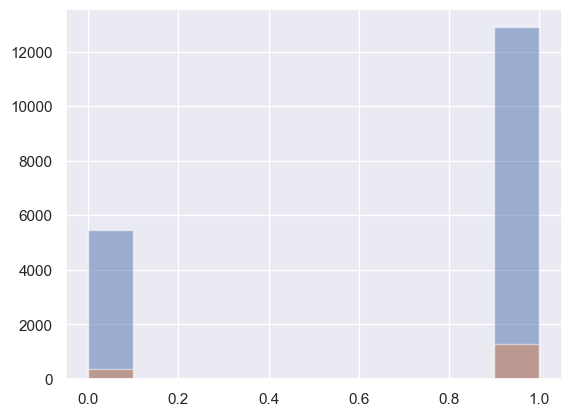

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

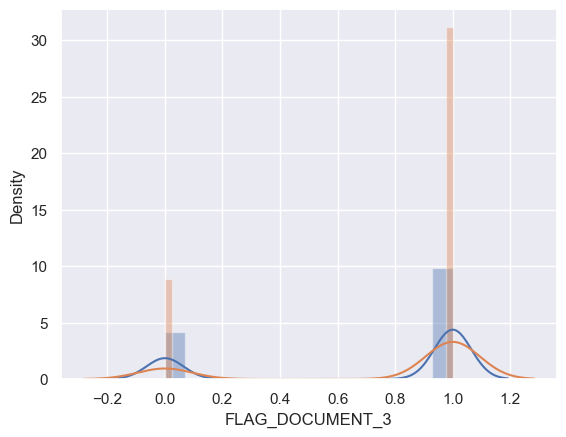

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


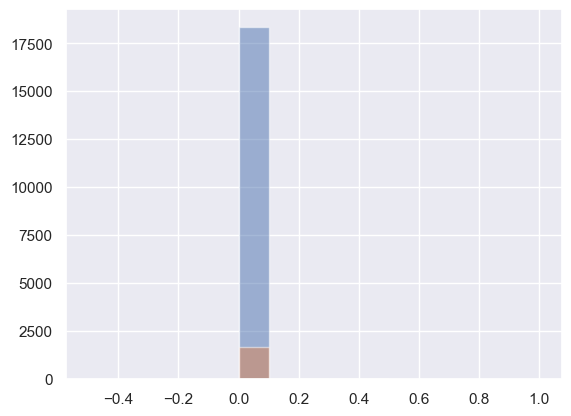

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

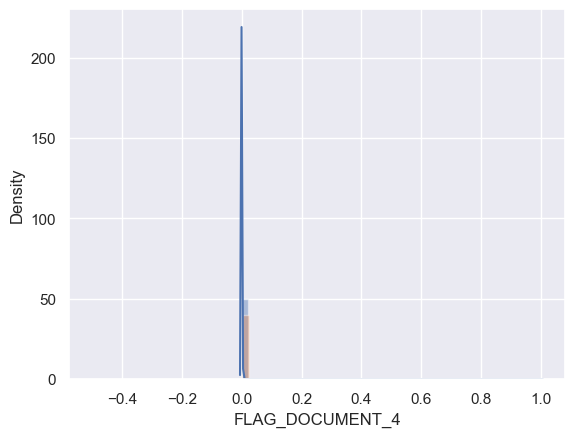

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


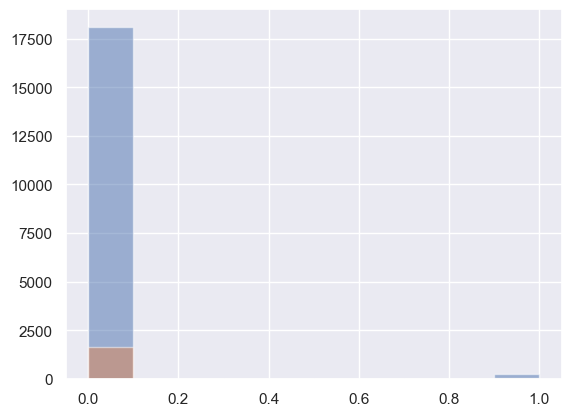

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

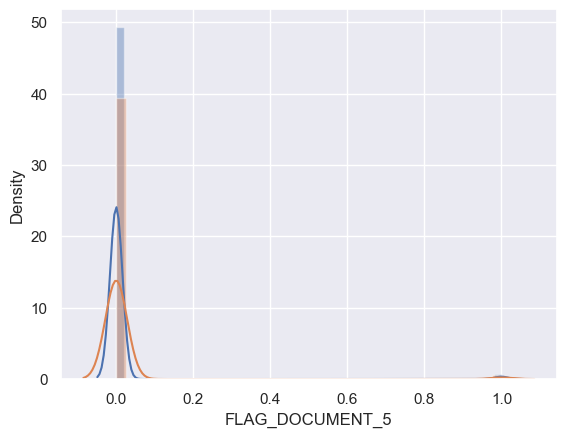

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


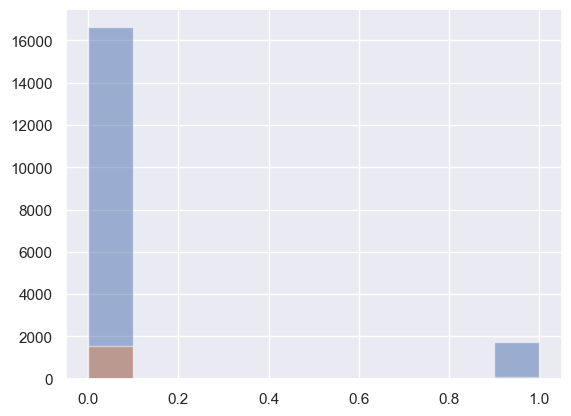

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

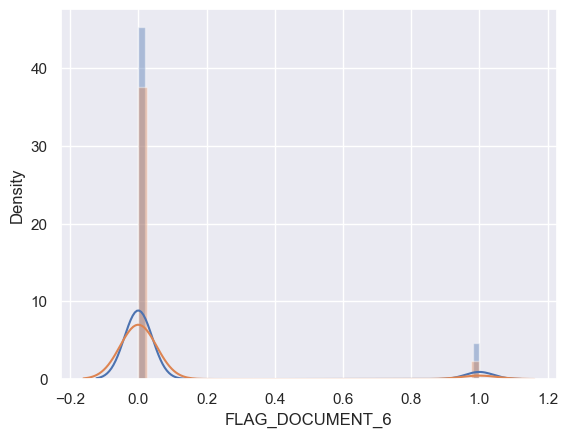

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


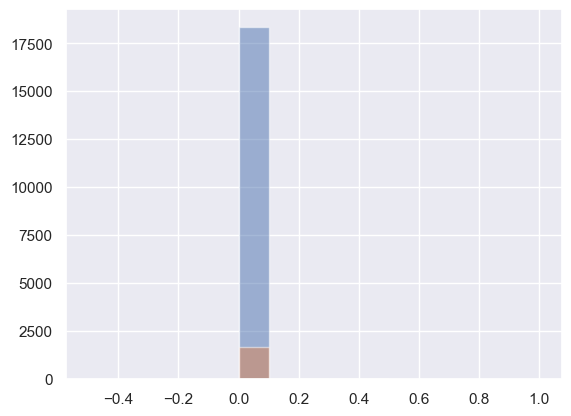

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

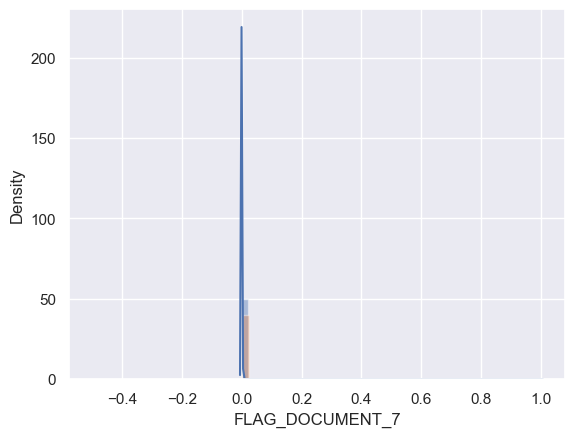

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


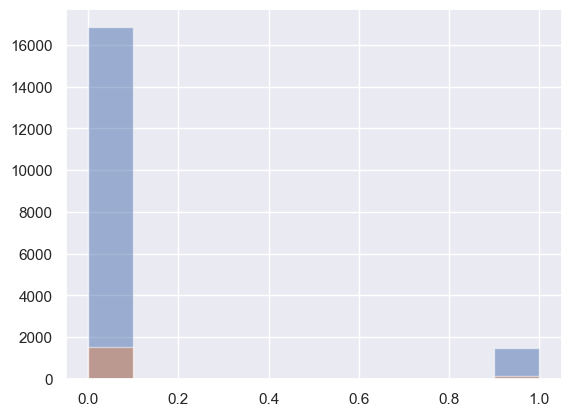

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

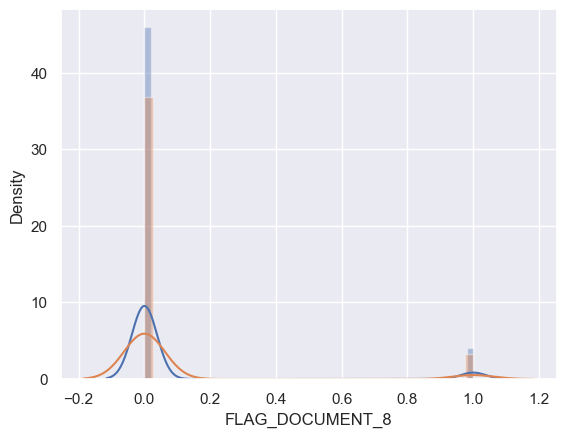

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


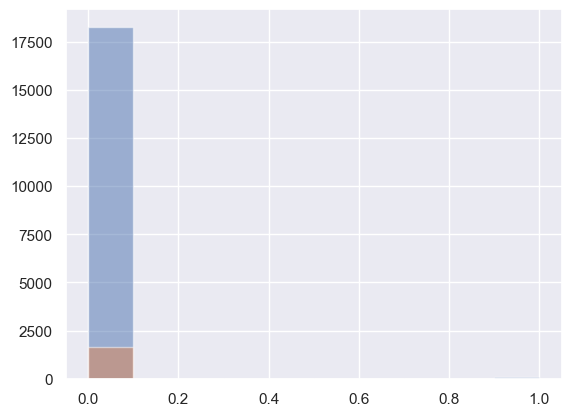

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

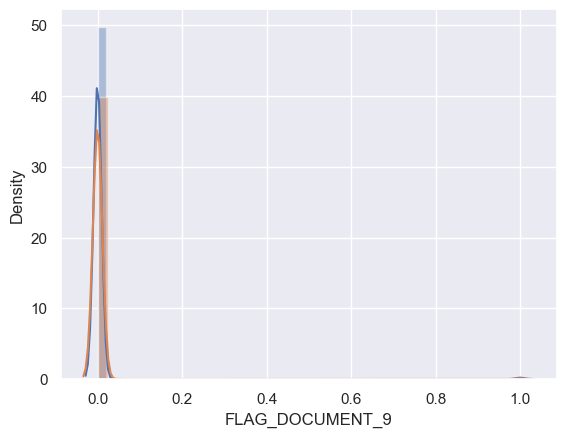

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


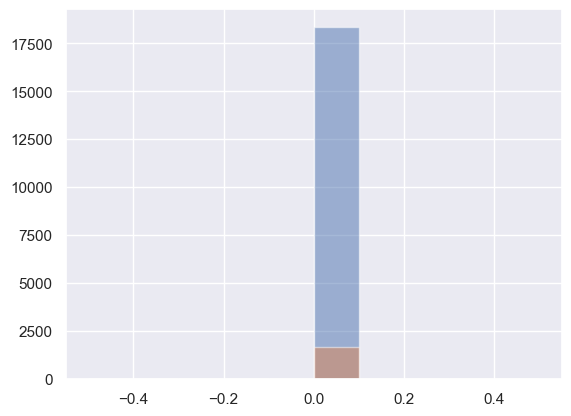

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

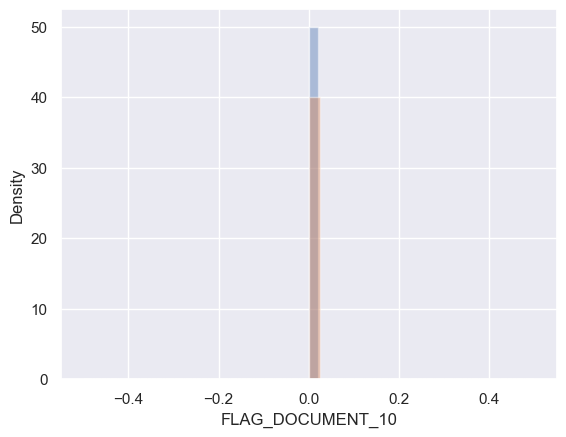

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


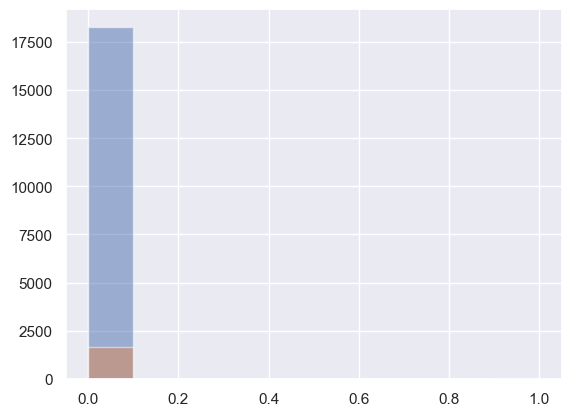

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

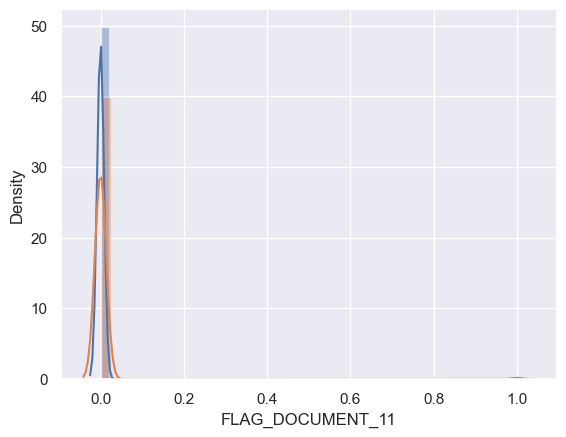

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


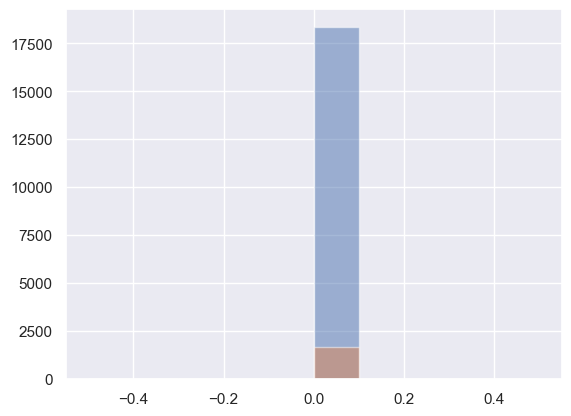

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

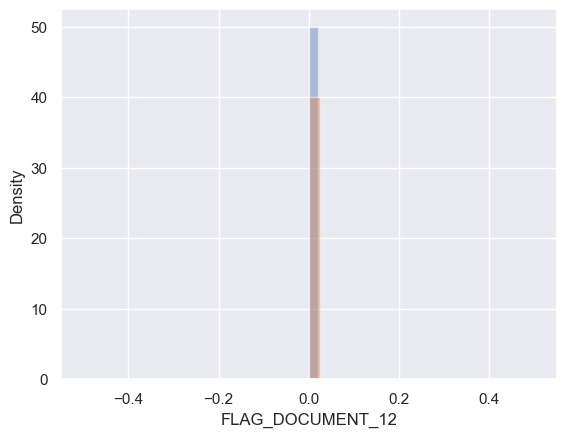

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


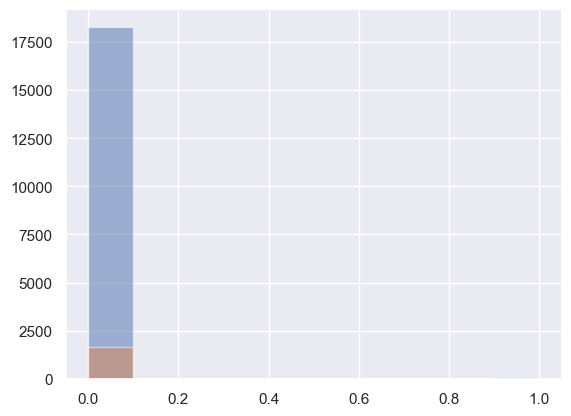

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

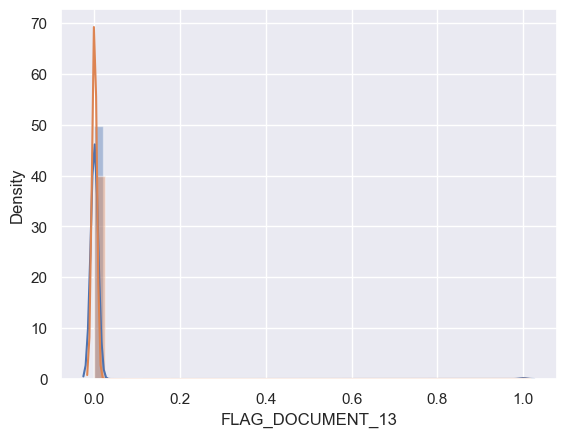

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


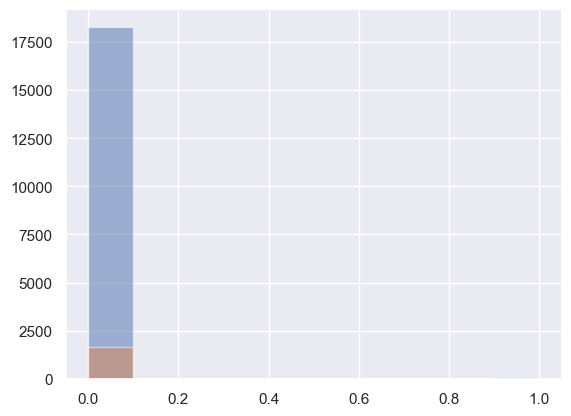

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

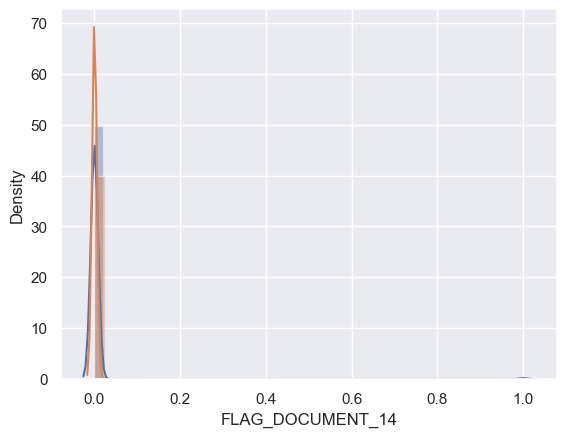

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


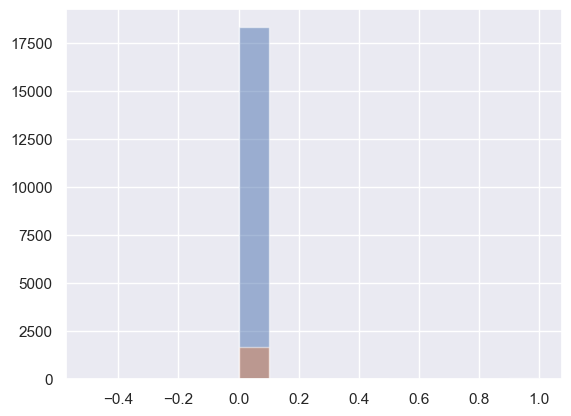

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

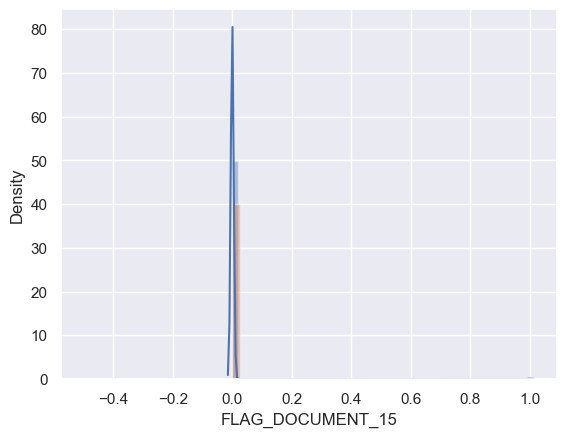

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


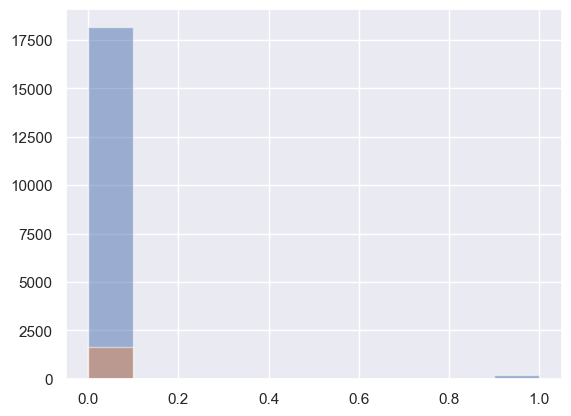

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

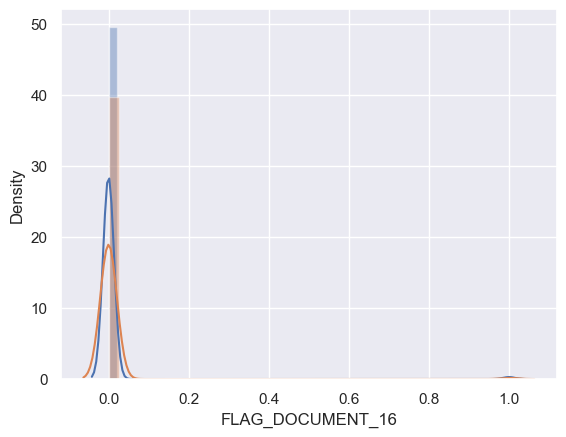

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


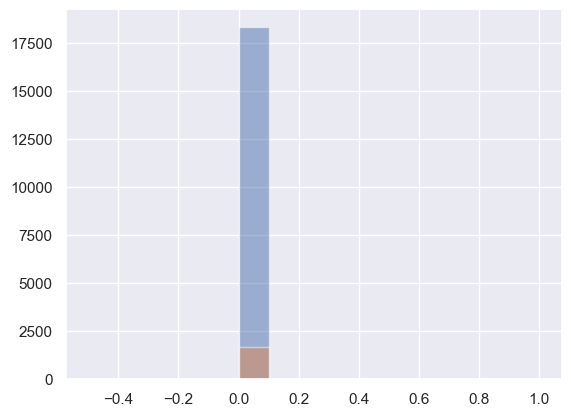

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

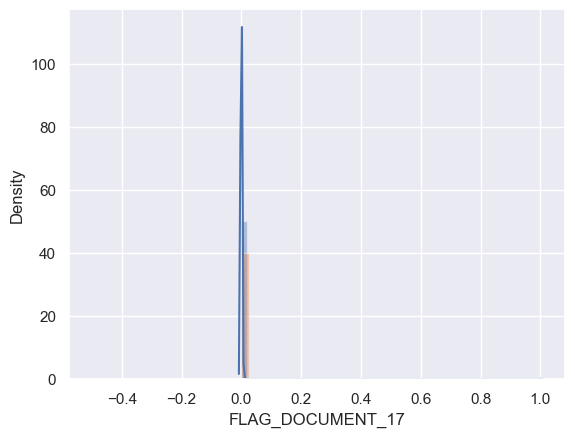

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


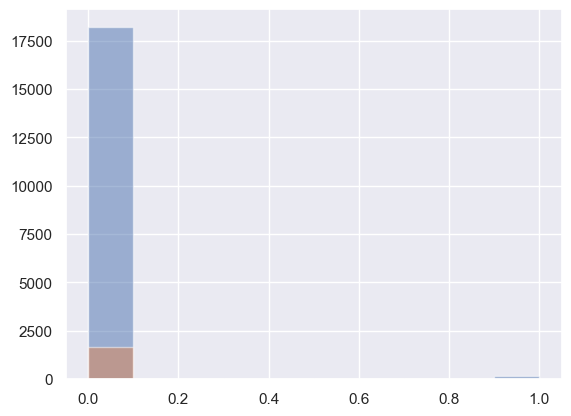

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

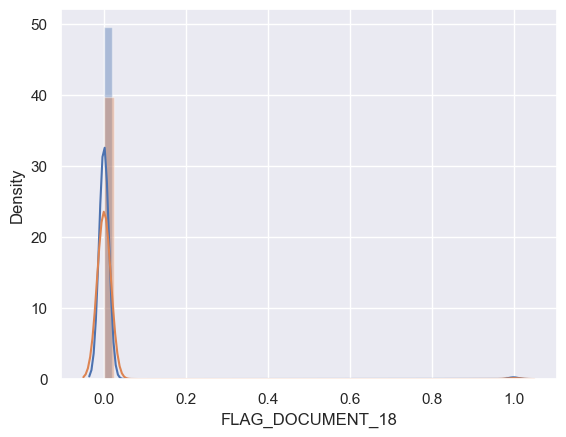

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


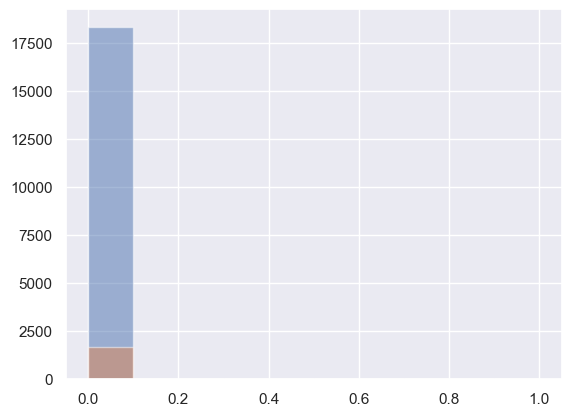

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

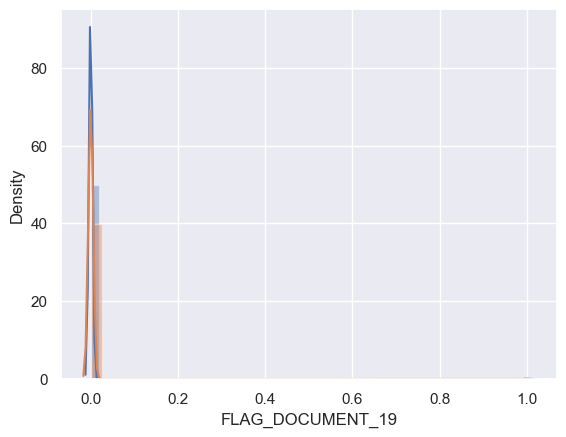

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


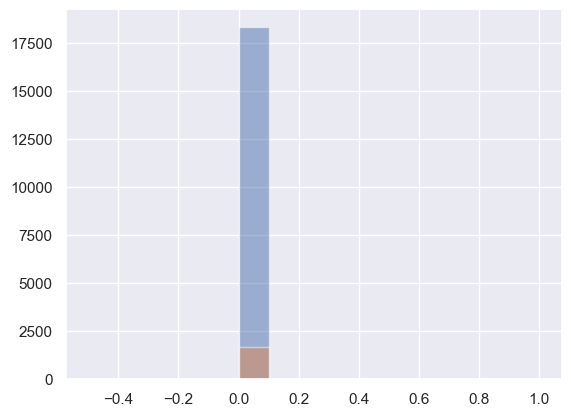

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

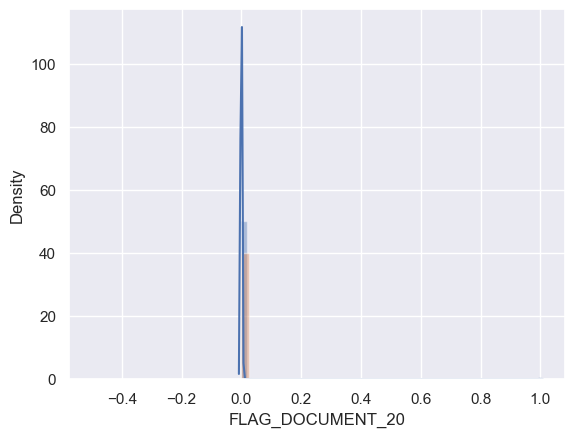

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


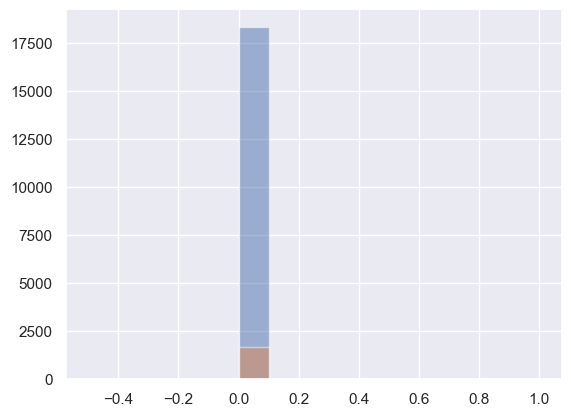

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

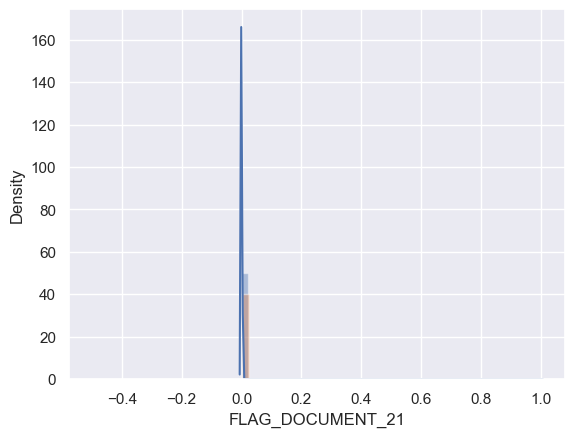

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


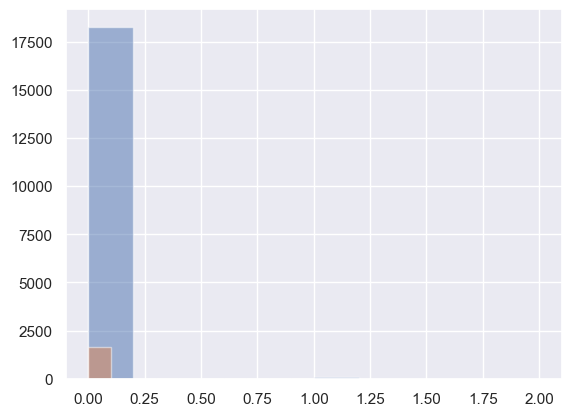

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

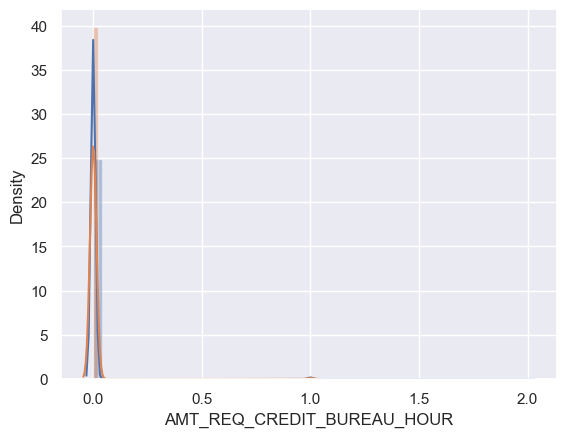

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


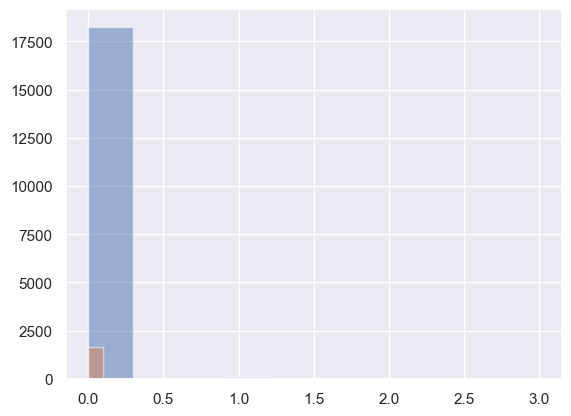

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

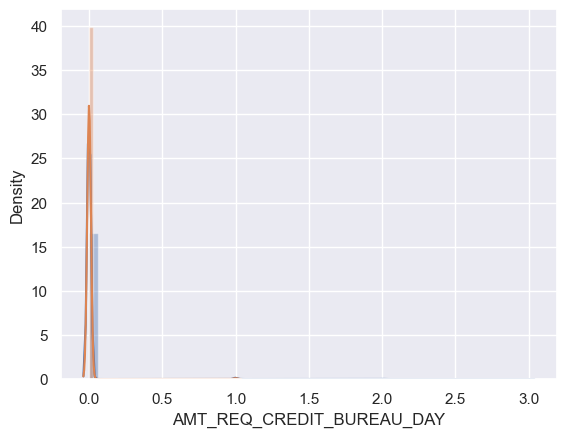

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


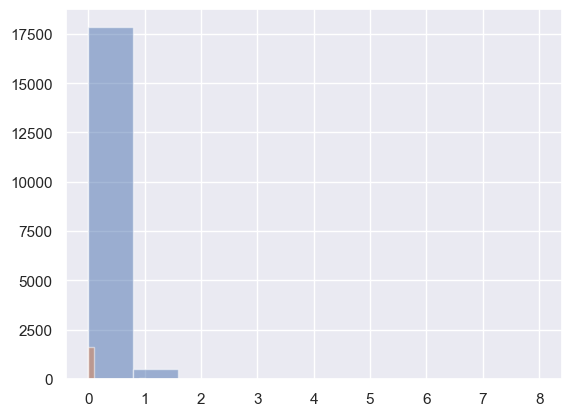

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

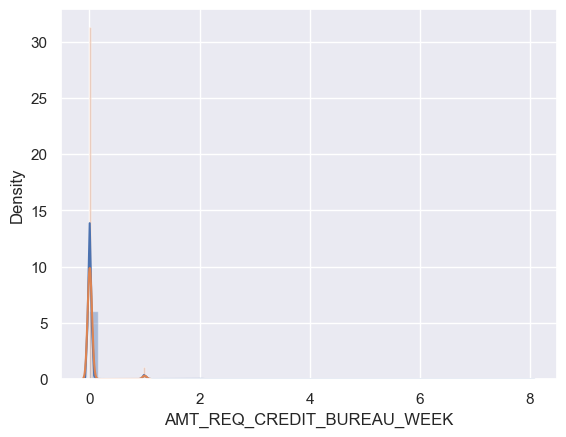

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


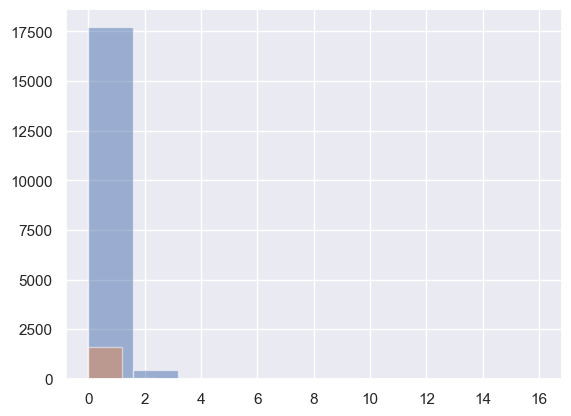

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

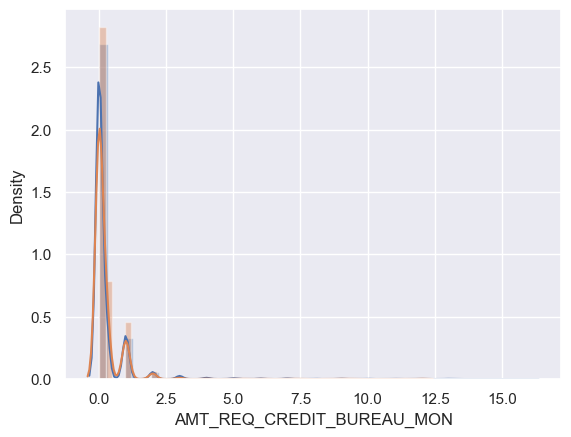

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


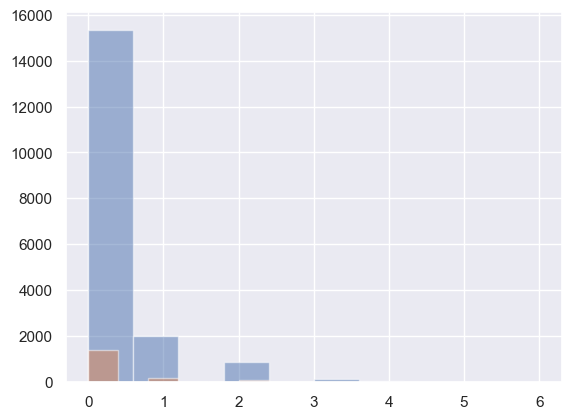

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

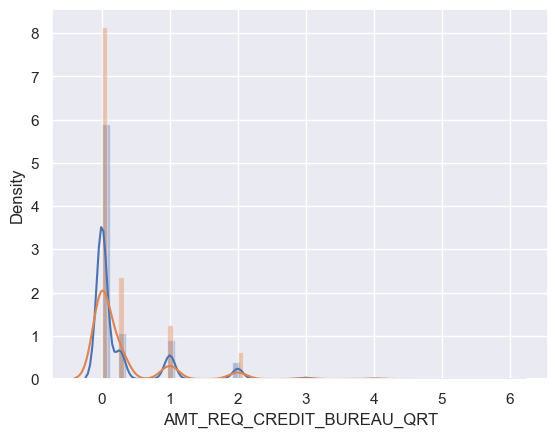

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


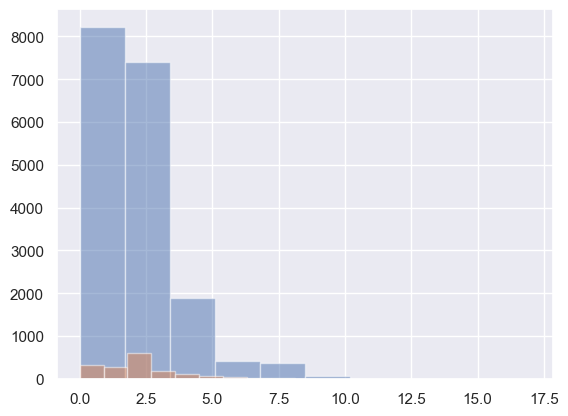

C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column].dropna(), label='0')
C:\Users\dassa\AppData\Local\Temp\ipykernel_16312\3600089192.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column].dropna(),  label=

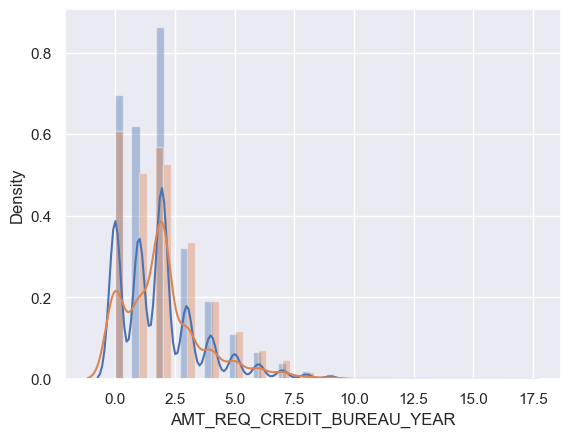

------------------------------------------------------------------------


In [101]:
for column in train_categorical:
    title = "Plot of "+column
    print(title)
    plt.hist(train_0[column], alpha=0.5, label='0')
    plt.hist(train_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(train_0[column].dropna(), label='0')
    sns.distplot(train_1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

## Reading previous application

In [102]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans  1730.430000     17145.000000   
1     2802425      108129         Cash loans 25188.615000    607500.000000   
2     2523466      122040         Cash loans 15060.735000    112500.000000   
3     2819243      176158         Cash loans 47041.335000    450000.000000   
4     1784265      202054         Cash loans 31924.395000    337500.000000   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.000000          0.000000     17145.000000                   SATURDAY   
1 679671.000000               NaN    607500.000000                   THURSDAY   
2 136444.500000               NaN    112500.000000                    TUESDAY   
3 470790.000000               NaN    450000.000000                     MONDAY   
4 404055.000000               NaN    337500.000000                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity    12.000000   
1                       11  ...                  XNA    36.000000   
2                       11  ...                  XNA    12.000000   
3                        7  ...                  XNA    12.000000   
4                        9  ...                  XNA    24.000000   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest       365243.000000   
1        low_action          Cash X-Sell: low       365243.000000   
2              high         Cash X-Sell: high       365243.000000   
3            middle       Cash X-Sell: middle       365243.000000   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0     -42.000000                300.000000     -42.000000       -37.000000   
1    -134.000000                916.000000  365243.000000    365243.000000   
2    -271.000000                 59.000000  365243.000000    365243.000000   
3    -482.000000               -152.000000    -182.000000      -177.000000   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                  0.000000  
1                  1.000000  
2                  1.000000  
3                  1.000000  
4                       NaN  

[5 rows x 37 columns]

In [103]:
# Shape of previous application
previous_application.shape

(1670214, 37)

In [104]:
previous_application = previous_application.sample(25000)
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
892014      2392953      352539         Cash loans 22802.175000   
1151345     1073354      346492         Cash loans          NaN   
412649      2770182      448860     Consumer loans 15176.610000   
88387       1938731      181275         Cash loans          NaN   
1006627     2821888      104003     Consumer loans 11638.170000   

         AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
892014     180000.000000 217039.500000               NaN    180000.000000   
1151345         0.000000      0.000000               NaN              NaN   
412649     150367.500000 150367.500000          0.000000    150367.500000   
88387           0.000000      0.000000               NaN              NaN   
1006627     63546.210000  63544.500000          1.710000     63546.210000   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
892014                      FRIDAY                       16  ...   
1151345                     FRIDAY                       15  ...   
412649                      FRIDAY                       13  ...   
88387                       MONDAY                       14  ...   
1006627                   THURSDAY                        6  ...   

        NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
892014                   XNA    12.000000            middle   
1151345                  XNA          NaN               XNA   
412649          Connectivity    12.000000            middle   
88387                    XNA          NaN               XNA   
1006627             Industry     6.000000            middle   

                   PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
892014             Cash X-Sell: middle                 NaN            NaN   
1151345                           Cash                 NaN            NaN   
412649        POS mobile with interest       365243.000000     -97.000000   
88387                             Cash                 NaN            NaN   
1006627  POS industry without interest       365243.000000    -171.000000   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
892014                        NaN            NaN              NaN   
1151345                       NaN            NaN              NaN   
412649                 233.000000     -97.000000       -94.000000   
88387                         NaN            NaN              NaN   
1006627                -21.000000    -171.000000      -163.000000   

        NFLAG_INSURED_ON_APPROVAL  
892014                        NaN  
1151345                       NaN  
412649                   0.000000  
88387                         NaN  
1006627                  0.000000  

[5 rows x 37 columns]

In [105]:
previous_application.shape

(25000, 37)

In [106]:
previous_application1 = previous_application.copy(deep = False)
previous_application1.shape

(25000, 37)

### There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [107]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2392953    1
2229319    1
2533608    1
2020282    1
2514922    1
          ..
2540349    1
2136114    1
2695476    1
2298037    1
1185752    1
Name: count, Length: 25000, dtype: int64

In [108]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
400848    4
288962    4
390000    4
389950    4
115753    3
         ..
104522    1
436918    1
347238    1
415735    1
446870    1
Name: count, Length: 23776, dtype: int64

#### As you can see above, the shape of previous application is (25000, 37)) and length of SK_ID_PREV is also (25000), but length of SK_ID_CURR is (23669), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

### Let's merge dataframe: train and previous application based on SK_ID_PREV
After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once.

In [109]:
previous_train = application_train.merge(previous_application, left_on='SK_ID_CURR', 
                                         right_on='SK_ID_CURR', how='inner')

In [110]:
previous_train.shape

(1436, 109)

In [111]:
previous_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      127890       0           Cash loans           M            Y   
1      273717       0           Cash loans           F            N   
2      340386       0           Cash loans           F            N   
3      347557       0           Cash loans           F            Y   
4      428956       0           Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT_x  \
0               N             2     135000.000000  808650.000000   
1               Y             0     112500.000000  454500.000000   
2               N             0      90000.000000 1166724.000000   
3               Y             0     270000.000000  675000.000000   
4               Y             0     225000.000000 1006920.000000   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0   26086.500000  ...          Connectivity   12.000000           middle   
1   14791.500000  ...                   XNA         NaN              XNA   
2   34245.000000  ...  Consumer electronics    6.000000           middle   
3   32602.500000  ...                   XNA   36.000000           middle   
4   42790.500000  ...                   XNA   12.000000             high   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0     POS mobile with interest      365243.000000     -70.000000   
1                         Cash                NaN            NaN   
2  POS household with interest      365243.000000   -1540.000000   
3          Cash Street: middle      365243.000000    -597.000000   
4            Cash Street: high                NaN            NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                 260.000000  365243.000000     365243.000000   
1                        NaN            NaN               NaN   
2               -1390.000000   -1450.000000      -1446.000000   
3                 453.000000    -537.000000       -524.000000   
4                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                   1.000000  
1                        NaN  
2                   0.000000  
3                   1.000000  
4                        NaN  

[5 rows x 109 columns]

In [112]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### The merged dataframe also has multiple values for SK_ID_CURR

In [113]:
previous_application.SK_ID_CURR.value_counts().head()

SK_ID_CURR
400848    4
288962    4
390000    4
389950    4
115753    3
Name: count, dtype: int64

### Segregating the dataset on Target=0 and Target=1

In [114]:
train_0 = application_train.loc[application_train['TARGET'] == 0]
train_1 = application_train.loc[application_train['TARGET'] == 1]

In [115]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

## Plotting data

In [116]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    application_train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

# Bivariate Analysis 

Here, plotting only for 3 columns, as plotting in loop for all columns was pretty heavy for this size of dataset. 

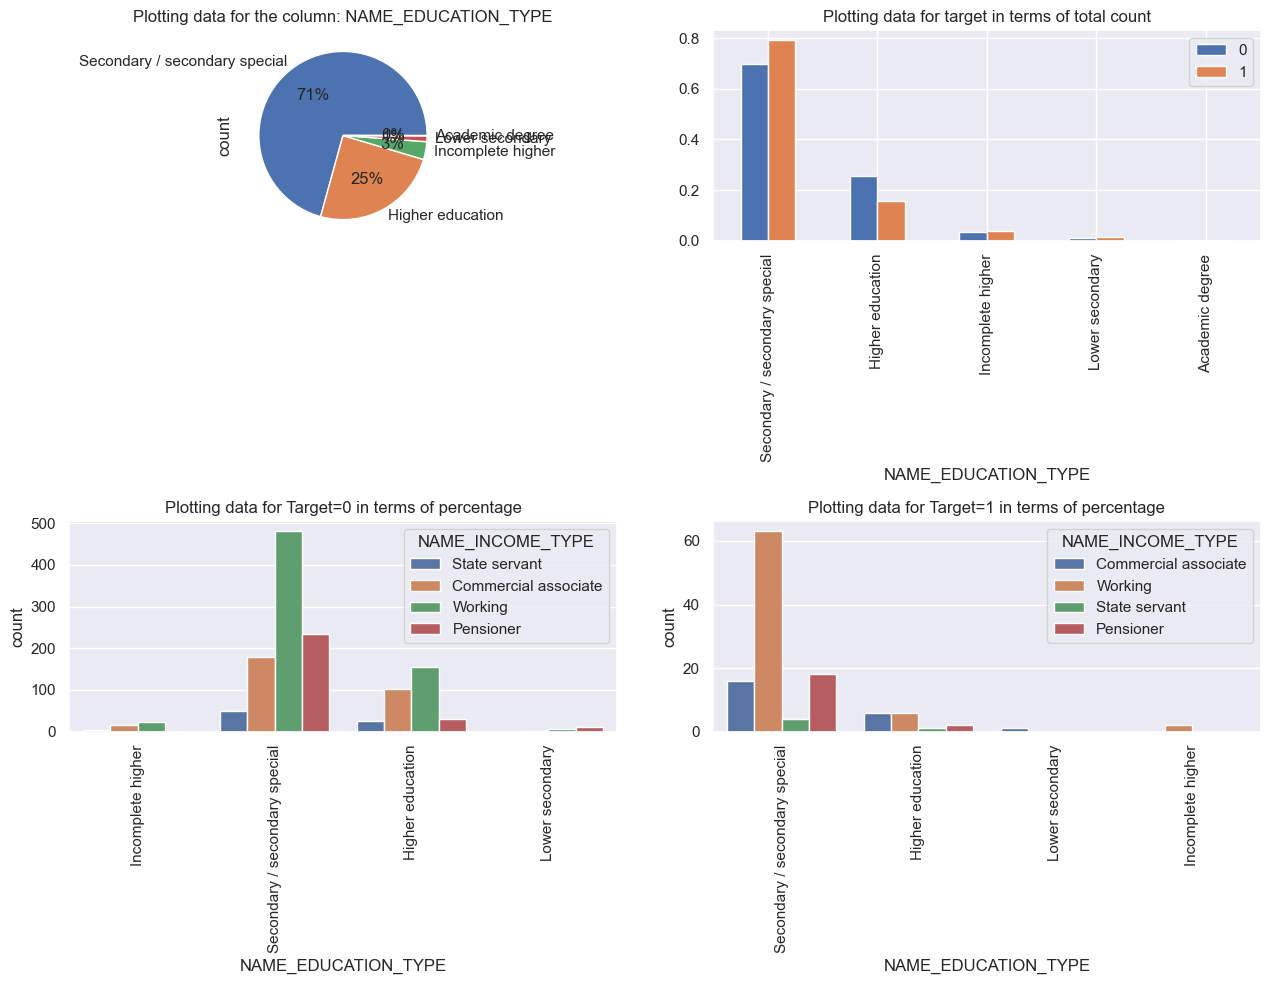

In [117]:
plotting('NAME_EDUCATION_TYPE','NAME_INCOME_TYPE')    

### Bivariate Analysis Insights
1. **Income Type and Payment Difficulties:**
- Working individuals show a higher proportion of both non-difficulties and payment difficulties.
- Pensioners and Commercial Associates exhibit lower proportions of payment difficulties.

2. **Real Estate Ownership and Loan Payment Difficulties:**
- Real estate owners tend to have fewer payment difficulties, indicating financial stability.
- Non-real estate owners show a slightly higher risk.

3. **Educational Attainment and Financial Stability:**
- Applicants with only secondary education have more payment difficulties.
- Higher education correlates with fewer financial issues.

4. **Occupation Type and Payment Difficulties:**
- Laborers have higher payment difficulties, suggesting financial challenges.
- Managers and high-skilled professionals exhibit lower risks.

5. **Correlation Insights:**
- Positive correlation between loan amount and goods price.
- Negative correlation between employment duration and loan amount.